In [35]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn import svm
import csv
import pydotplus
import dateutil.relativedelta
from io import StringIO
import sklearn.neighbors as knn
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.linear_model import LogisticRegressionCV as LogRegCV
import sklearn.discriminant_analysis as da
from sklearn import linear_model
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from statsmodels.regression.linear_model import OLS
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn import tree
from sklearn.preprocessing import StandardScaler as Standardize
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.decomposition import PCA
from IPython.display import Image
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import sys
import sklearn as sk
from sklearn import discriminant_analysis
import statsmodels.formula.api as sm
from sklearn.cross_validation import train_test_split
%matplotlib inline
from itertools import groupby
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split,StratifiedKFold,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import time
import random
import datetime
# from datetime import datetime
from sklearn import preprocessing, pipeline, metrics, grid_search, cross_validation
from math import sqrt,log
import seaborn as sns
import matplotlib.cm as cm

# import xgboost as xgb
sns.set_style("whitegrid")
sns.set_context("poster")

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import operator


from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials 

from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression

In [36]:
# Load data description
loan_des = pd.read_excel('/Users/nisreenshiban/Downloads/lending-club-loan-data/LCDataDictionary.xlsx')

pd.set_option('display.max_colwidth',1000)

loan_des.head(n=5)

LoanStatNew  \
0               addr_state   
1               annual_inc   
2         annual_inc_joint   
3         application_type   
4  collection_recovery_fee   

                                                                                            Description  
0                                            The state provided by the borrower in the loan application  
1                         The self-reported annual income provided by the borrower during registration.  
2             The combined self-reported annual income provided by the co-borrowers during registration  
3  Indicates whether the loan is an individual application or a joint application with two co-borrowers  
4                                                                        post charge off collection fee

In [37]:
loan_des.Description[loan_des.LoanStatNew == 'last_pymnt_amnt']

29    Last total payment amount received
Name: Description, dtype: object

In [38]:
# Load data
loan_data = pd.read_csv('/Users/nisreenshiban/Downloads/lending-club-loan-data/loan.csv')

loan_data_main = loan_data.loc[loan_data['loan_status'] != 'Current']
loan_data_main = loan_data_main.loc[loan_data['loan_status'] != 'Issued']
loan_data_main = loan_data_main.reset_index(drop=True)
loan_data_current_issued = loan_data[~loan_data.index.isin(loan_data_main.index)]

# Separate predictors and response in the train
x_df = loan_data_main.drop('loan_status', axis=1)
y_df = loan_data_main.loc[:, 'loan_status'] 

display(x_df.head(n=5))

#dimension of the data
print ("Dimension of the data:", x_df.shape[1], 'predictors')
print ("Number of individuals:", x_df.shape[0], 'people')

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075269    1311441     5000.0       5000.0           5000.0   36 months   

   int_rate  installment grade sub_grade     ...      total_bal_il il_util  \
0     10.65       162.87     B        B2     ...               NaN     NaN   
1     15.27        59.83     C        C4     ...               NaN     NaN   
2     15.96        84.33     C        C5     ...               NaN     NaN   
3     13.49       339.31     C        C1     ...               NaN     NaN   
4      7.90       156.46     A        A4     ...               NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        NaN      NaN              NaN    NaN   
1         NaN          NaN        NaN      NaN              NaN    NaN   
2         NaN          NaN        NaN      NaN              NaN    NaN   
3         NaN          NaN        NaN      NaN              NaN    NaN   
4         NaN          NaN        NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 73 columns]

Dimension of the data: 73 predictors
Number of individuals: 277140 people


In [39]:
np.unique(loan_data_current_issued['loan_status'])

array(['Charged Off', 'Current', 'Default', 'Fully Paid',
       'In Grace Period', 'Issued', 'Late (16-30 days)',
       'Late (31-120 days)'], dtype=object)

In [40]:
x_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', '

In [41]:
print(x_df.shape)

(277140, 73)


In [42]:
print('List of numerical predictors:')
num_cols = x_df._get_numeric_data().columns
print(num_cols)

List of numerical predictors:
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')


In [43]:
print('List of categorical predictors:')
cat_cols = list(set(x_df.columns) - set(num_cols))
print(cat_cols)

List of categorical predictors:
['last_credit_pull_d', 'grade', 'next_pymnt_d', 'desc', 'pymnt_plan', 'title', 'initial_list_status', 'emp_length', 'application_type', 'zip_code', 'url', 'term', 'verification_status', 'emp_title', 'issue_d', 'sub_grade', 'home_ownership', 'earliest_cr_line', 'purpose', 'addr_state', 'last_pymnt_d', 'verification_status_joint']


In [44]:
#numerical columns with missing values
num_cols_with_nans = num_cols[x_df[num_cols].isnull().sum() > 0]
num_cols_with_nans

Index(['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [45]:
#categorical columns with missing values
cat_cols_with_nans = num_cols[x_df[cat_cols].isnull().sum() > 0]
cat_cols_with_nans

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 51 but corresponding boolean dimension is 22
  result = getitem(key)


Index(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'open_acc', 'total_acc',
       'total_pymnt', 'total_pymnt_inv'],
      dtype='object')

In [46]:
print(x_df.isnull().sum().sum())

5978904


In [47]:
#fill columns of numerical variables with the mean value of that variable
for col in num_cols_with_nans:
    x_df[col] = x_df[col].fillna(x_df[col].mean())
print(x_df.isnull().sum().sum())

730960


In [48]:
# emp_title_nans = x_df['emp_title'][x_df['emp_title'].isnull()]
# x_df['emp_title'][emp_title_nans.index] = col_mo
x_df['emp_title'].isnull().sum()

15388

In [49]:
col_mo = x_df['emp_title'].value_counts().index[0]
x_df['emp_title'].fillna('Teacher')
x_df['emp_title'].isnull().sum()

15388

In [50]:
for col in cat_cols_with_nans:
    col_mo = x_df[col].value_counts().index[0]
    col_nans = x_df[col][x_df[col].isnull()]
    x_df[col][col_nans.index] = col_mo
print(x_df.isnull().sum().sum())

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


730960


In [51]:
x_df['desc'][0]

'  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'

In [52]:
x_df = x_df.drop('verification_status_joint', 1) 

In [53]:
x_df = x_df.drop('url', 1) 

In [54]:
x_df = x_df.drop('desc', 1) 

In [55]:
#columns that still contain nans
print(x_df.columns[x_df.isnull().sum() > 0])

Index(['emp_title', 'title', 'earliest_cr_line', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')


In [56]:
col_drline = x_df['earliest_cr_line'].value_counts().index[0]
col_nannn = x_df['earliest_cr_line'][x_df['earliest_cr_line'].isnull()]
x_df['earliest_cr_line'][col_nannn.index] = col_drline
x_df['earliest_cr_line'].isnull().sum()

col_drline = x_df['last_pymnt_d'].value_counts().index[0]
col_nannn = x_df['last_pymnt_d'][x_df['last_pymnt_d'].isnull()]
x_df['last_pymnt_d'][col_nannn.index] = col_drline
x_df['last_pymnt_d'].isnull().sum()

col_drline = x_df['next_pymnt_d'].value_counts().index[0]
col_nannn = x_df['next_pymnt_d'][x_df['next_pymnt_d'].isnull()]
x_df['next_pymnt_d'][col_nannn.index] = col_drline
x_df['next_pymnt_d'].isnull().sum()

col_drline = x_df['last_credit_pull_d'].value_counts().index[0]
col_nannn = x_df['last_credit_pull_d'][x_df['last_credit_pull_d'].isnull()]
x_df['last_credit_pull_d'][col_nannn.index] = col_drline
x_df['last_credit_pull_d'].isnull().sum()

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:

0

In [57]:
col_drline = x_df['emp_title'].value_counts().index[0]
col_nannn = x_df['emp_title'][x_df['emp_title'].isnull()]
x_df['emp_title'][col_nannn.index] = col_drline
x_df['emp_title'].isnull().sum()

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0

In [58]:
print(x_df.isnull().sum().sum())

14


In [59]:
x_df['emp_title'][x_df['emp_title'] == 'teacher'] = 'Teacher'

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
for i in x_df['emp_title'].index:
    if 'bank' in x_df['emp_title'][i]:
        x_df['emp_title'][i] = 'bank'

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [61]:
for i in x_df['emp_title'].index:
    if 'Bank' in x_df['emp_title'][i]:
        x_df['emp_title'][i] = 'bank'

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [62]:
for i in x_df['emp_title'].index:
    if 'university' in x_df['emp_title'][i]:
        x_df['emp_title'][i] = 'university'
    if 'University' in x_df['emp_title'][i]:
        x_df['emp_title'][i] = 'university'

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [63]:
for i in x_df['emp_title'].index:
    if 'hospital' in x_df['emp_title'][i]:
        x_df['emp_title'][i] = 'hospital'
    if 'Hospital' in x_df['emp_title'][i]:
        x_df['emp_title'][i] = 'hospital'

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [64]:
x_df = x_df.drop('grade', axis=1)
x_df = x_df.drop('sub_grade', axis=1)
x_df.head(n=3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   

   int_rate  installment emp_title emp_length      ...       total_bal_il  \
0     10.65       162.87   Manager  10+ years      ...       36853.402655   
1     15.27        59.83     Ryder   < 1 year      ...       36853.402655   
2     15.96        84.33   Manager  10+ years      ...       36853.402655   

     il_util open_rv_12m open_rv_24m   max_bal_bc   all_util total_rev_hi_lim  \
0  73.334328    1.526549    3.318584  5614.641593  60.933628     29435.476196   
1  73.334328    1.526549    3.318584  5614.641593  60.933628     29435.476196   
2  73.334328    1.526549    3.318584  5614.641593  60.933628     29435.476196   

     inq_fi total_cu_tl  inq_last_12m  
0  1.274336    2.168142      2.738938  
1  1.274336    2.168142      2.738938  
2  1.274336    2.168142      2.738938  

[3 rows x 68 columns]

In [65]:
print(x_df.isnull().sum().sum())

14


In [66]:
# for col in x_df:
#     print(col, ":", x_df[col].dtype, 'and description:', loan_des.loc[loan_des['LoanStatNew'] == col].iloc[:,1])

In [67]:
y_df.value_counts()

Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [68]:
y_df_binary = y_df.map({'Fully Paid': 1, 'Charged Off': 0, 'Late (31-120 days)':0, 'In Grace Period':0,'Late (16-30 days)':0, 'Does not meet the credit policy. Status:Fully Paid':1, 'Default':0, 'Does not meet the credit policy. Status:Charged Off':0})

In [69]:
y_df_binary.value_counts()

1    209711
0     67429
Name: loan_status, dtype: int64

In [70]:
x_df = x_df.drop('member_id', axis=1)

In [71]:
x_df = x_df.drop('id', axis=1)

In [72]:
row_ids = x_df[x_df["funded_amnt"] != x_df.loan_amnt].index
print(row_ids)
y_df[row_ids].value_counts()

Int64Index([    61,     65,     72,     75,     89,    115,    208,    232,
               250,    287,
            ...
            164889, 164891, 164921, 164941, 164949, 164966, 164979, 164980,
            164981, 164982],
           dtype='int64', length=1918)


Fully Paid                                             1441
Charged Off                                             332
Does not meet the credit policy. Status:Fully Paid       97
Does not meet the credit policy. Status:Charged Off      44
Late (31-120 days)                                        4
Name: loan_status, dtype: int64

In [73]:
x_df.shape

(277140, 66)

In [74]:
#percent funded amount and loan amount don't match
1918/277140

0.006920689904019629

In [75]:
x_df = x_df.drop('loan_amnt', axis=1)

In [76]:
row_ids = x_df[x_df["funded_amnt"] != x_df.funded_amnt_inv].index
print(row_ids)
y_df[row_ids].value_counts()

Int64Index([     0,      7,     18,     24,     47,     51,     52,     59,
                65,     72,
            ...
            276833, 276847, 276876, 276890, 276894, 276917, 276926, 276942,
            277025, 277104],
           dtype='int64', length=48408)


Fully Paid                                             36660
Charged Off                                             7665
Does not meet the credit policy. Status:Fully Paid      1527
Late (31-120 days)                                      1057
Does not meet the credit policy. Status:Charged Off      607
In Grace Period                                          564
Late (16-30 days)                                        234
Default                                                   94
Name: loan_status, dtype: int64

In [77]:
#percent funded amount and loan amount don't match
48408/277140

0.1746698419571336

In [78]:
x_df = x_df.drop('funded_amnt', axis=1)

In [79]:
x_df.head(n=1)

funded_amnt_inv        term  int_rate  installment emp_title emp_length  \
0           4975.0   36 months     10.65       162.87   Manager  10+ years   

  home_ownership  annual_inc verification_status   issue_d      ...       \
0           RENT     24000.0            Verified  Dec-2011      ...        

   total_bal_il    il_util open_rv_12m open_rv_24m   max_bal_bc   all_util  \
0  36853.402655  73.334328    1.526549    3.318584  5614.641593  60.933628   

   total_rev_hi_lim    inq_fi  total_cu_tl  inq_last_12m  
0      29435.476196  1.274336     2.168142      2.738938  

[1 rows x 64 columns]

In [80]:
x_df['fully_paid_careers'] = np.zeros(len(x_df))

In [81]:
x_df['fully_paid_careers'][x_df['emp_title']=='bank'] = 3
x_df['fully_paid_careers'][x_df['emp_title']=='university'] = 2
x_df['fully_paid_careers'][x_df['emp_title']=='hospital'] = 1

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [82]:
x_df['fully_paid_careers'].value_counts()

0.0    267777
3.0      3972
1.0      2854
2.0      2537
Name: fully_paid_careers, dtype: int64

In [83]:
x_df.drop(['out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp'], axis =1 ,inplace= True)

In [84]:
x_df.last_pymnt_d.head() ## the time passed issued day

0    Jan-2015
1    Apr-2013
2    Jun-2014
3    Jan-2015
4    Jan-2015
Name: last_pymnt_d, dtype: object

In [85]:
x_df.drop(['last_pymnt_d','last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d'], axis =1 ,inplace= True)

In [86]:
x_df.drop(['total_rec_late_fee', 'recoveries', 'collection_recovery_fee'], axis =1 ,inplace= True)

In [87]:
x_df.drop(['pymnt_plan','title'], axis =1 ,inplace= True)

In [88]:
x_df.head(1)

funded_amnt_inv        term  int_rate  installment emp_title emp_length  \
0           4975.0   36 months     10.65       162.87   Manager  10+ years   

  home_ownership  annual_inc verification_status   issue_d  \
0           RENT     24000.0            Verified  Dec-2011   

          ...            il_util open_rv_12m open_rv_24m   max_bal_bc  \
0         ...          73.334328    1.526549    3.318584  5614.641593   

    all_util total_rev_hi_lim    inq_fi  total_cu_tl  inq_last_12m  \
0  60.933628     29435.476196  1.274336     2.168142      2.738938   

   fully_paid_careers  
0                 0.0  

[1 rows x 51 columns]

## Data cleaning

In [89]:
# x_df.emp_length

In [90]:
x_df['emp_length'].value_counts()
np.unique(x_df.emp_length)

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', 'n/a'], dtype=object)

In [91]:
x_df.emp_length = x_df.emp_length.map({'1 year':1, '10+ years':20, '2 years':2, '3 years':3, '4 years':4, '5 years':5,
       '6 years':6, '7 years':7, '8 years':8, '9 years':9, '< 1 year':0.5, 'n/a':0})

In [92]:
times = []
for i in x_df['issue_d']:
    d = datetime.datetime.strptime(i, "%b-%Y")
    today = datetime.datetime.now()
    time_d = today - d
    times.append(time_d.days/30.4368499)
x_df['issue_d_days'] = times 

times = []
for i in x_df['earliest_cr_line']:
    d = datetime.datetime.strptime(i, "%b-%Y")
    today = datetime.datetime.now()
    time_d = today - d
    times.append(time_d.days/30.4368499)
x_df['earliest_cr_line_days'] = times 

In [93]:
time_d.days

5309

In [94]:
x_df.zip_code =  x_df.zip_code.apply(lambda x: x[0:3])
zip_code_freq =  x_df.groupby("zip_code").size().reset_index()
zip_code_freq.columns = ['zip_code' , 'zip_code_freq']
x_df = x_df.merge(zip_code_freq, how = "left" , on = "zip_code")

In [95]:
emp_title_freq =  x_df.groupby("emp_title").size().reset_index()
emp_title_freq.columns = ['emp_title' , 'emp_title_freq']
x_df = x_df.merge(emp_title_freq, how = "left" , on = "emp_title")

In [96]:
def countinuous_variable_plot(feature_name,colortype="Set1",bins=20,limit=0,downlimit=-1):
    fig, (ax1,ax2)= plt.subplots(2,1,figsize=(16,10))
    try:
        sns.set_style("whitegrid",{'axes.edgecolor':'0'})
        factor = pd.qcut(df_all[feature_name], 5 ,labels =False) # make 5 groups
        table = df_all.groupby([factor, 'loan_status']).size() # 2 groupby, first for factor, second for loan_status.
        table =  table.unstack('loan_status')
        normedtable = table.div(table.sum(1),axis=0) # devide the count by total 
        normedtable.ix[:,1].plot(kind = 'bar' ,alpha =0.9,color ="#4AA4FE", ax =ax1)
        ax1.set_xlabel("%s precentile" % feature_name,fontsize =20)
        ax1.set_ylabel("Default Rate"  ,fontsize =20)
        x = range(5)
        labels = ["20%tile","40%tile","60%tile","80%tile","100%tile"]
    #     plt.xticks(x,labels,rotation = '0',fontsize =18)
        sns.despine() 
        ax1.set_title ("Loan Performance with respect to %s" % feature_name)
        ax1.set_xticklabels(labels, rotation = 'vertical')
    except ValueError:
        print ("data is too inbalanced")
    
    if df_all[feature_name].unique().shape[0]<bins:
        bins =df_all[feature_name].unique().shape[0]
    
    if (limit !=0)|(downlimit!=-1):
        Loan_data = df_all[(df_all[feature_name]<=limit)&(df_all[feature_name]>downlimit)]
    else:
        Loan_data = df_all
    colors= sns.color_palette(colortype, Loan_data.loan_status.drop_duplicates().shape[0])
    ax2.hist([Loan_data[(Loan_data.loan_status==value)&(~Loan_data[feature_name].isnull())][feature_name] for value in Loan_data.loan_status.drop_duplicates().sort_values().tolist()],
         stacked=True,bins=bins,
        label=Loan_data.loan_status.drop_duplicates().sort_values().tolist(), color = colors[:Loan_data.loan_status.drop_duplicates().shape[0]],alpha =0.9)
    ax2.set_xlabel(feature_name, fontsize =20)
    ax2.set_ylabel("Numbers"  ,fontsize =20)
    ax2.legend(loc='best')
    ax2.set_xticklabels(Loan_data.loan_status.drop_duplicates().sort_values().tolist(), rotation = 'vertical')
    plt.tight_layout()
    print ("================================================================================"
)
    

In [97]:
def plot_bar(feature_name,data,colortype="Set1"):
    Loan_data = data
    f,(ax1,ax2) = plt.subplots(2,1,figsize=(16, 10))
    ind = np.arange(len(Loan_data.groupby(feature_name).size()))
    DF =pd.DataFrame(data={'ind':ind,
                           feature_name:Loan_data.groupby(feature_name).size().index.tolist(),
                           'count':Loan_data.groupby(feature_name).size().tolist()})
    colors= sns.color_palette(colortype, Loan_data.loan_status.drop_duplicates().shape[0])
    bottoms = [0]*len(Loan_data.groupby(feature_name).size())
    
    
    for  icolor,value  in enumerate(Loan_data.loan_status.drop_duplicates().sort_values().tolist()):
        DF[value]=DF[feature_name].map(Loan_data[Loan_data.loan_status==value].groupby(feature_name).size())
    
    DF.fillna(0)
                
    for  icolor,value  in enumerate(Loan_data.loan_status.drop_duplicates().sort_values().tolist()):
        
        ax1.bar(DF['ind']+1.5,
                DF[value],color=colors[icolor],label=value,
               bottom=bottoms,alpha=0.9)
        bottoms = [x+y for x,y in zip(bottoms , DF[value].tolist())]
    ax1.set_xticks(ind + 1.5+ 1/2.)
    ax1.set_xticklabels( Loan_data.groupby(feature_name).size().index.tolist(), rotation = 'vertical')
    ax1.legend(loc='best')
    ax1.grid(False)
    sns.barplot(x = feature_name,y = 'loan_status' , data=df_all,order= np.sort(df_all[feature_name].unique()),ax=ax2)
    ax2.set_title ("Loan Performance with respect to %s" % feature_name,fontsize =20)
    ax2.set_xticklabels( Loan_data.groupby(feature_name).size().index.tolist(), rotation = 'vertical')
    plt.tight_layout()
    

In [98]:
x_df.columns

Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'fully_paid_careers', 'issue_d_days', 'earliest_cr_line_days',
       'zip_code_freq', 'emp_title_freq'],
 

In [99]:
dummy_list = ['emp_length','verification_status','addr_state','home_ownership',
             'purpose','initial_list_status']

In [100]:
dummy_num_col = ['term','inq_last_6mths','delinq_2yrs','pub_rec','open_acc','open_acc_6m','open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
                'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                'total_cu_tl']

In [101]:
num_col =  ['funded_amnt_inv','int_rate','installment', 'annual_inc',
                  'dti','earliest_cr_line_days'
                  ,'revol_bal','revol_util','total_acc',
                  'tot_coll_amt','tot_cur_bal', 'total_rev_hi_lim',
                  'mths_since_rcnt_il','mths_since_last_record',
                    'all_util', 'total_cu_tl','total_rec_int',
                   'max_bal_bc','total_rev_hi_lim','emp_title_freq','zip_code_freq']

In [102]:
all_num_col = dummy_num_col+num_col

In [103]:
remove_col =['out_prncp','out_prncp_inv','total_rec_late_fee']

In [104]:
df_all = pd.concat([x_df,y_df_binary], axis = 1)

# Good loan : 1
# Bad loan: 0

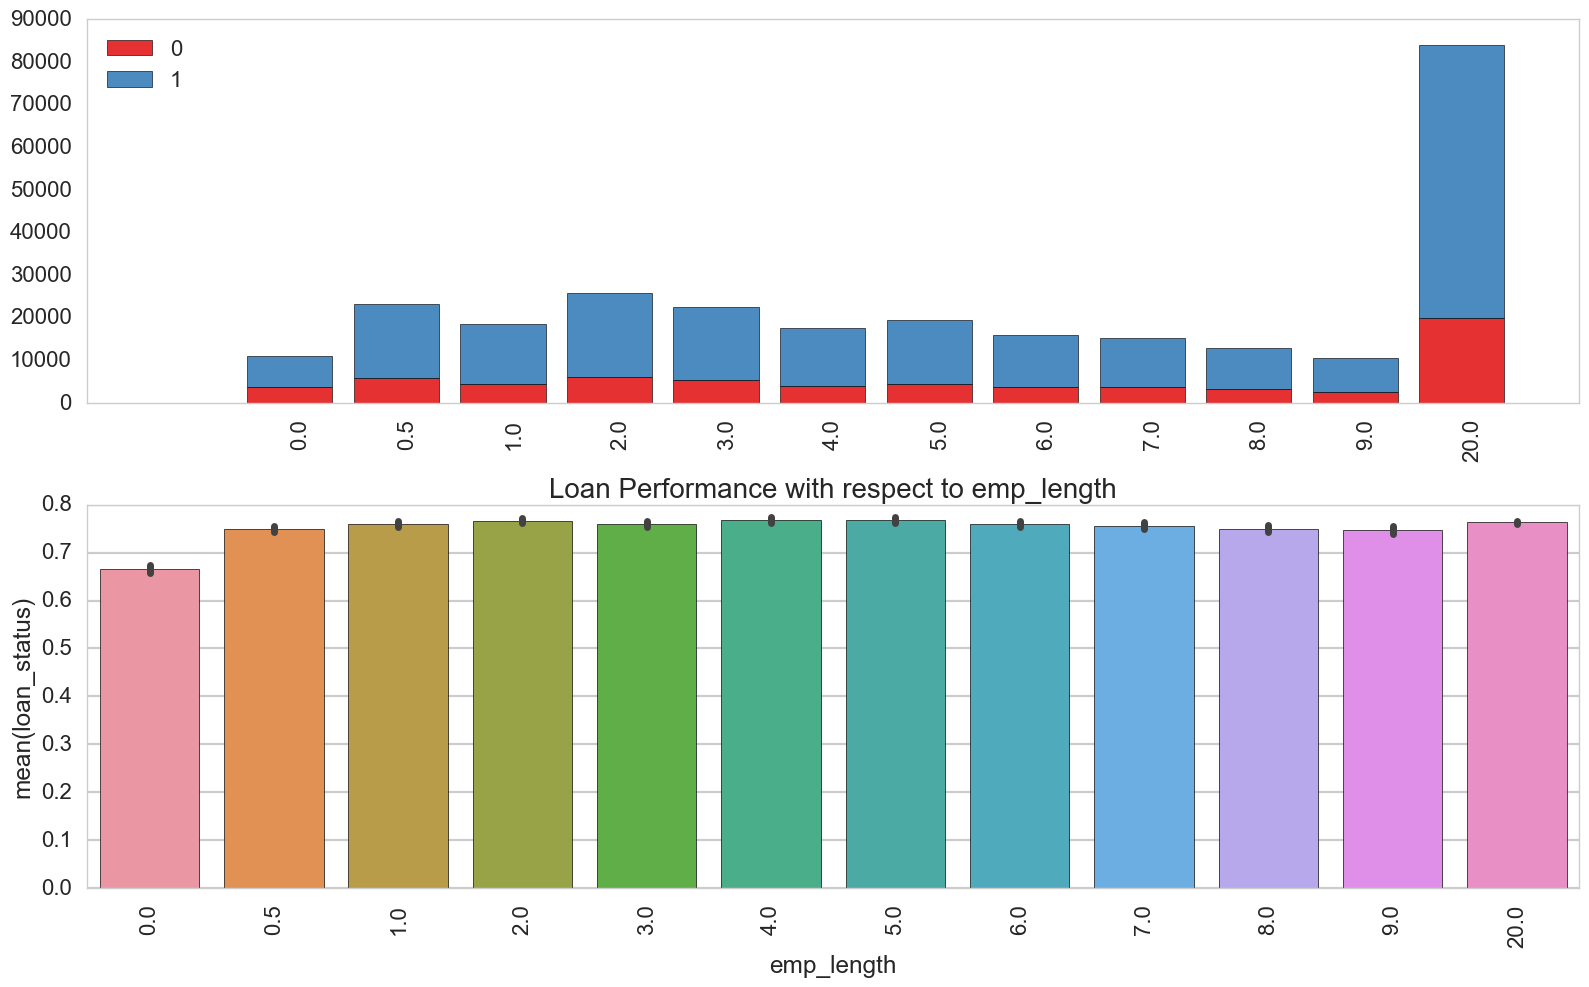

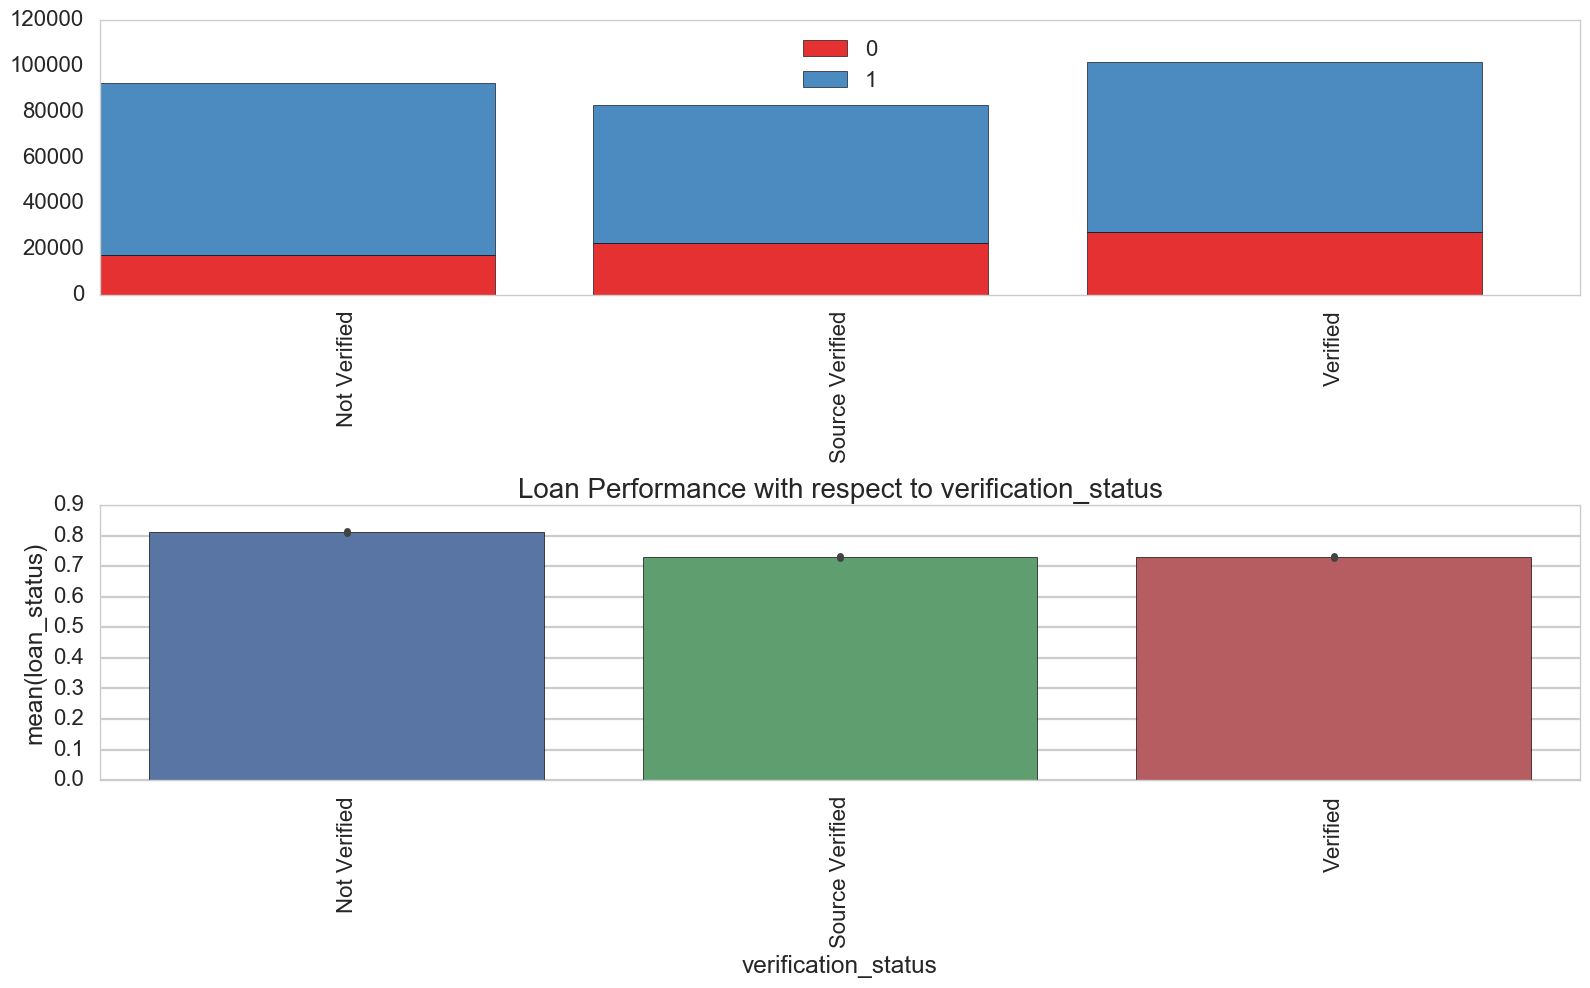

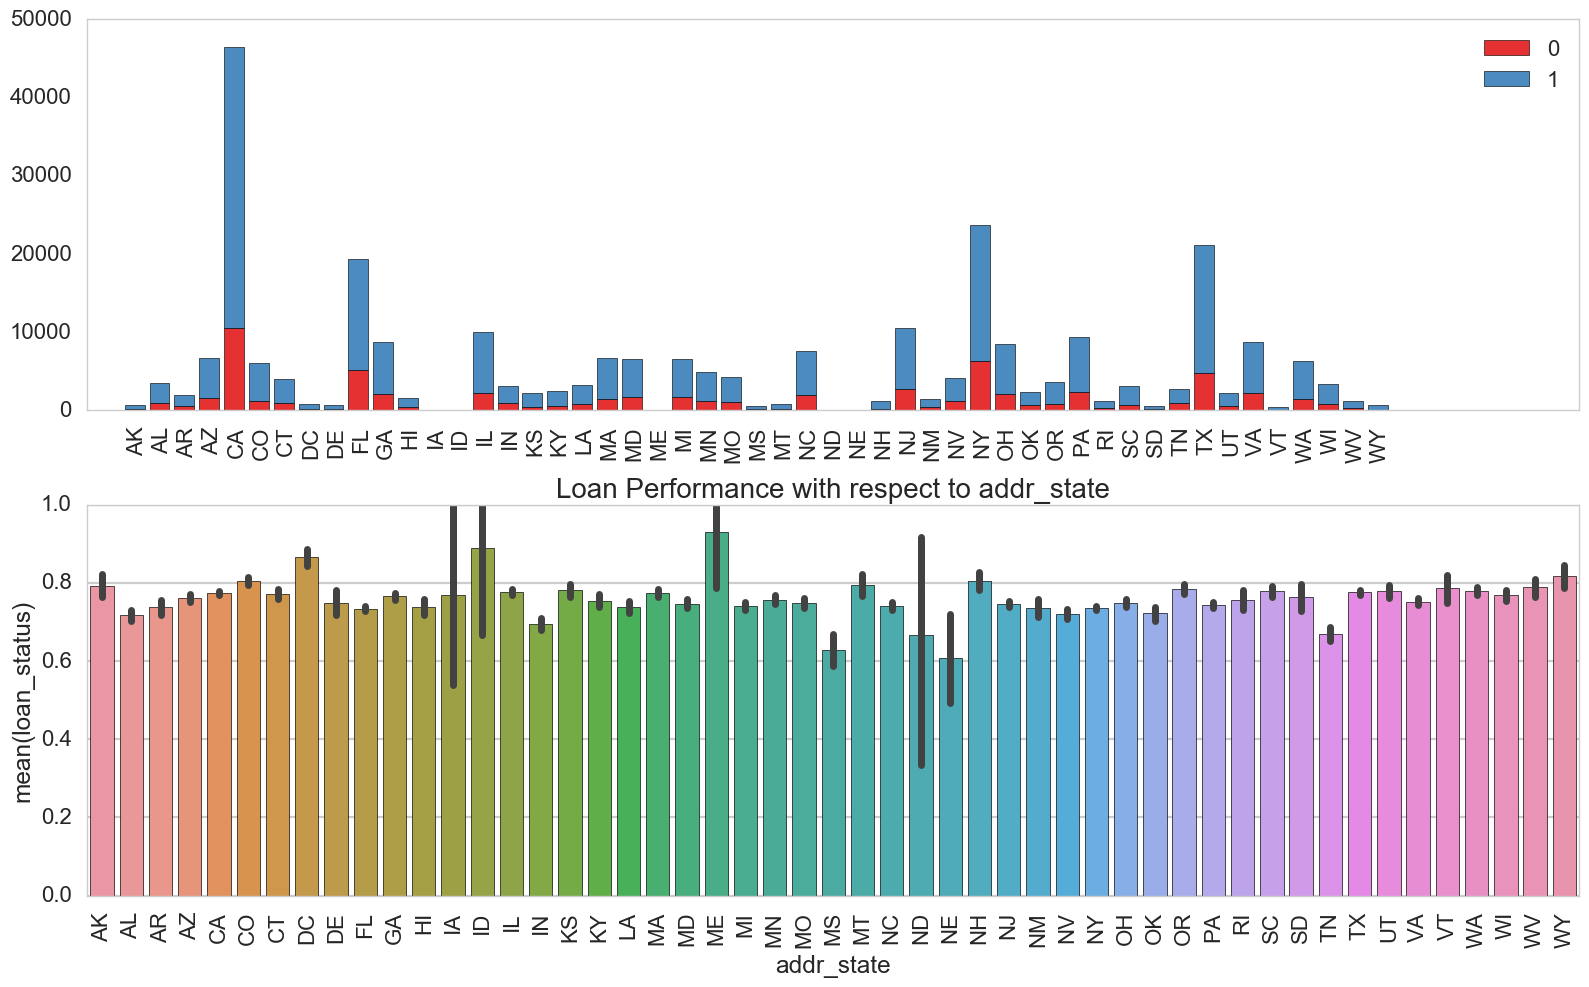

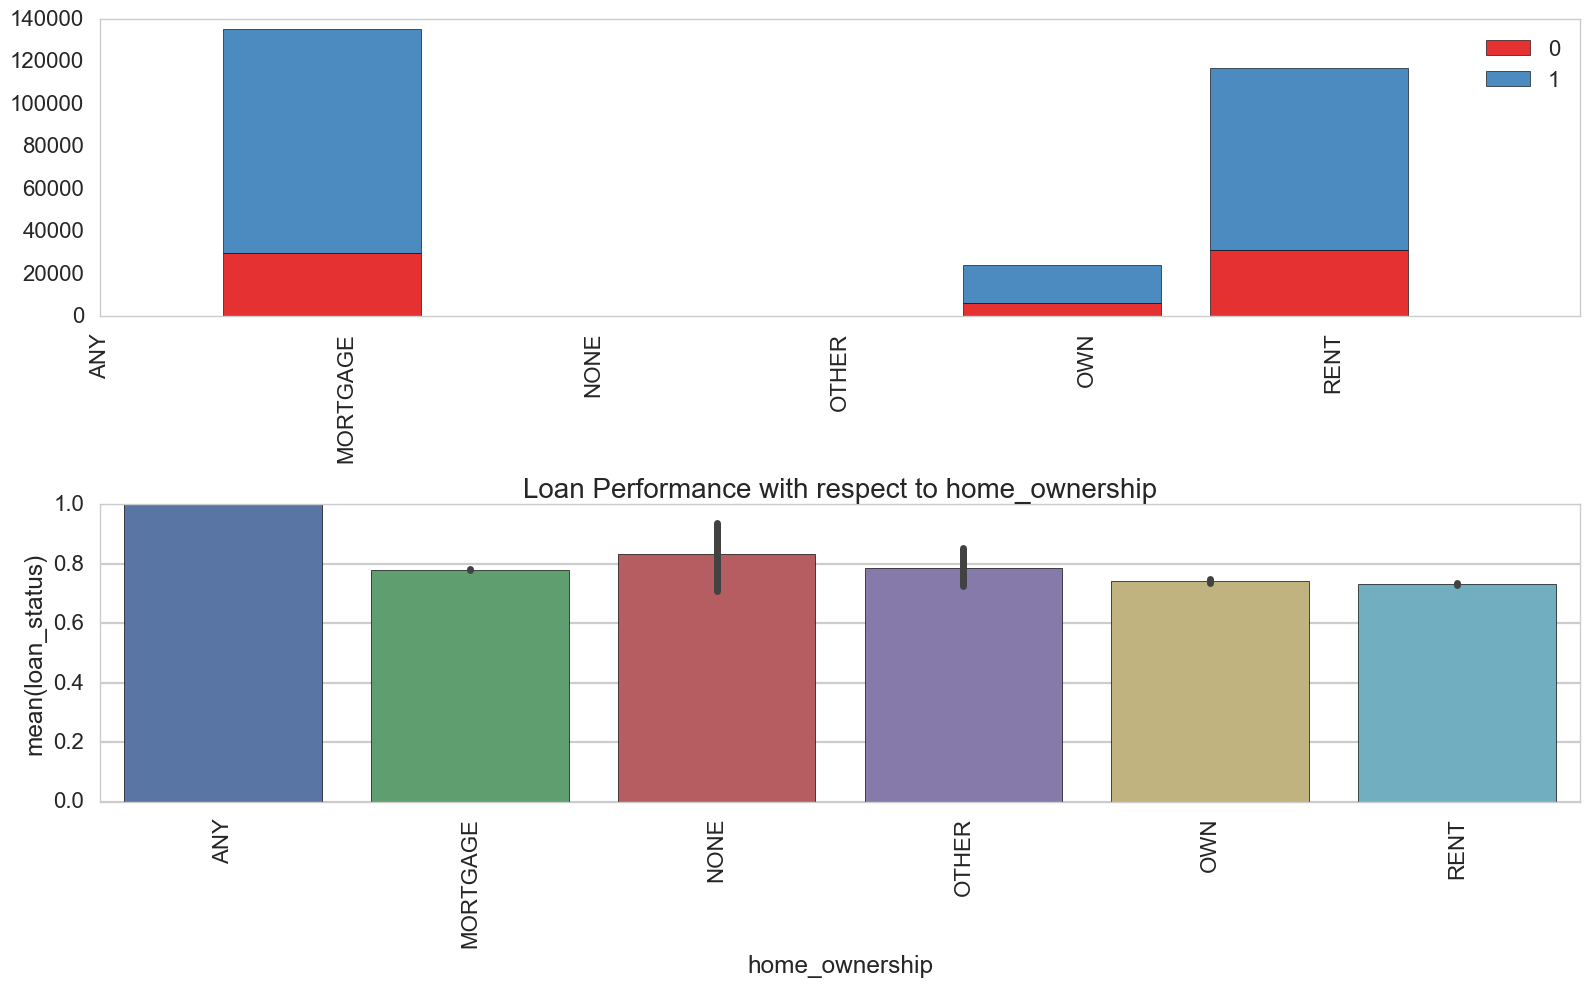

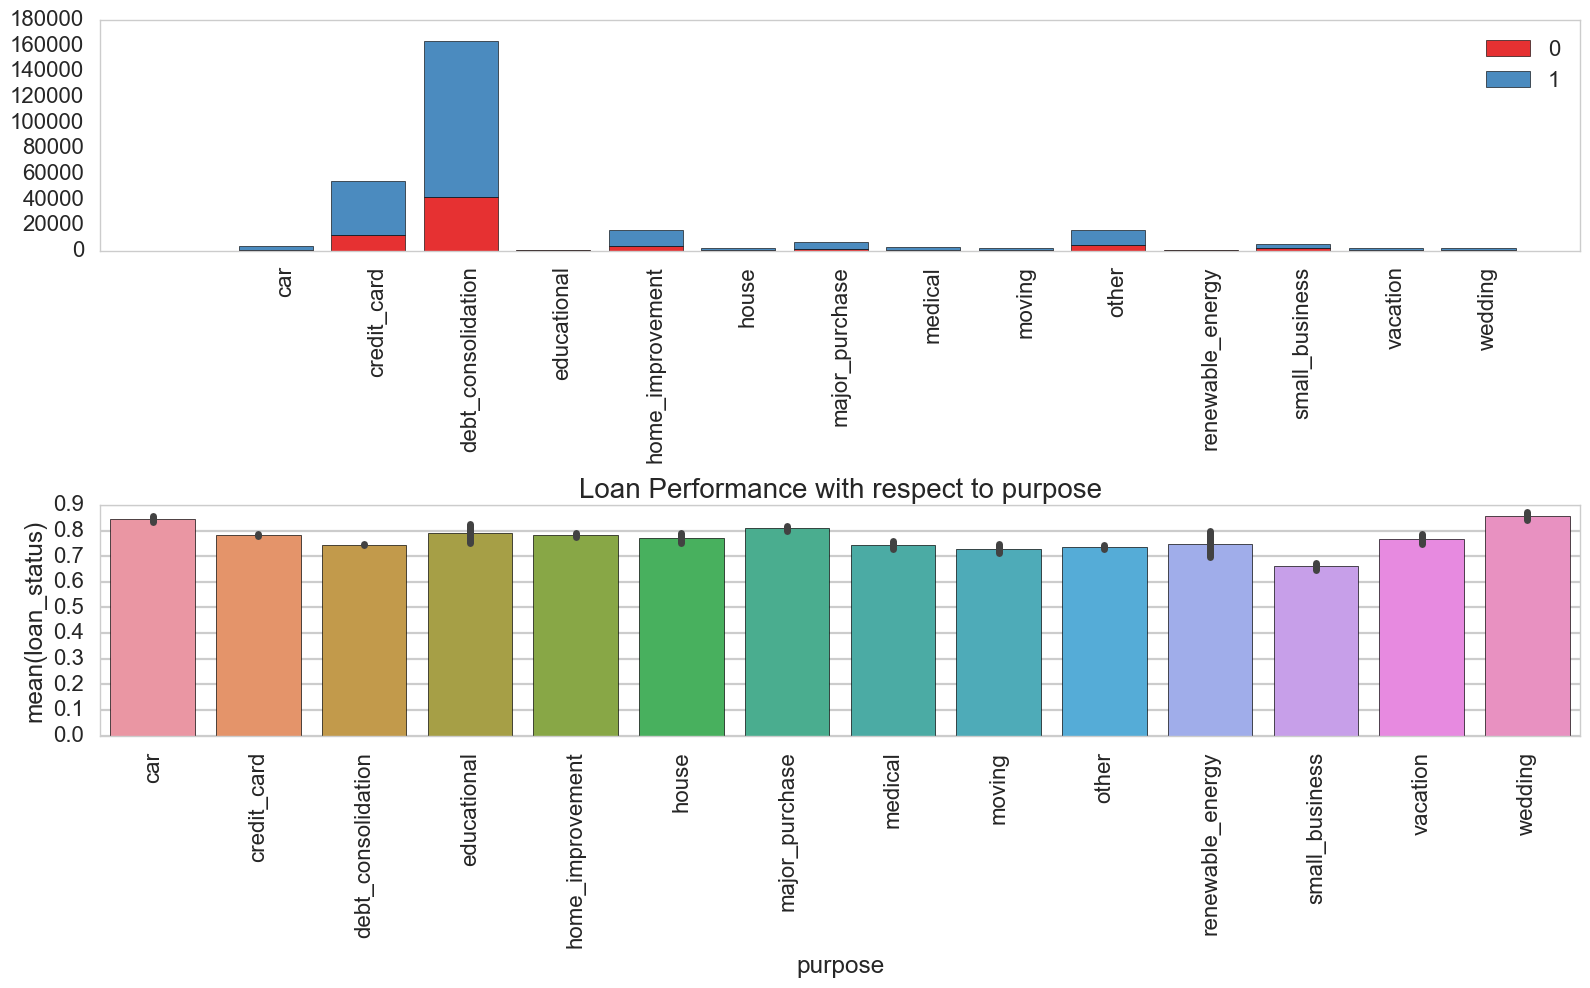

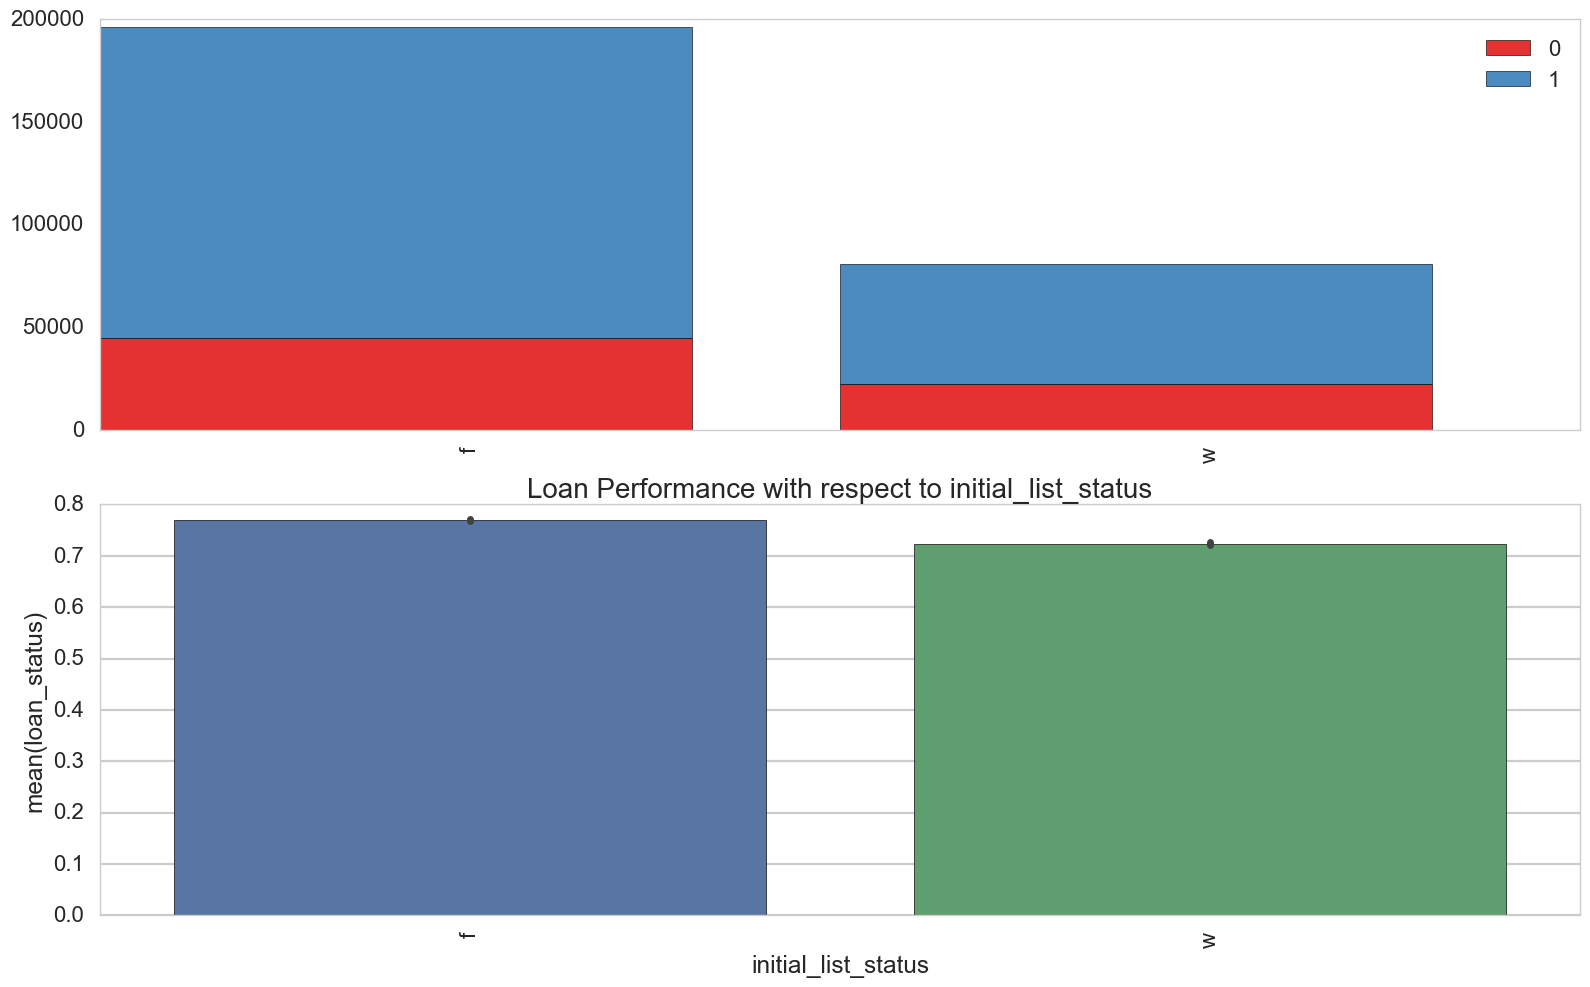

In [105]:
for feature in dummy_list:
    plot_bar(feature,df_all)

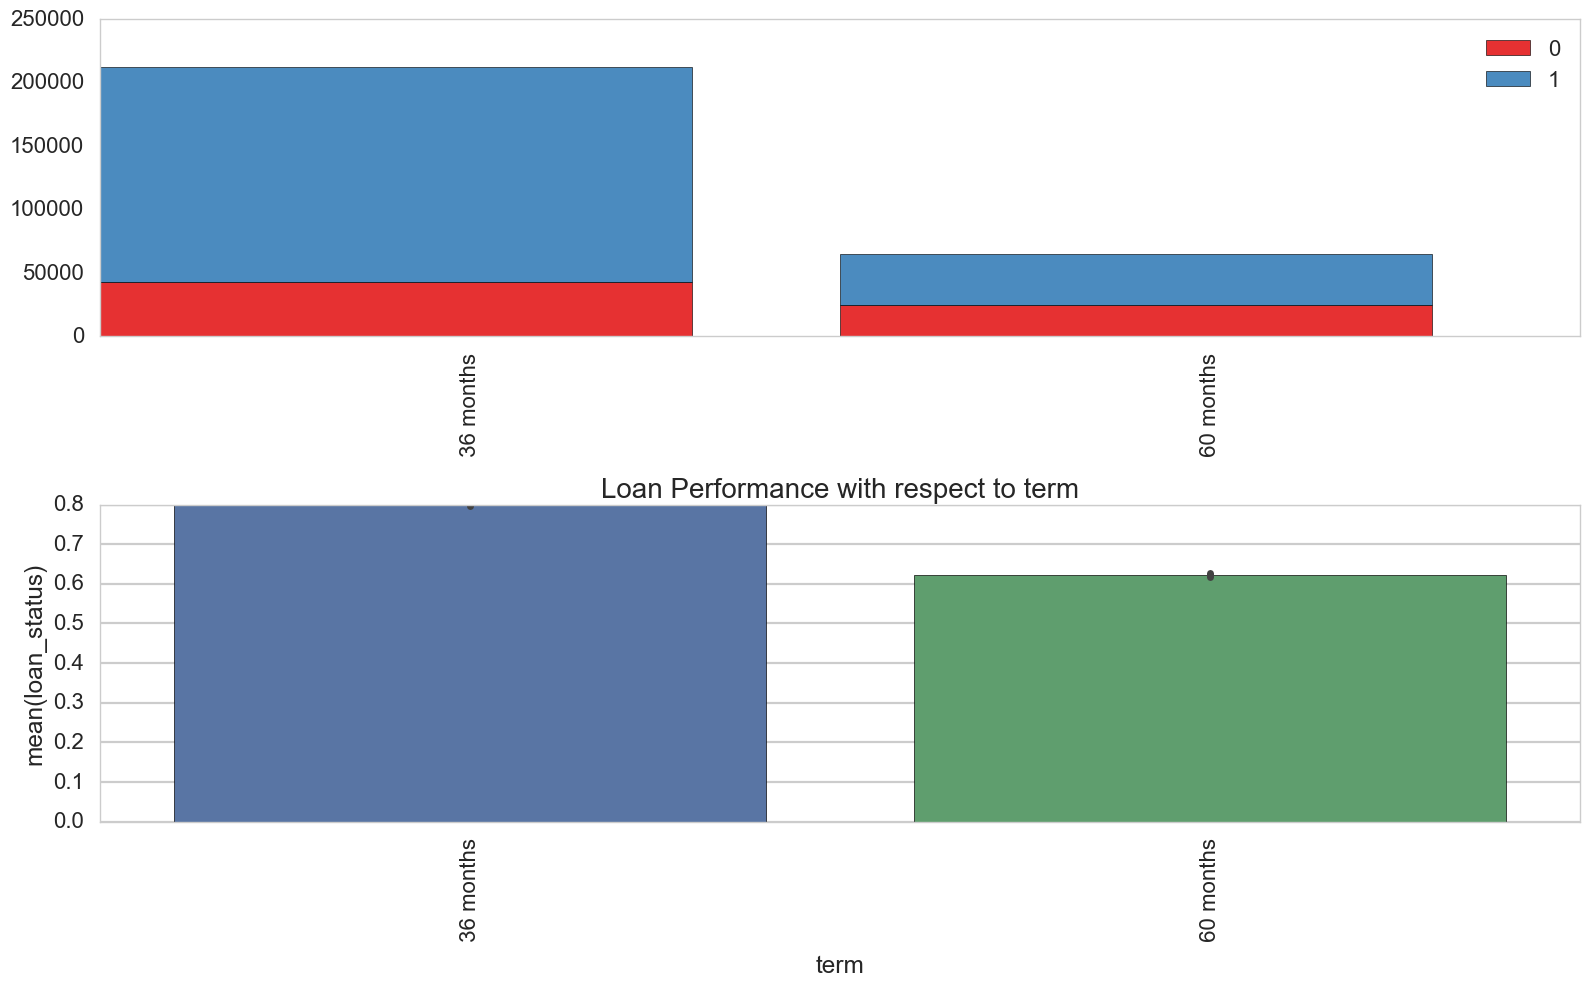

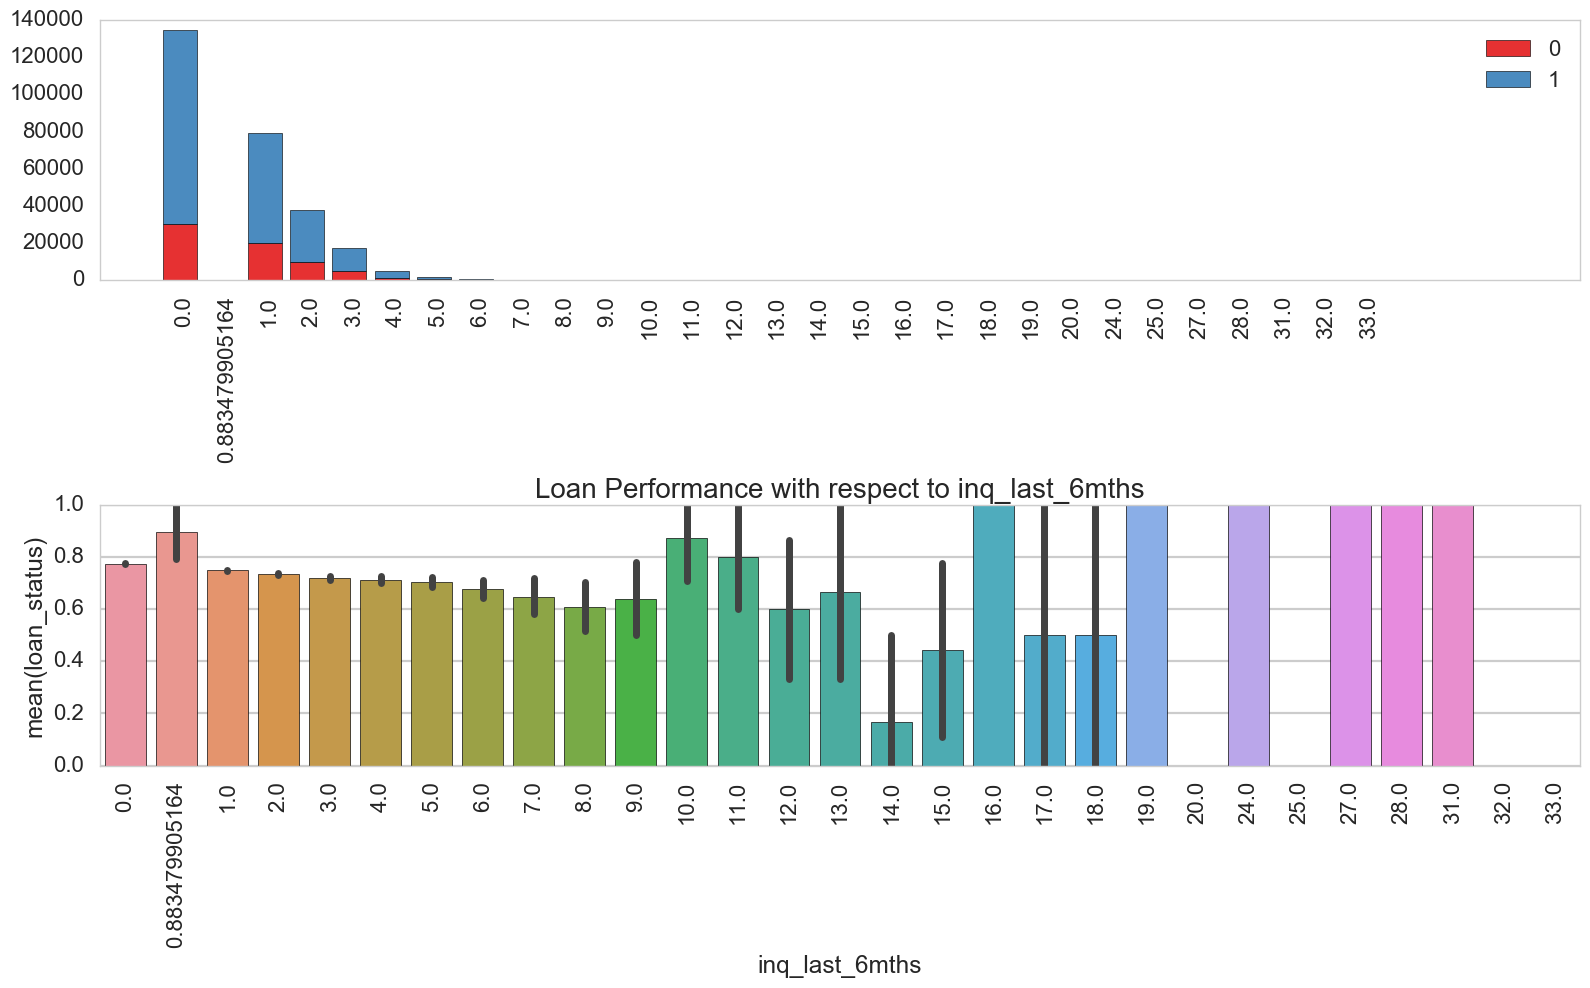

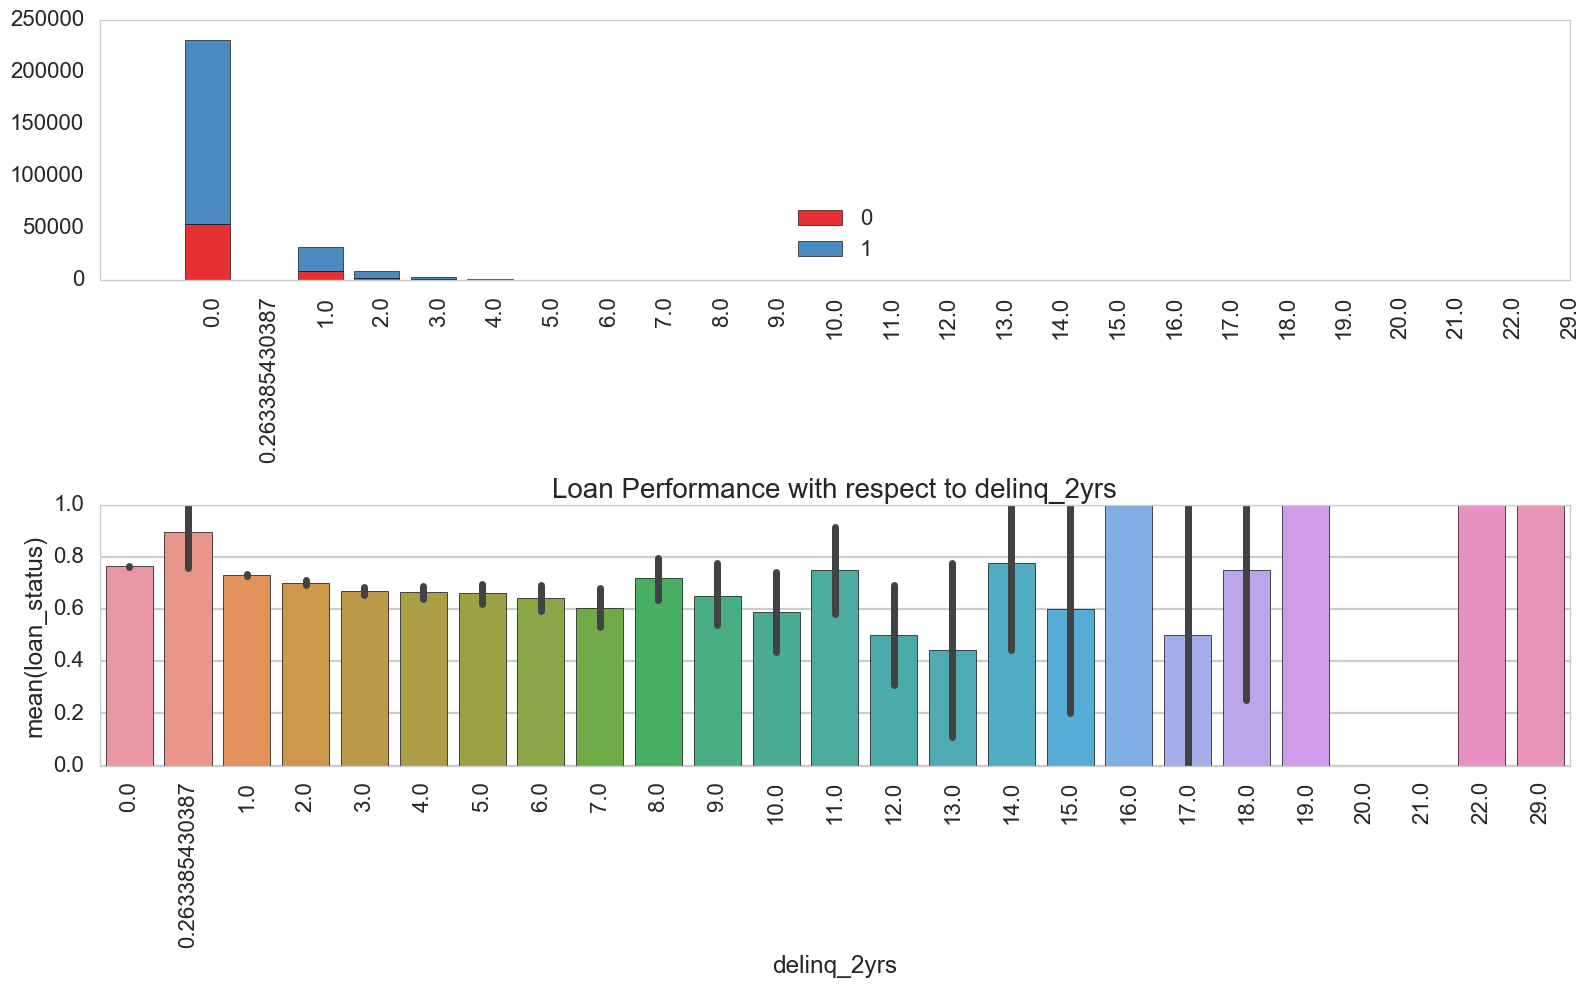

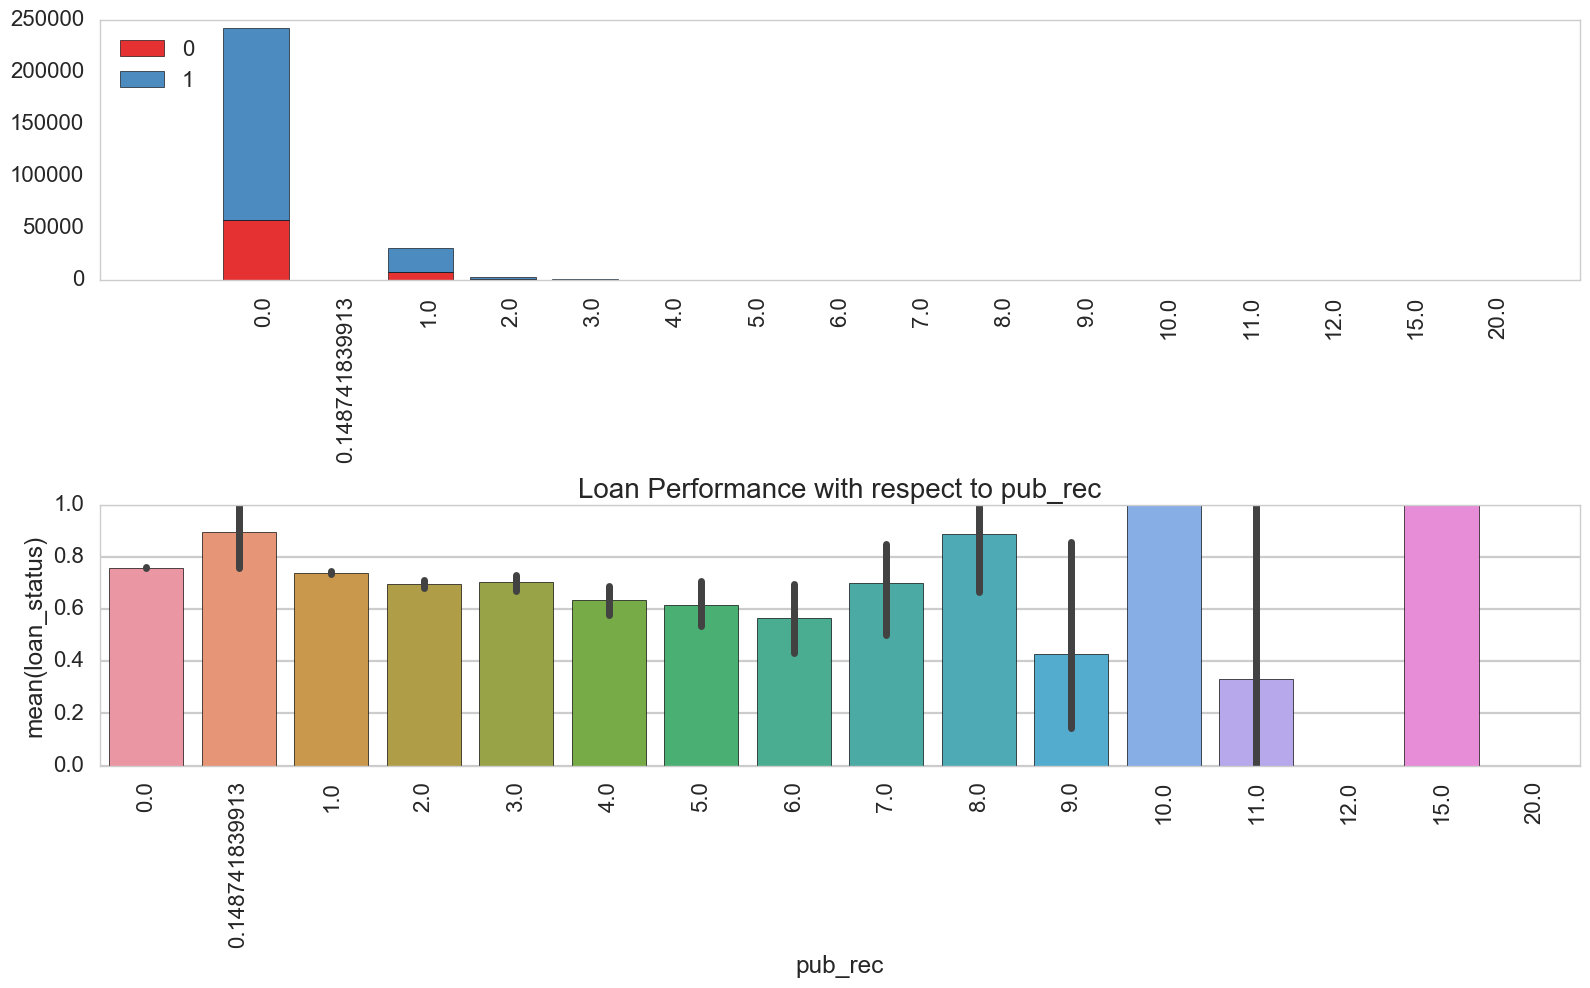

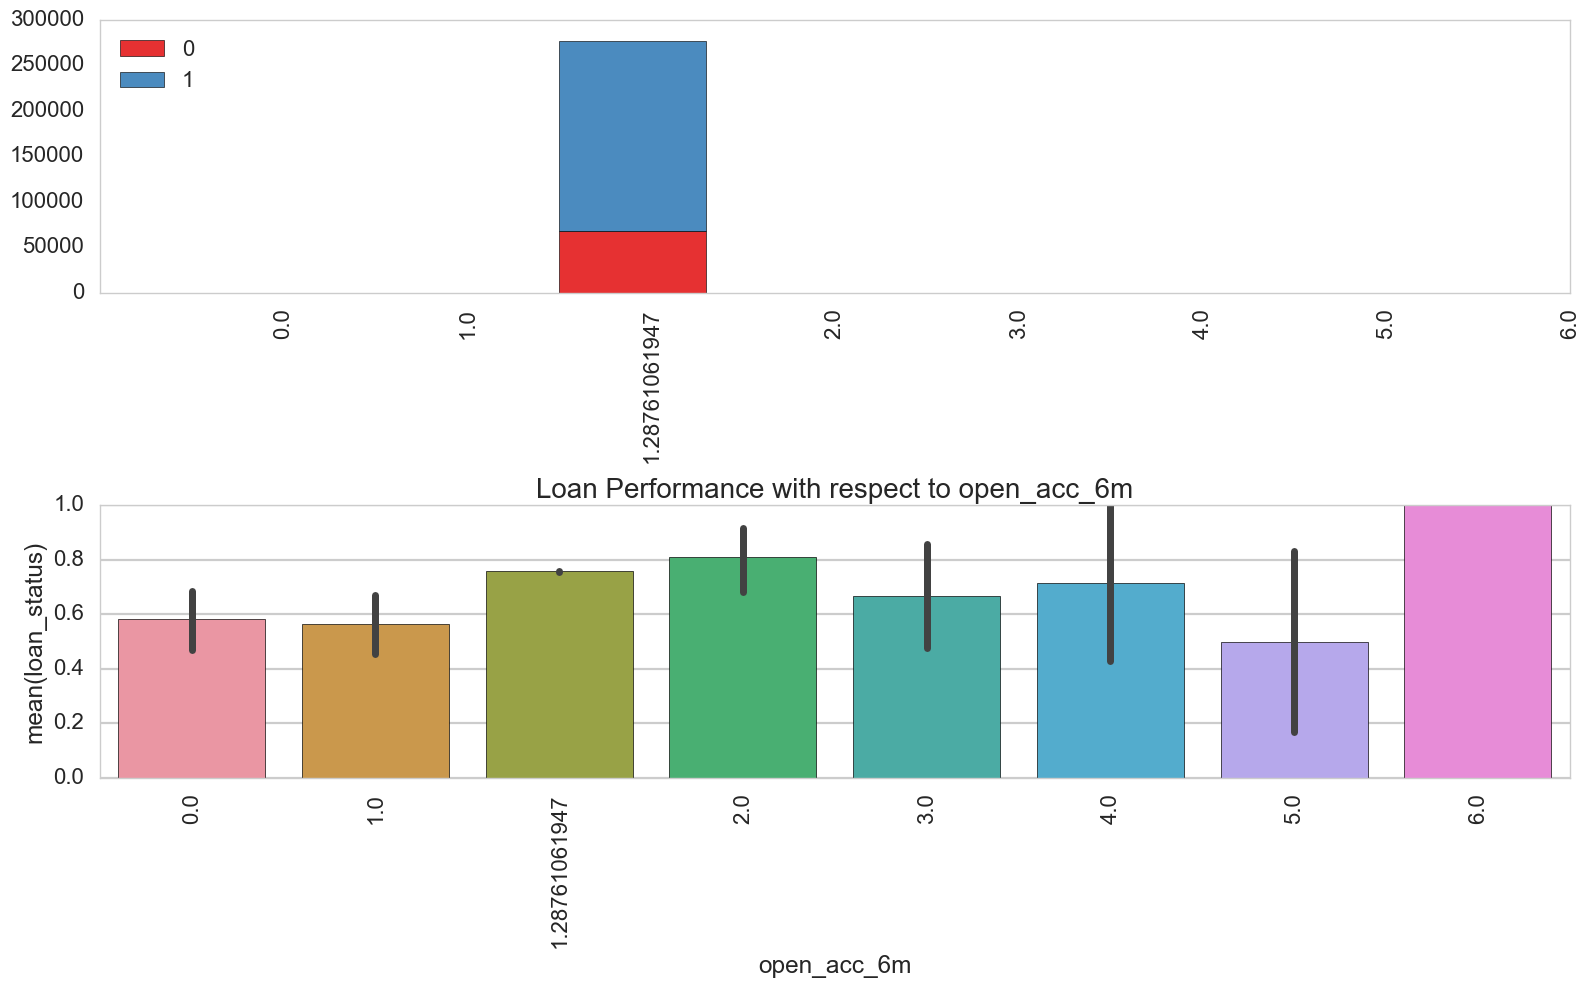

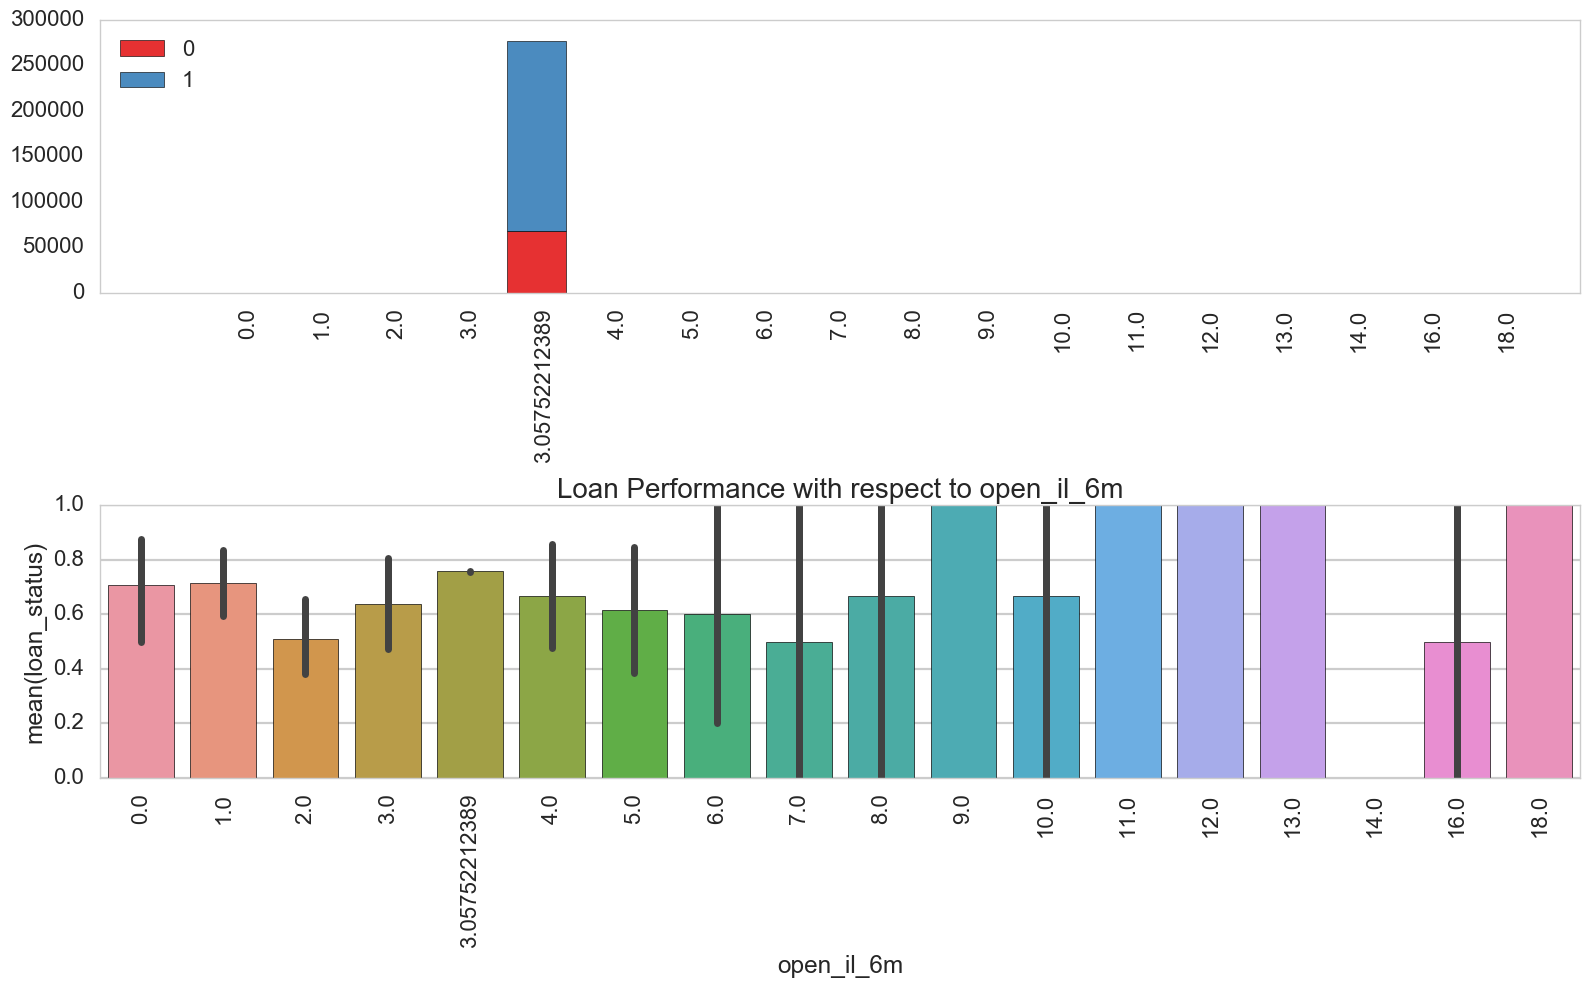

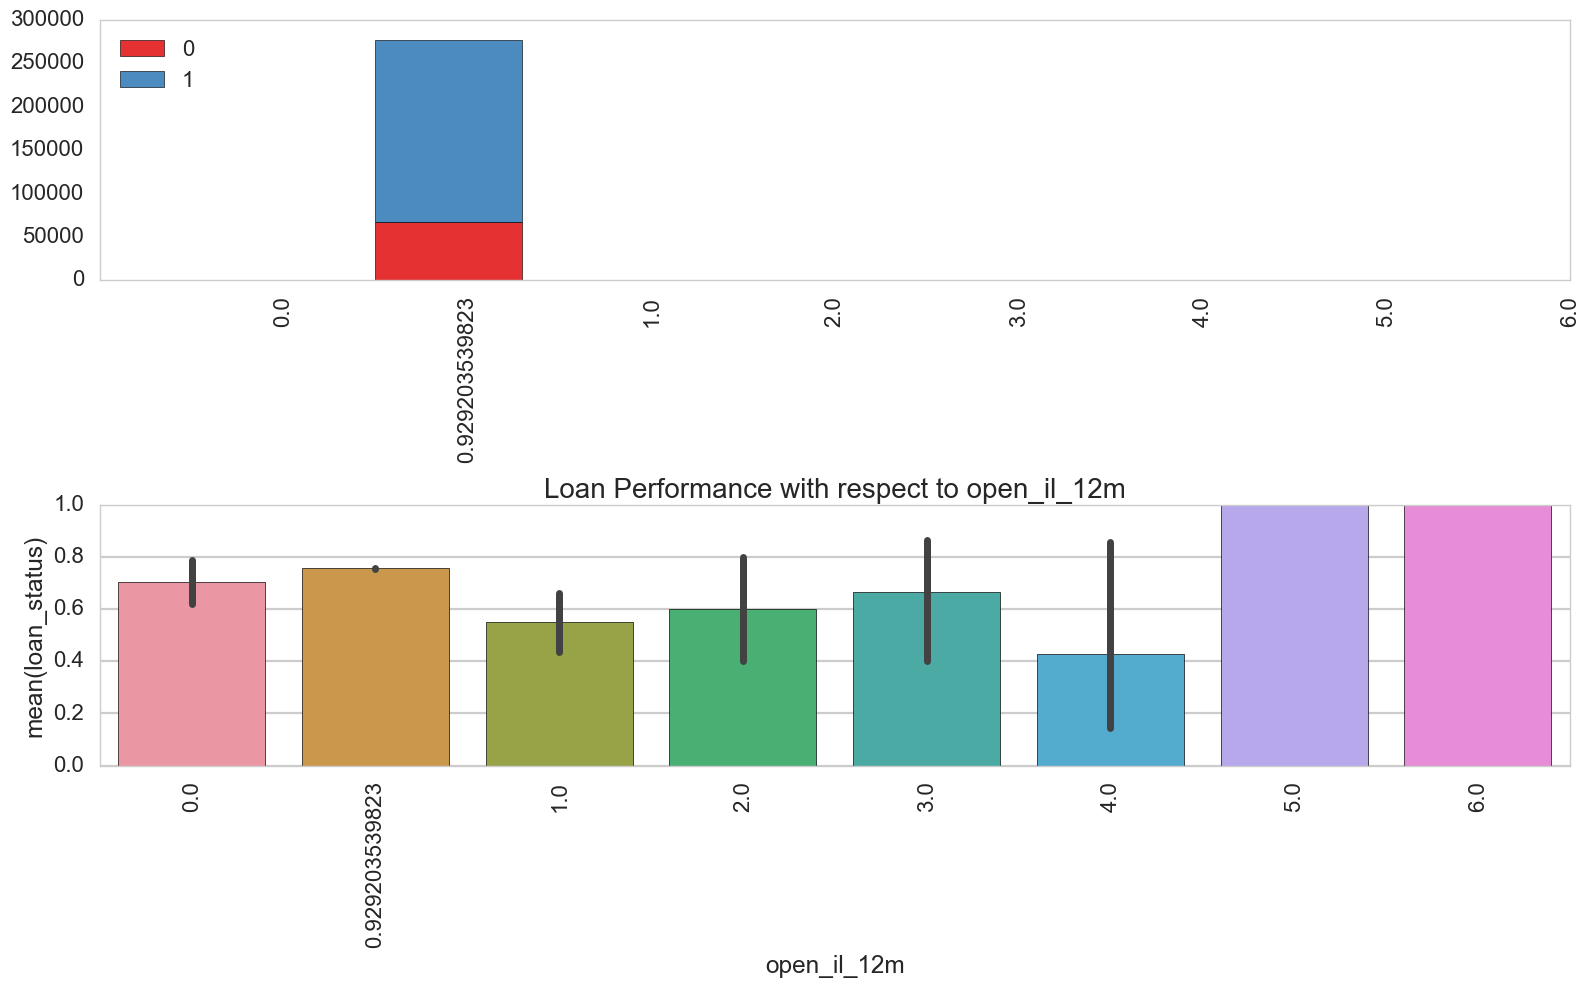

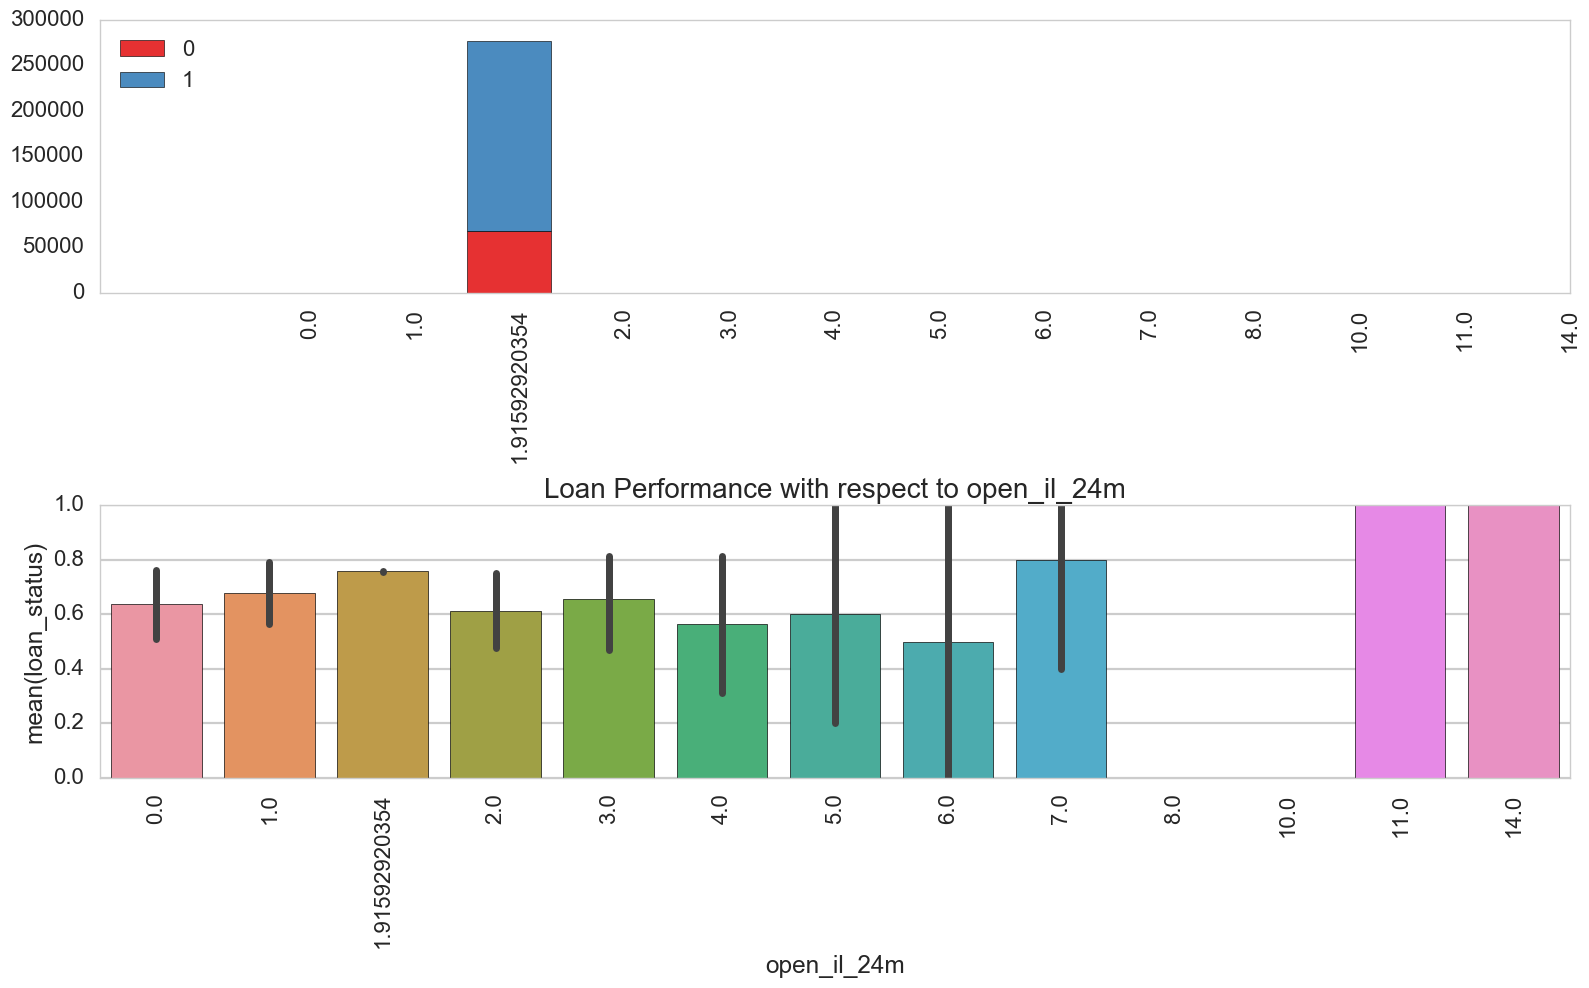

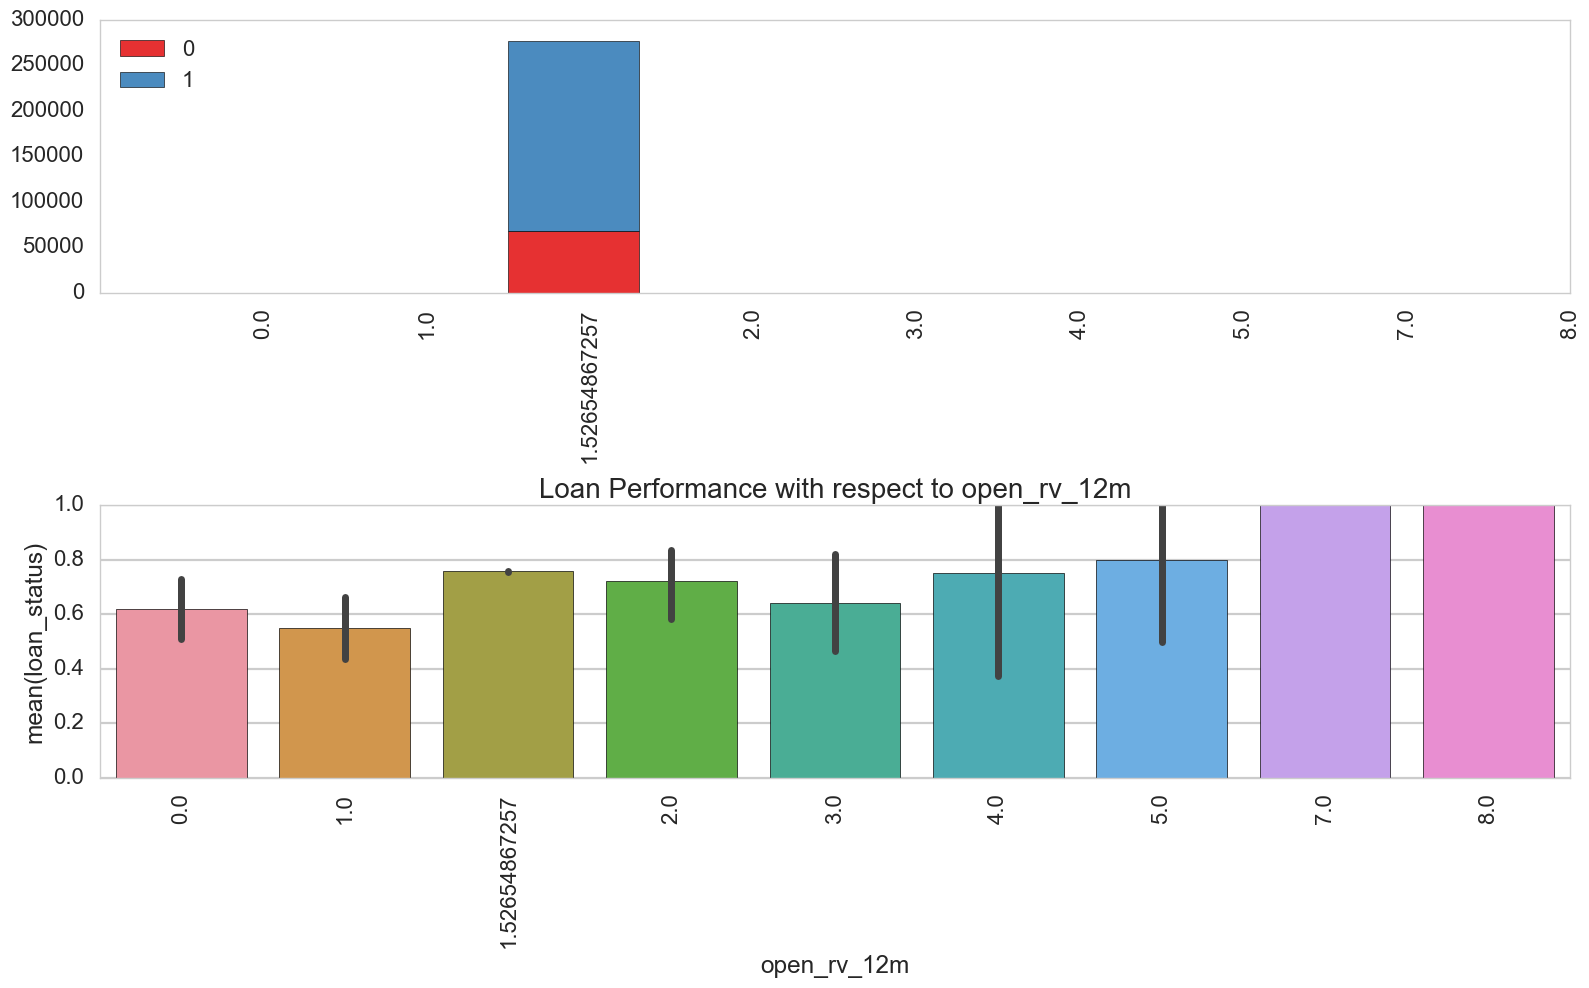

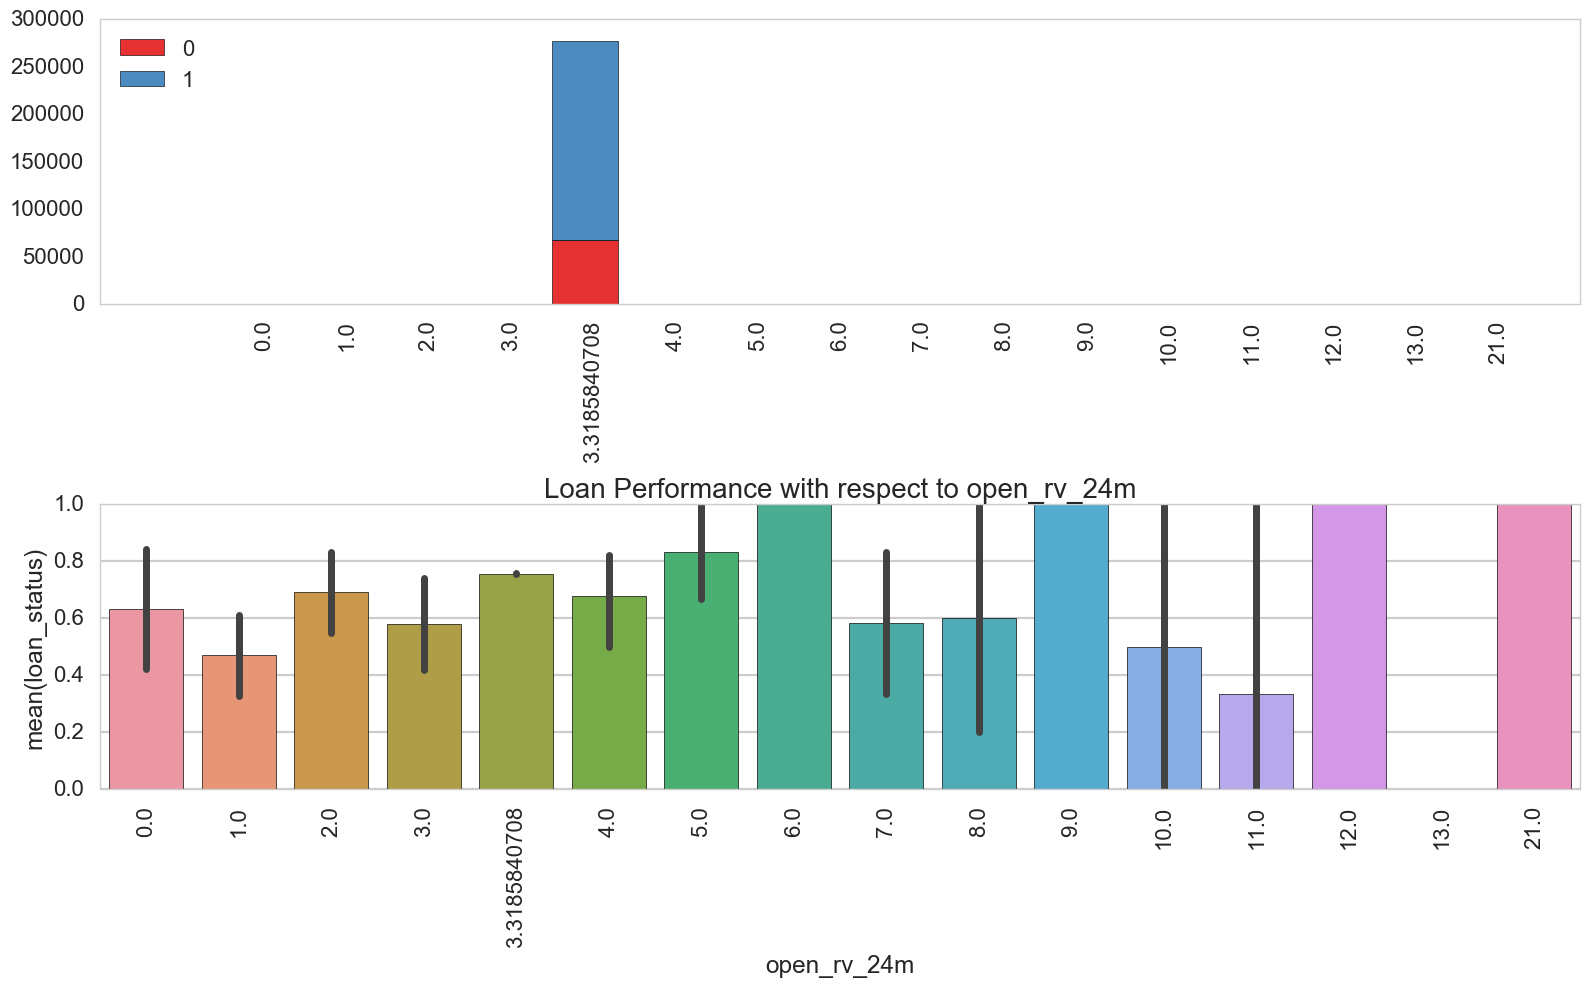

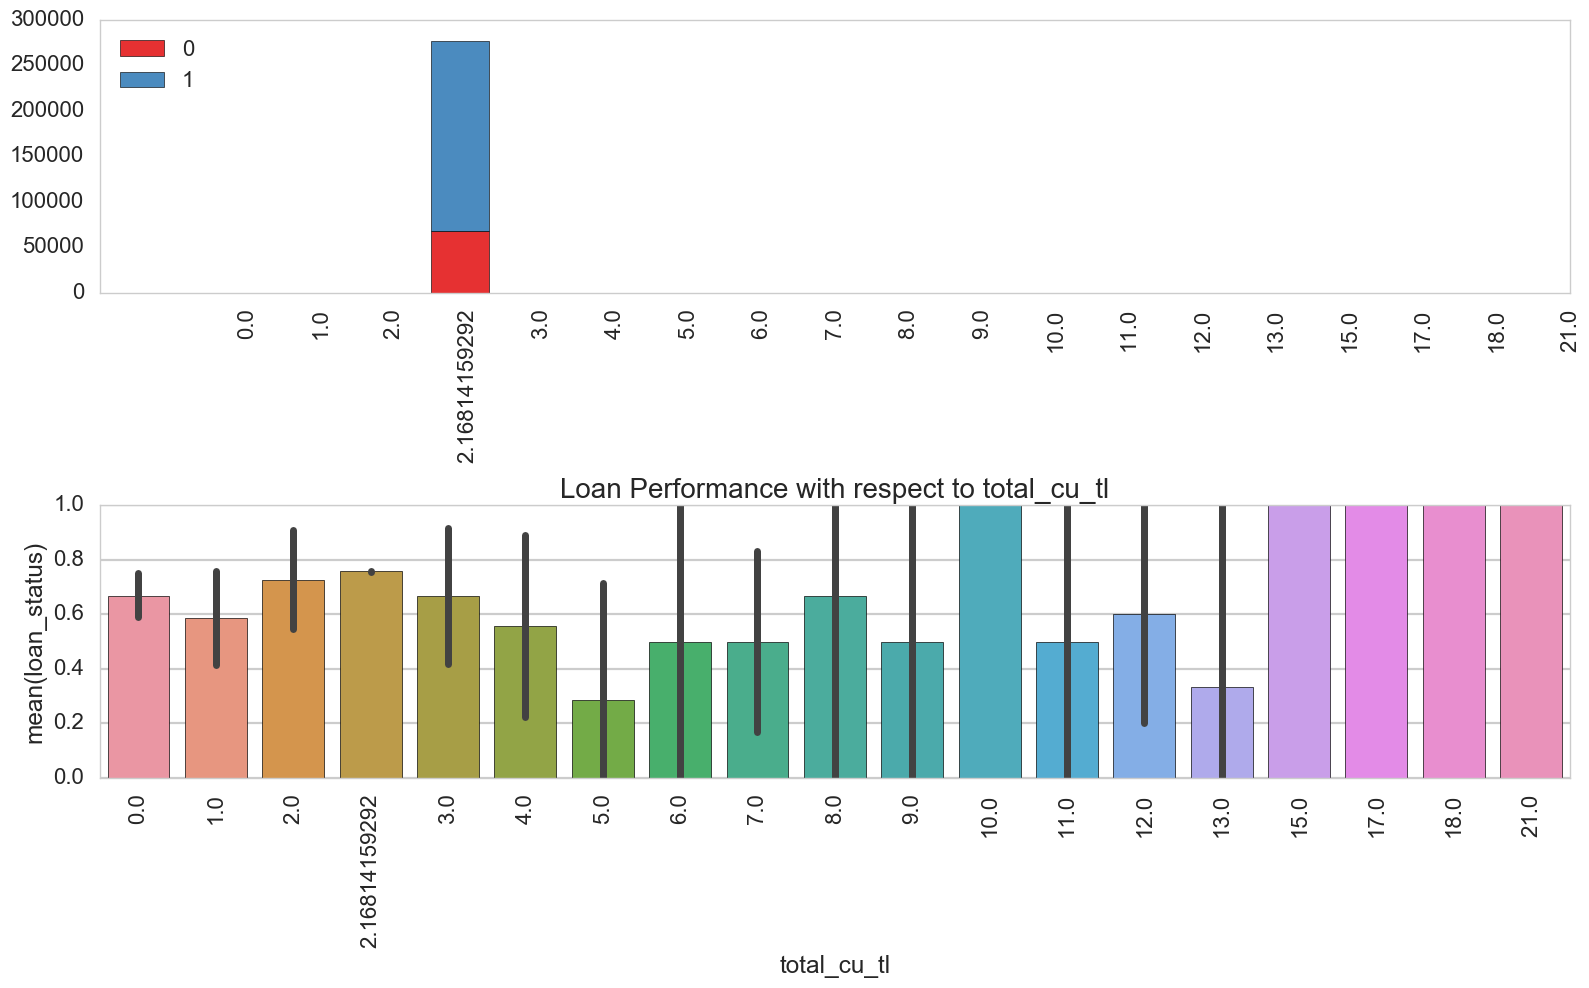

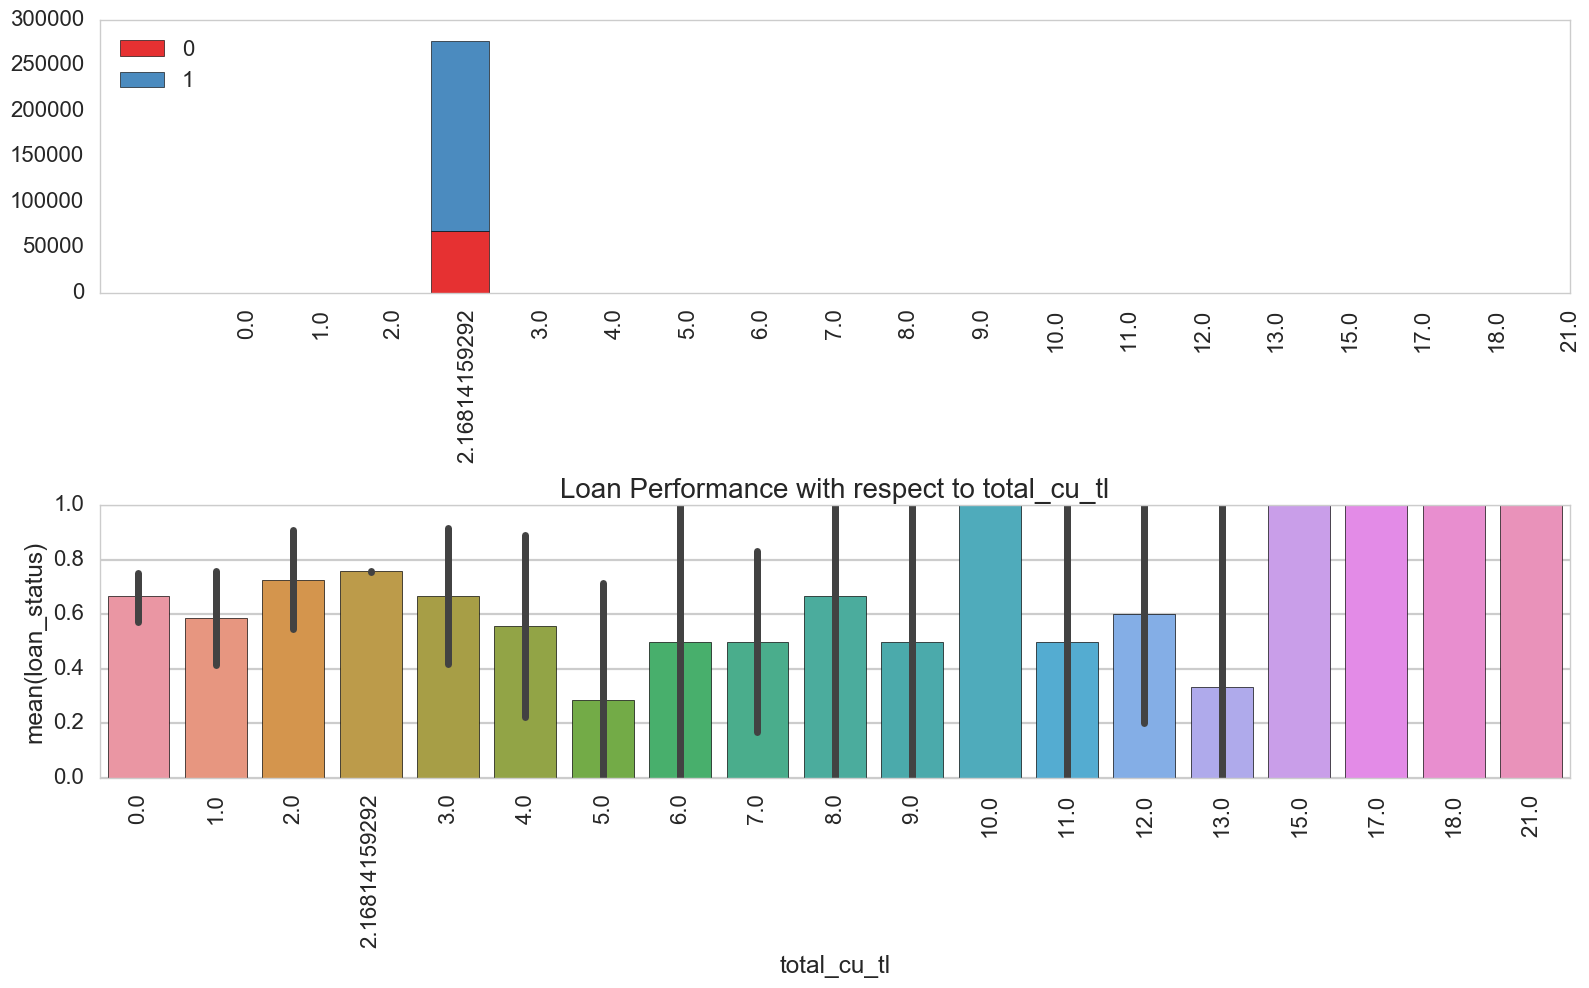

In [106]:
for feature in all_num_col:
    if df_all[feature].unique().shape[0]<50:
        plot_bar(feature,df_all)

data is too inbalanced
data is too inbalanced
data is too inbalanced
data is too inbalanced
data is too inbalanced
data is too inbalanced
data is too inbalanced
data is too inbalanced


/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


data is too inbalanced


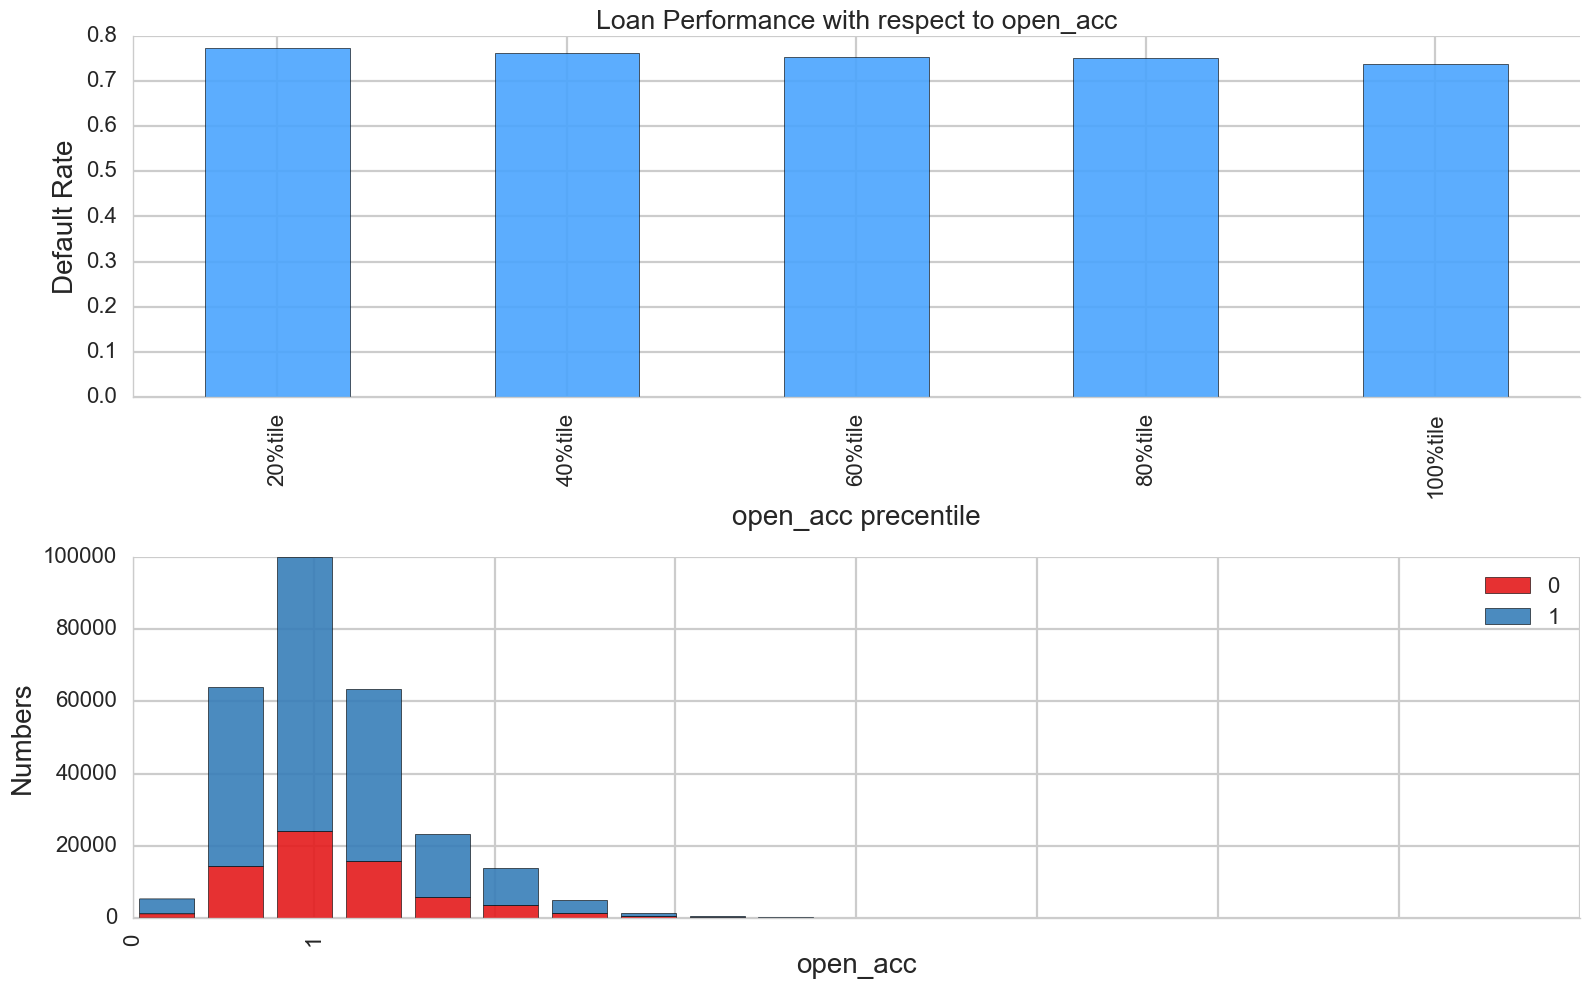

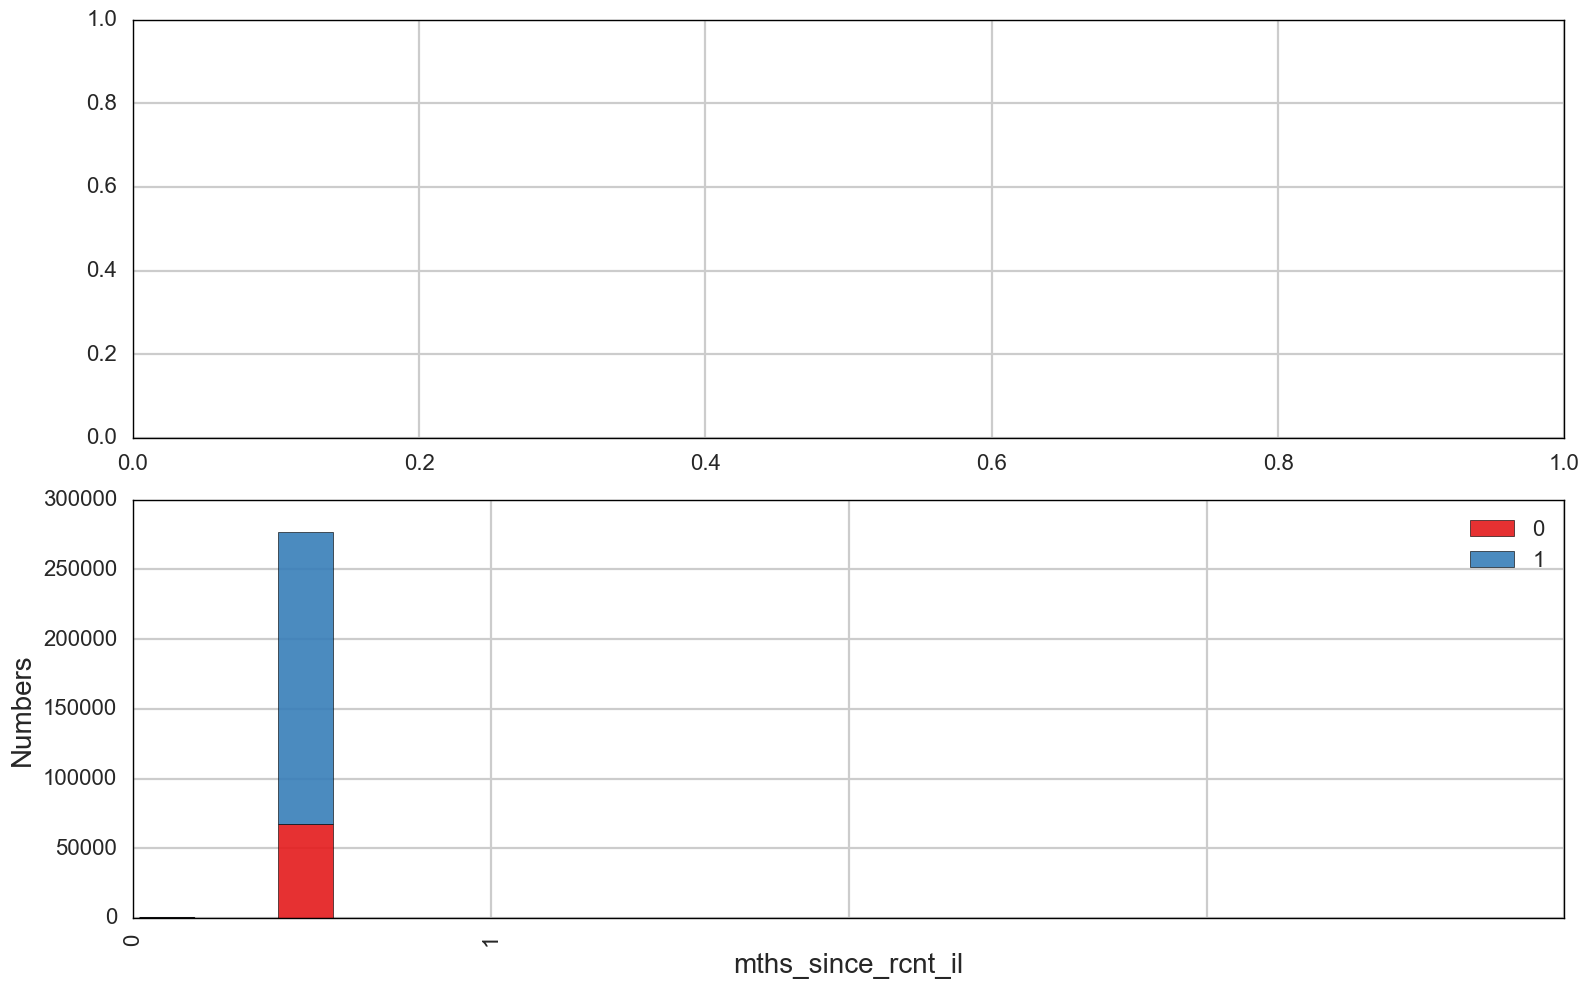

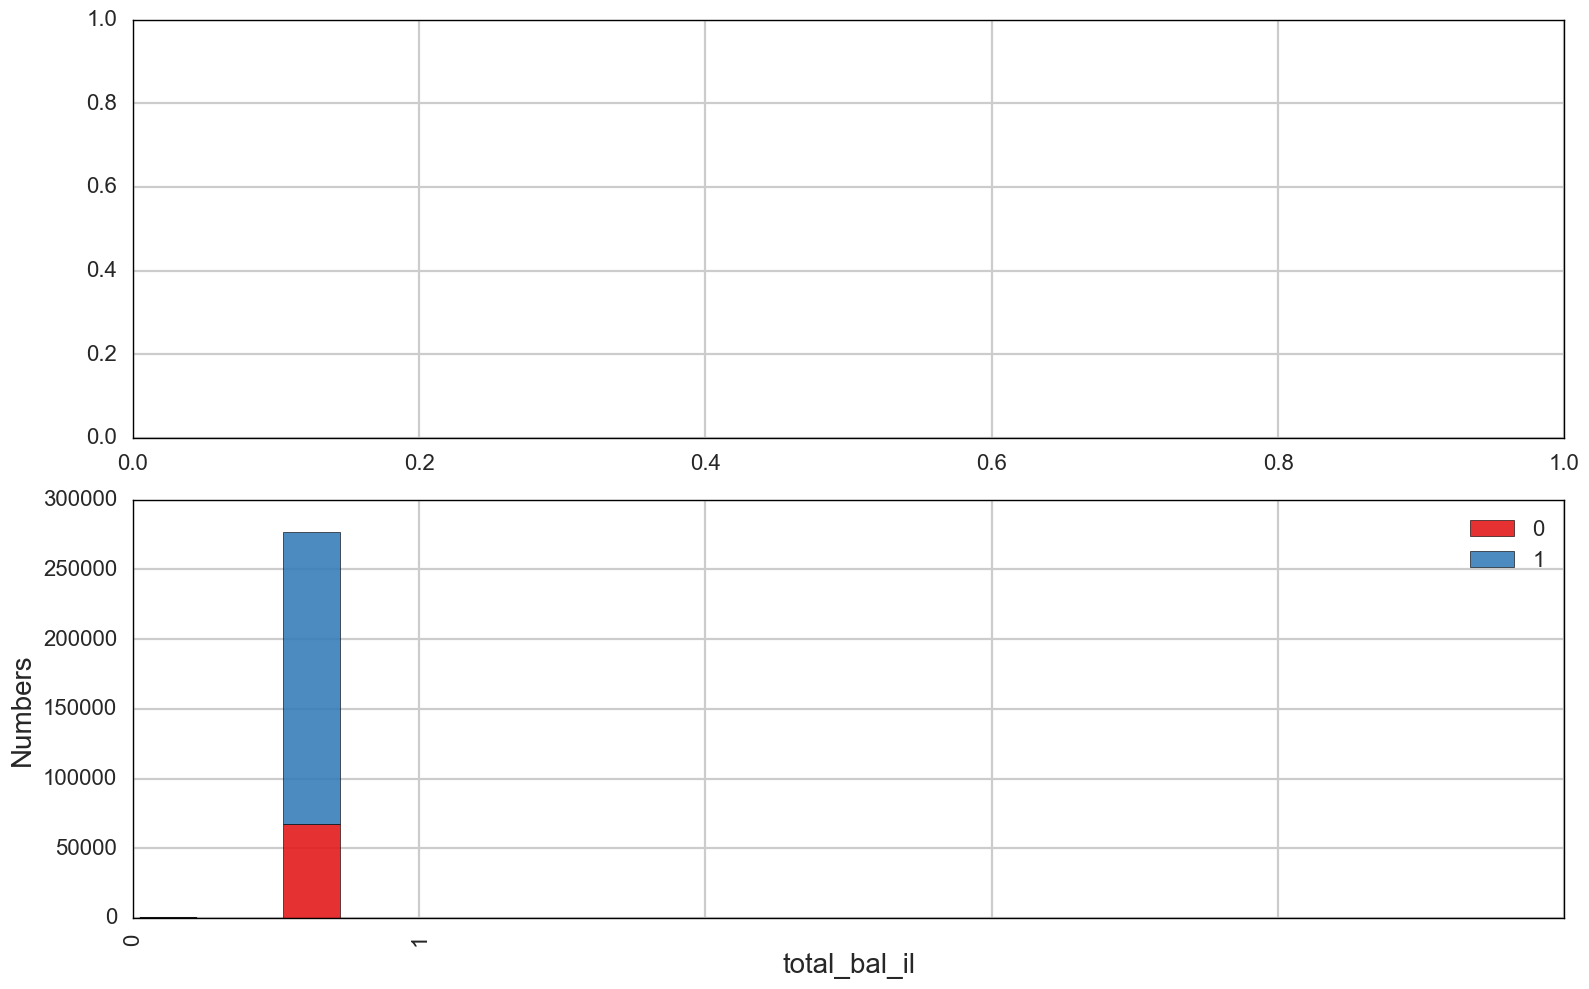

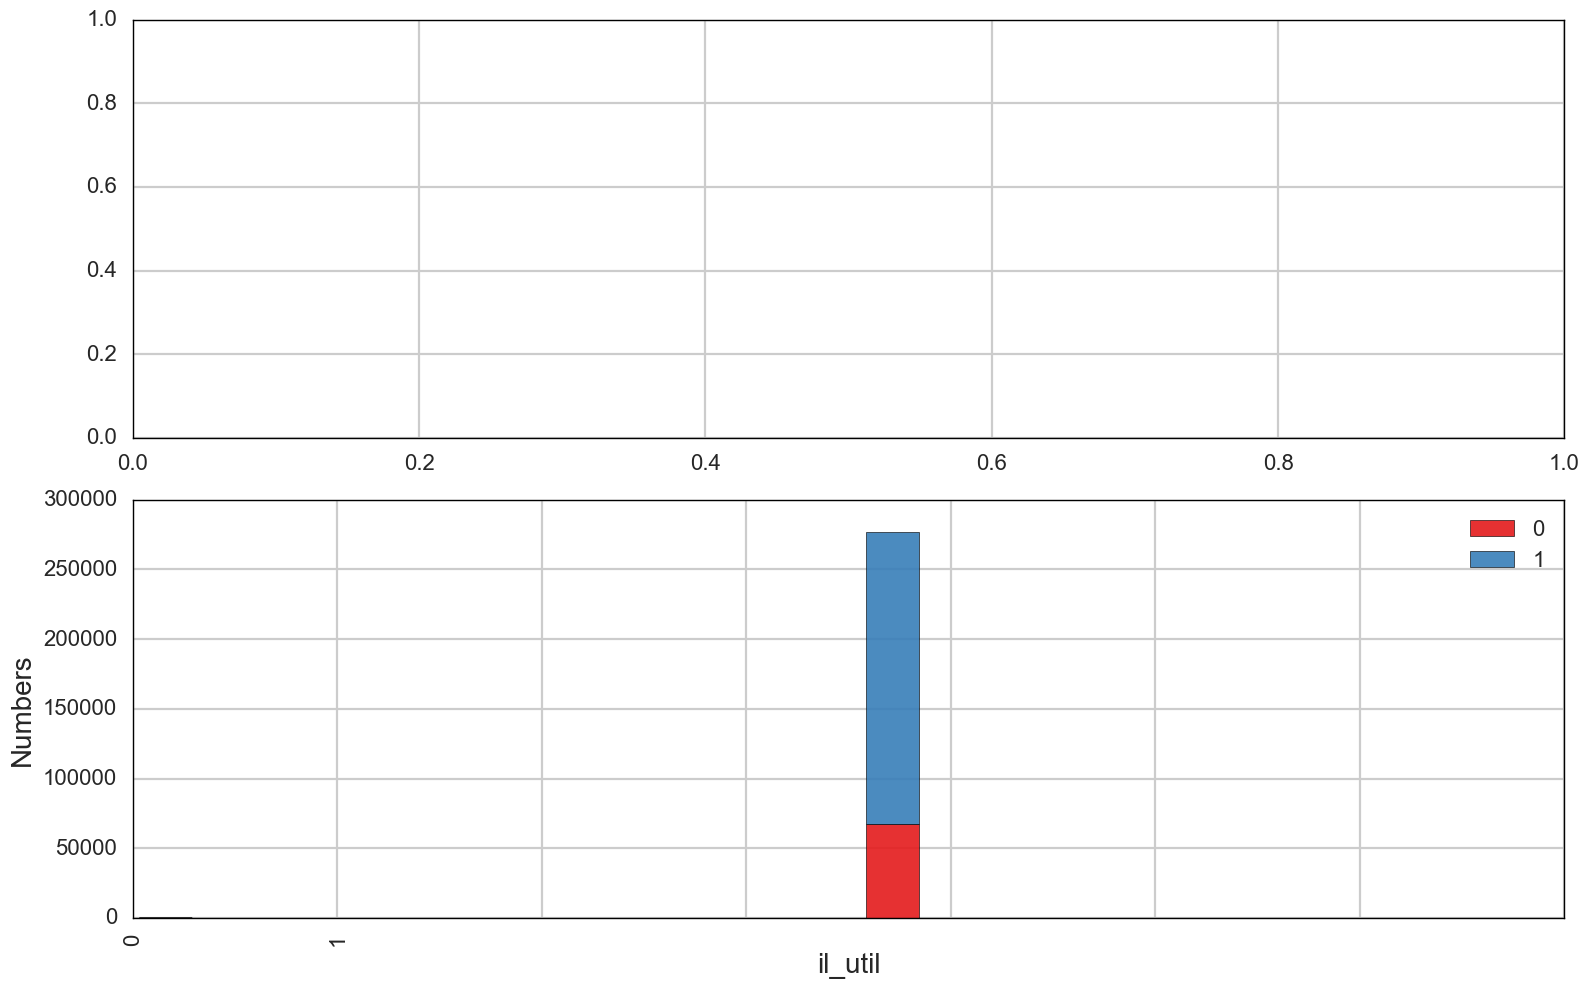

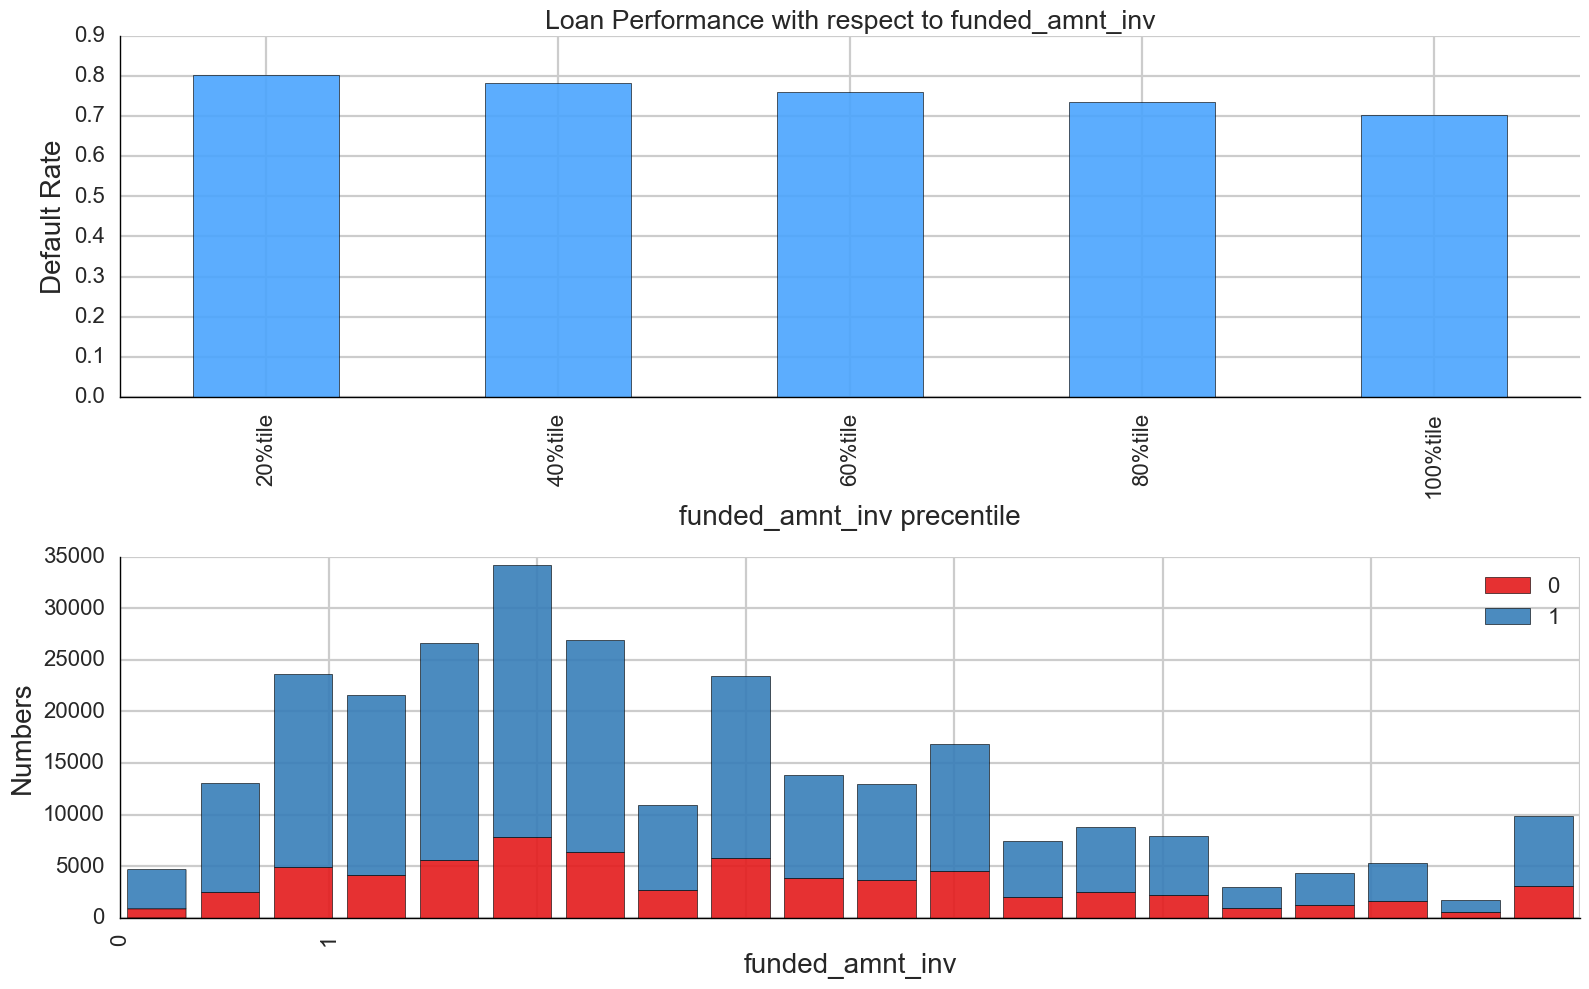

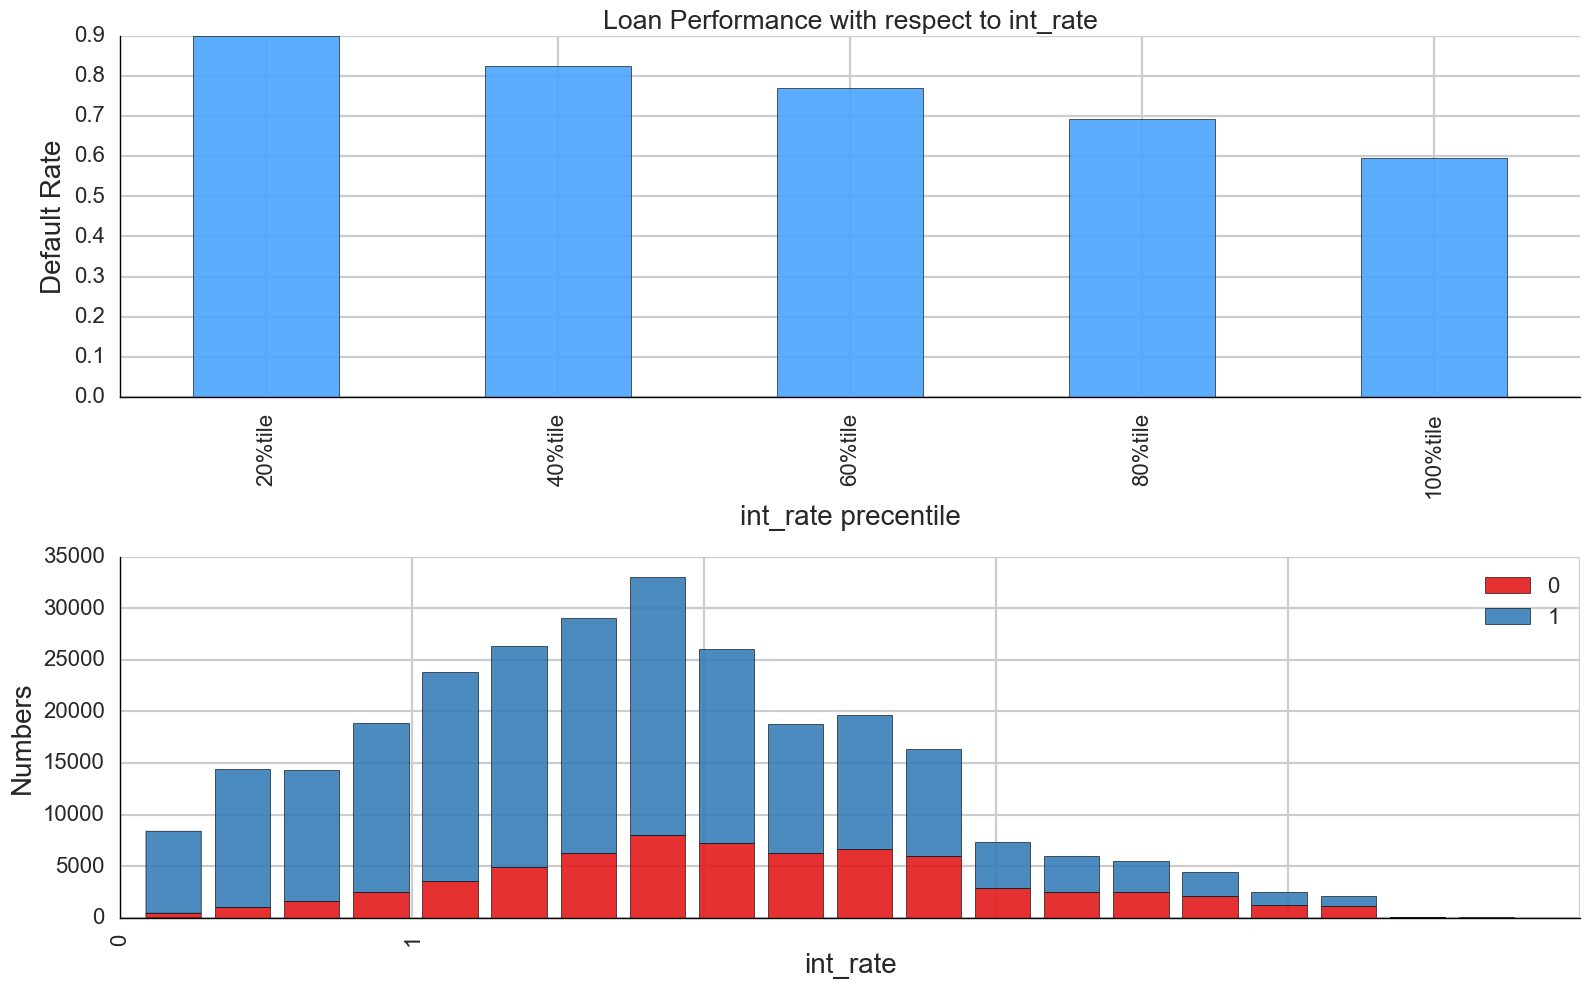

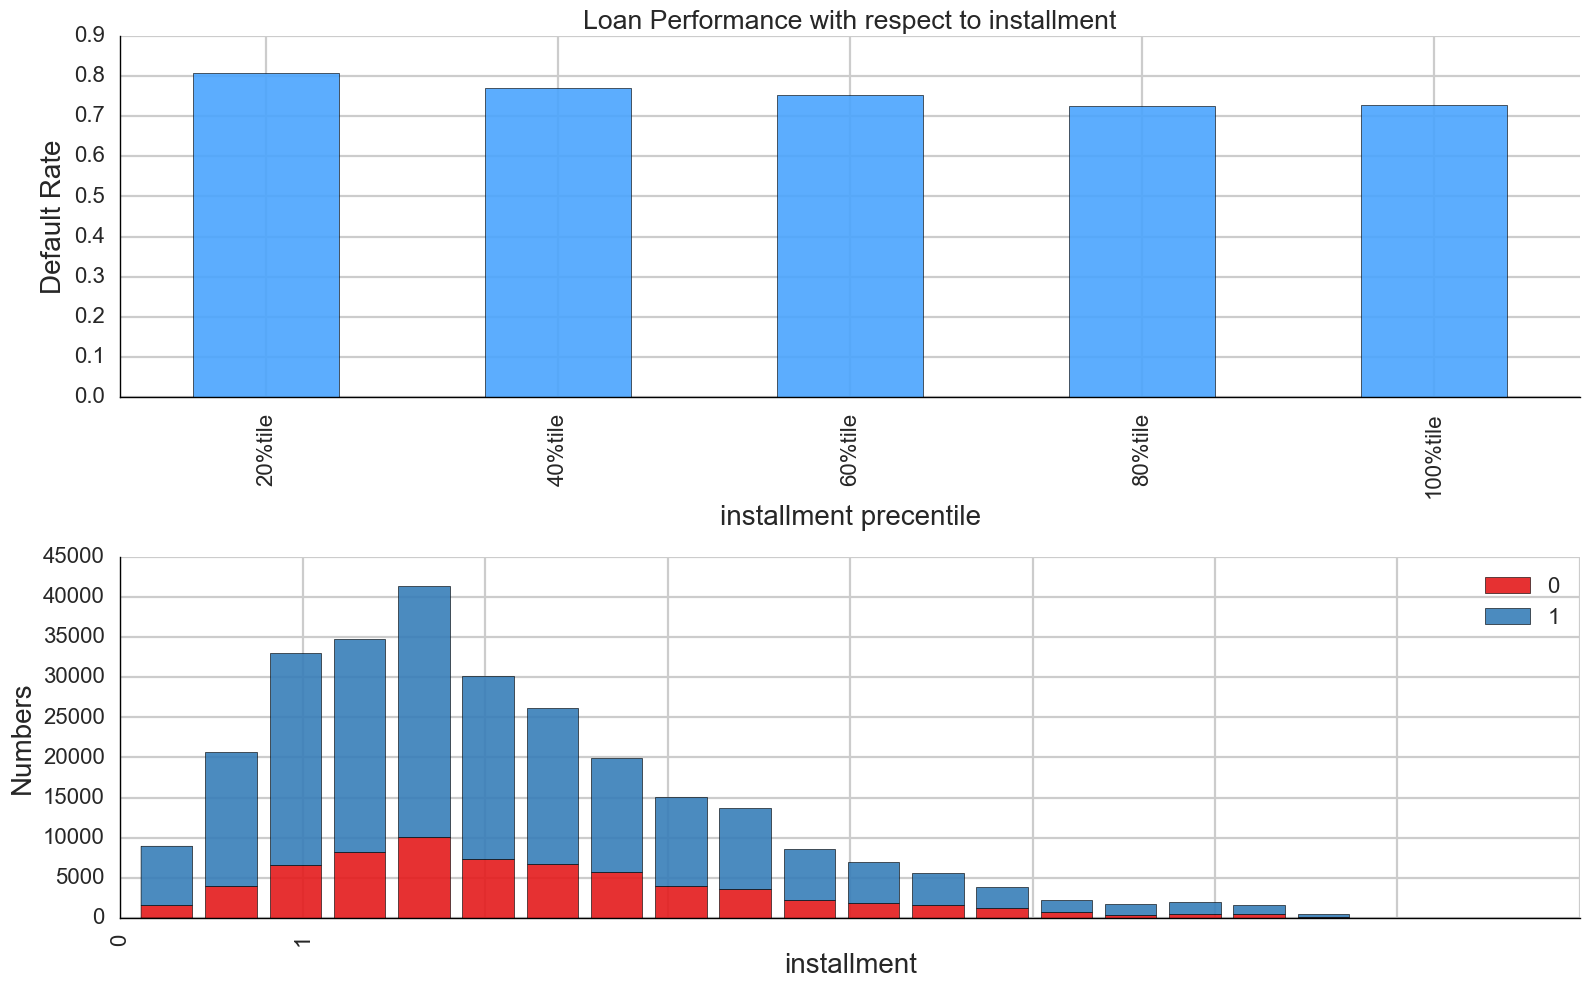

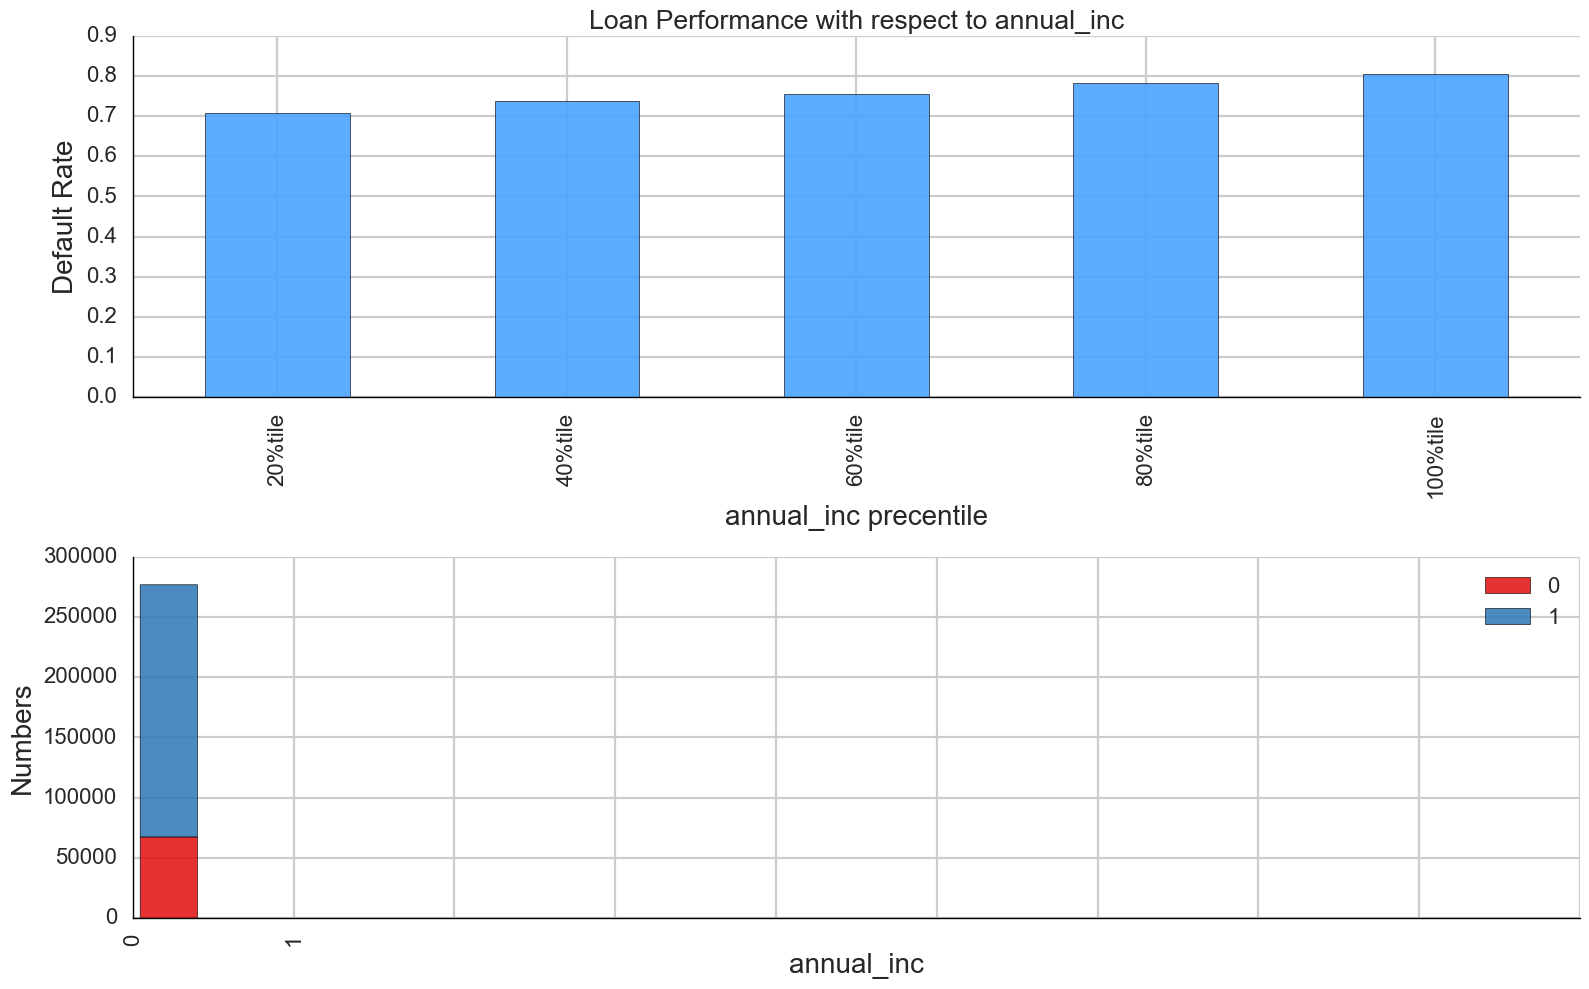

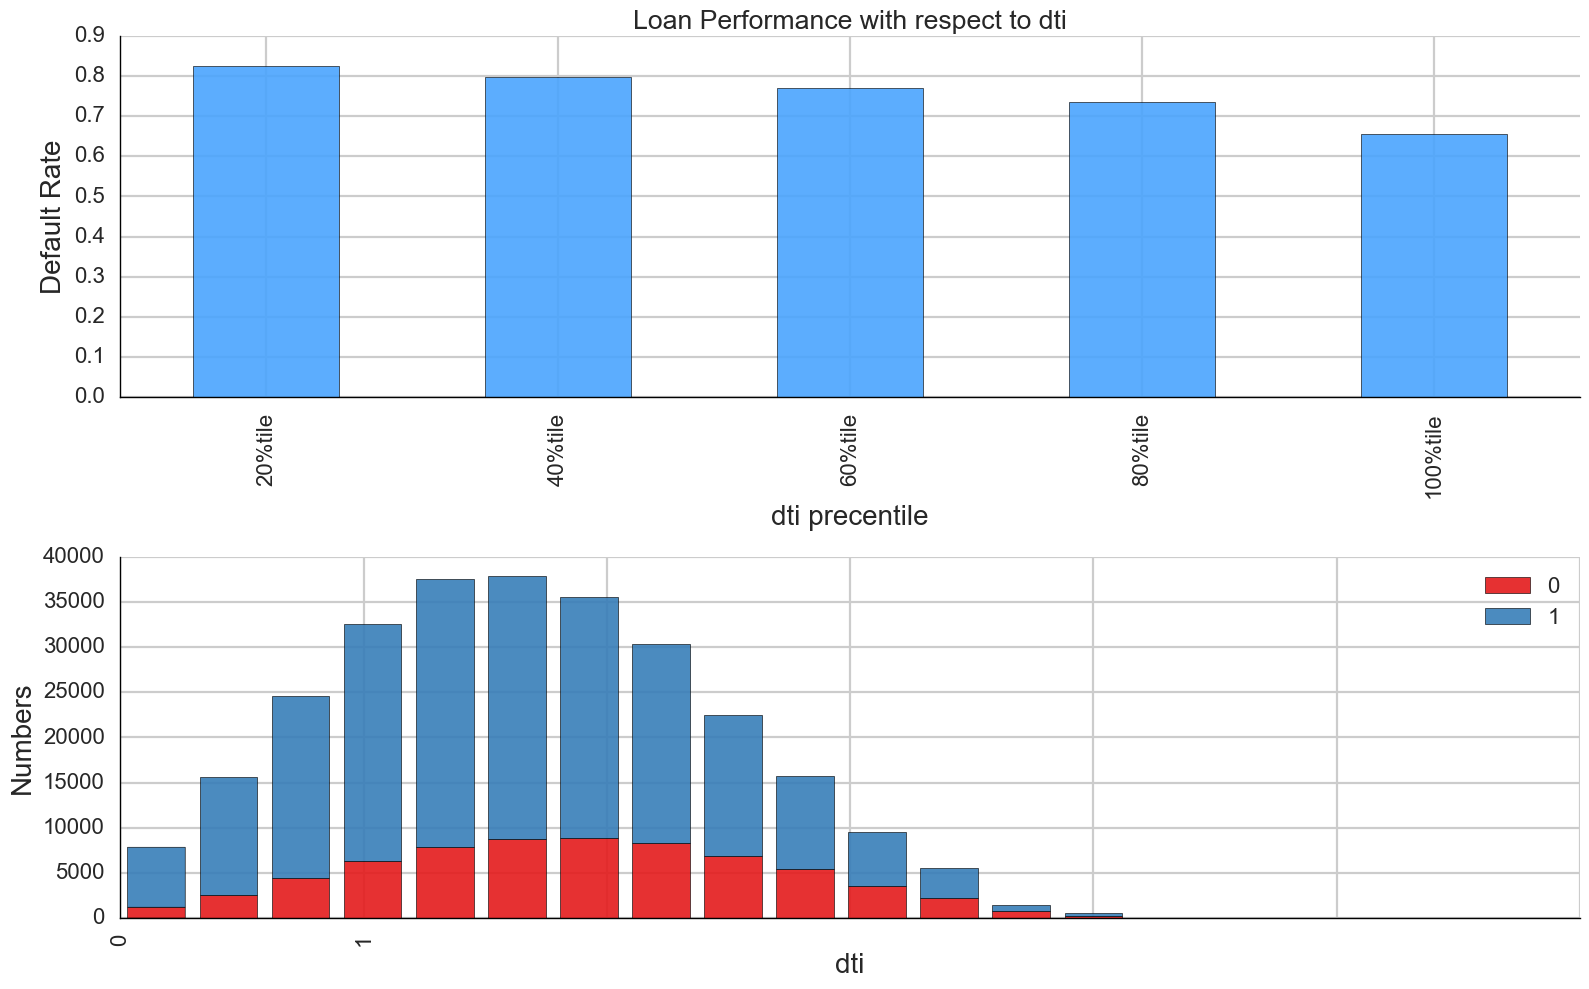

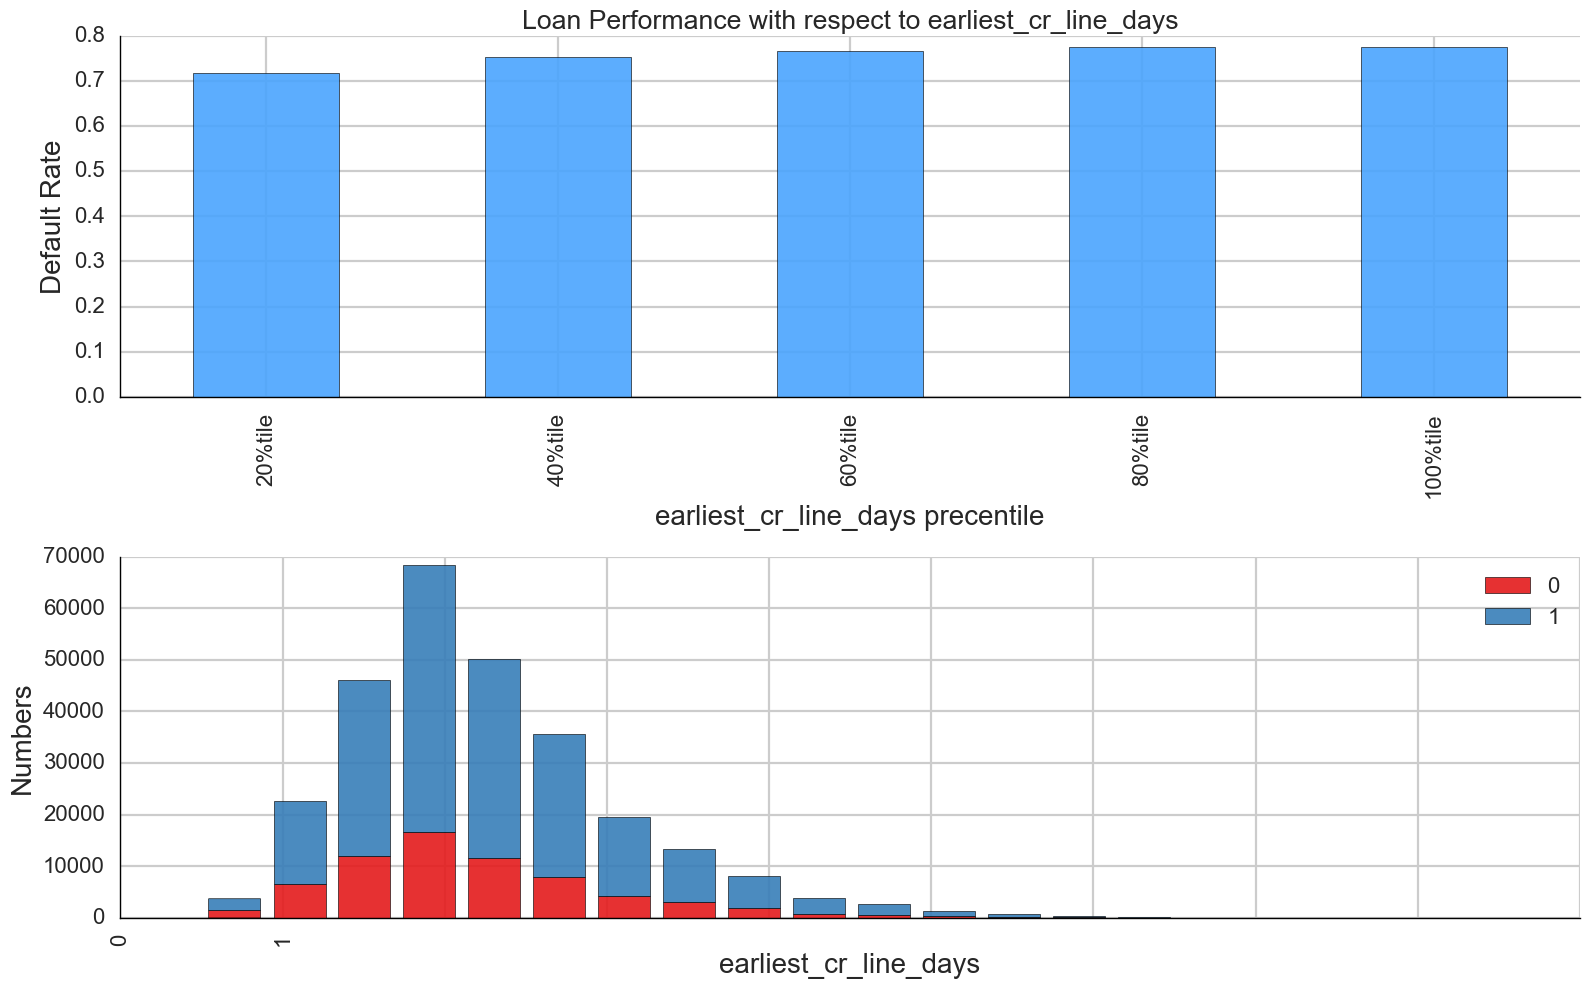

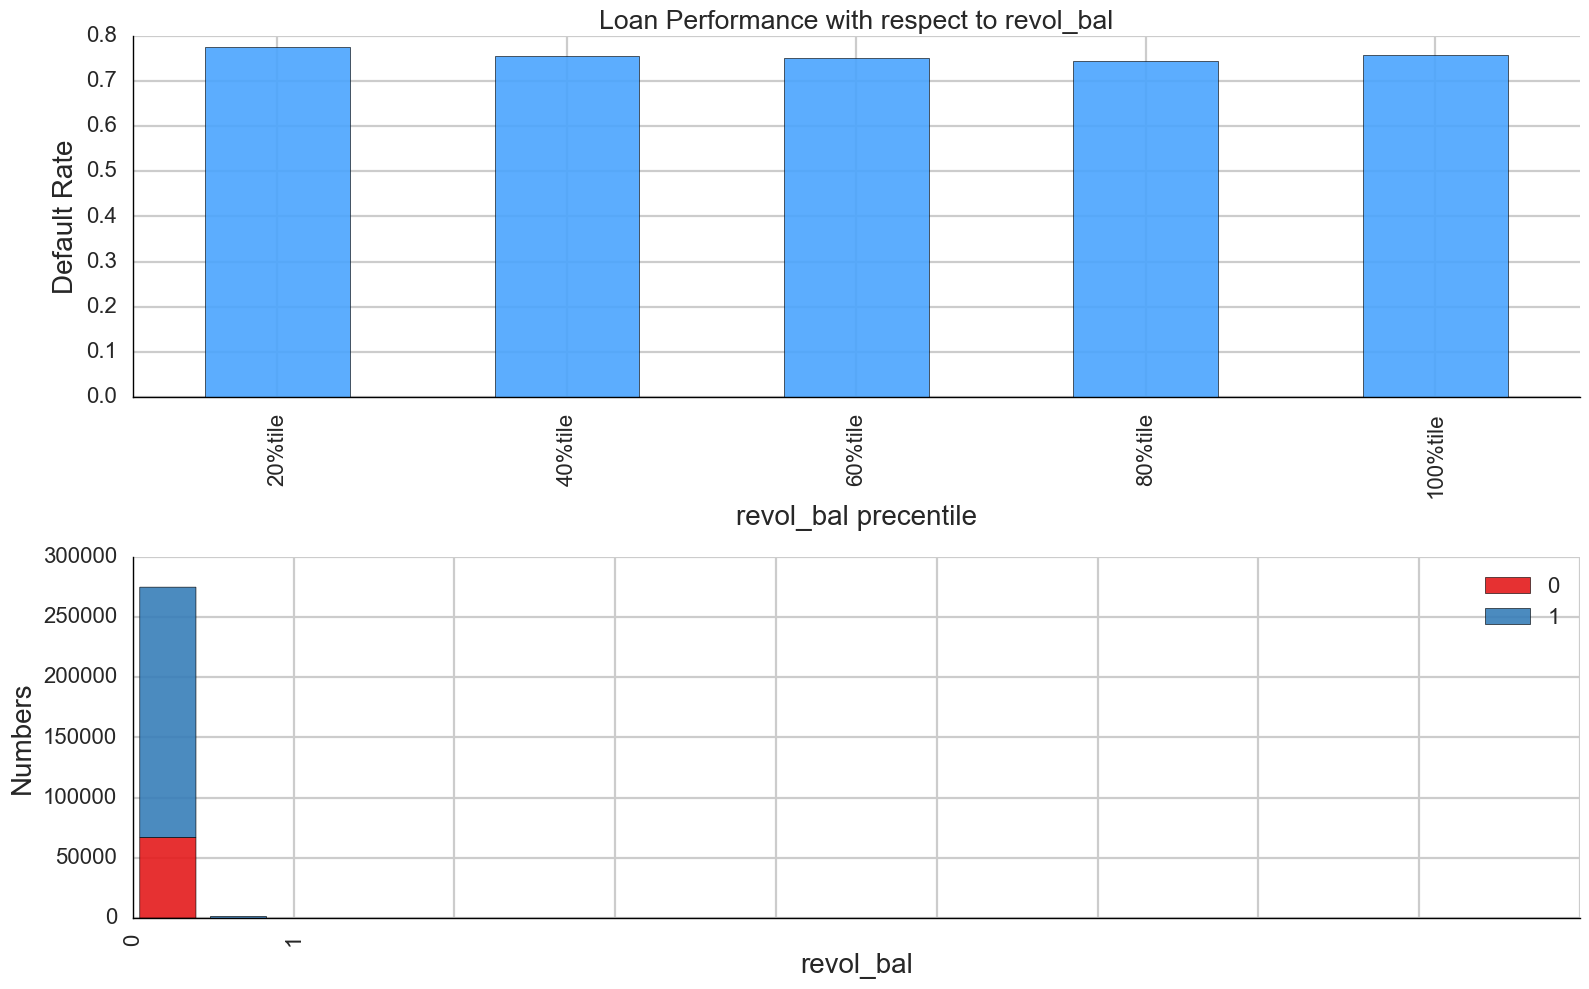

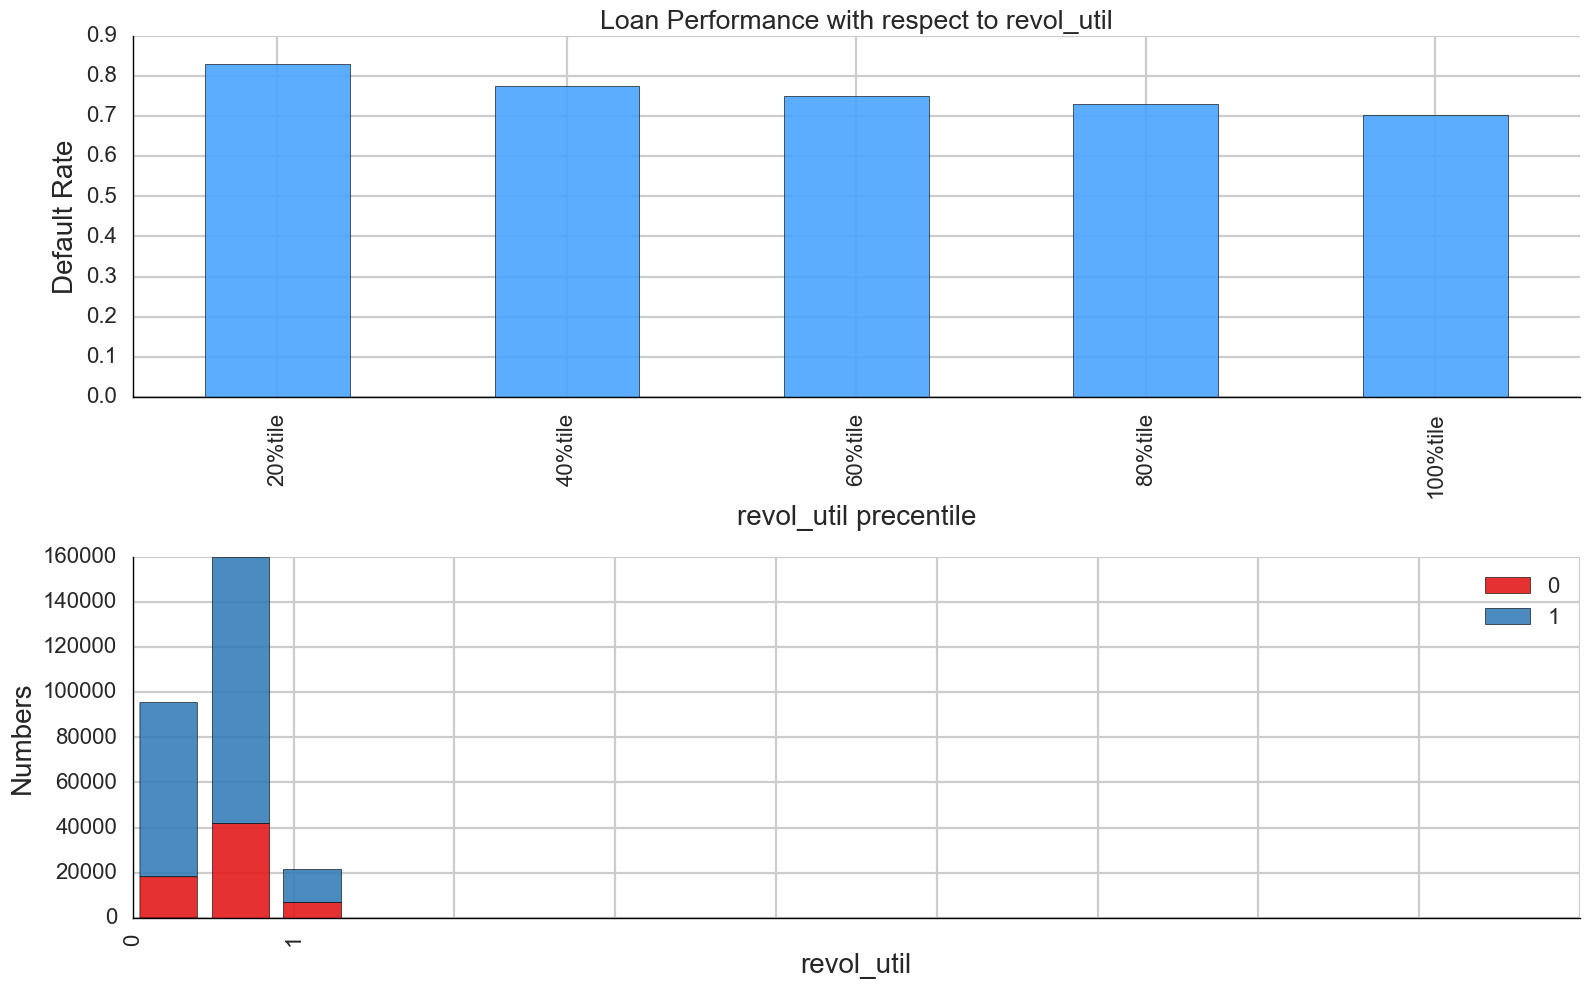

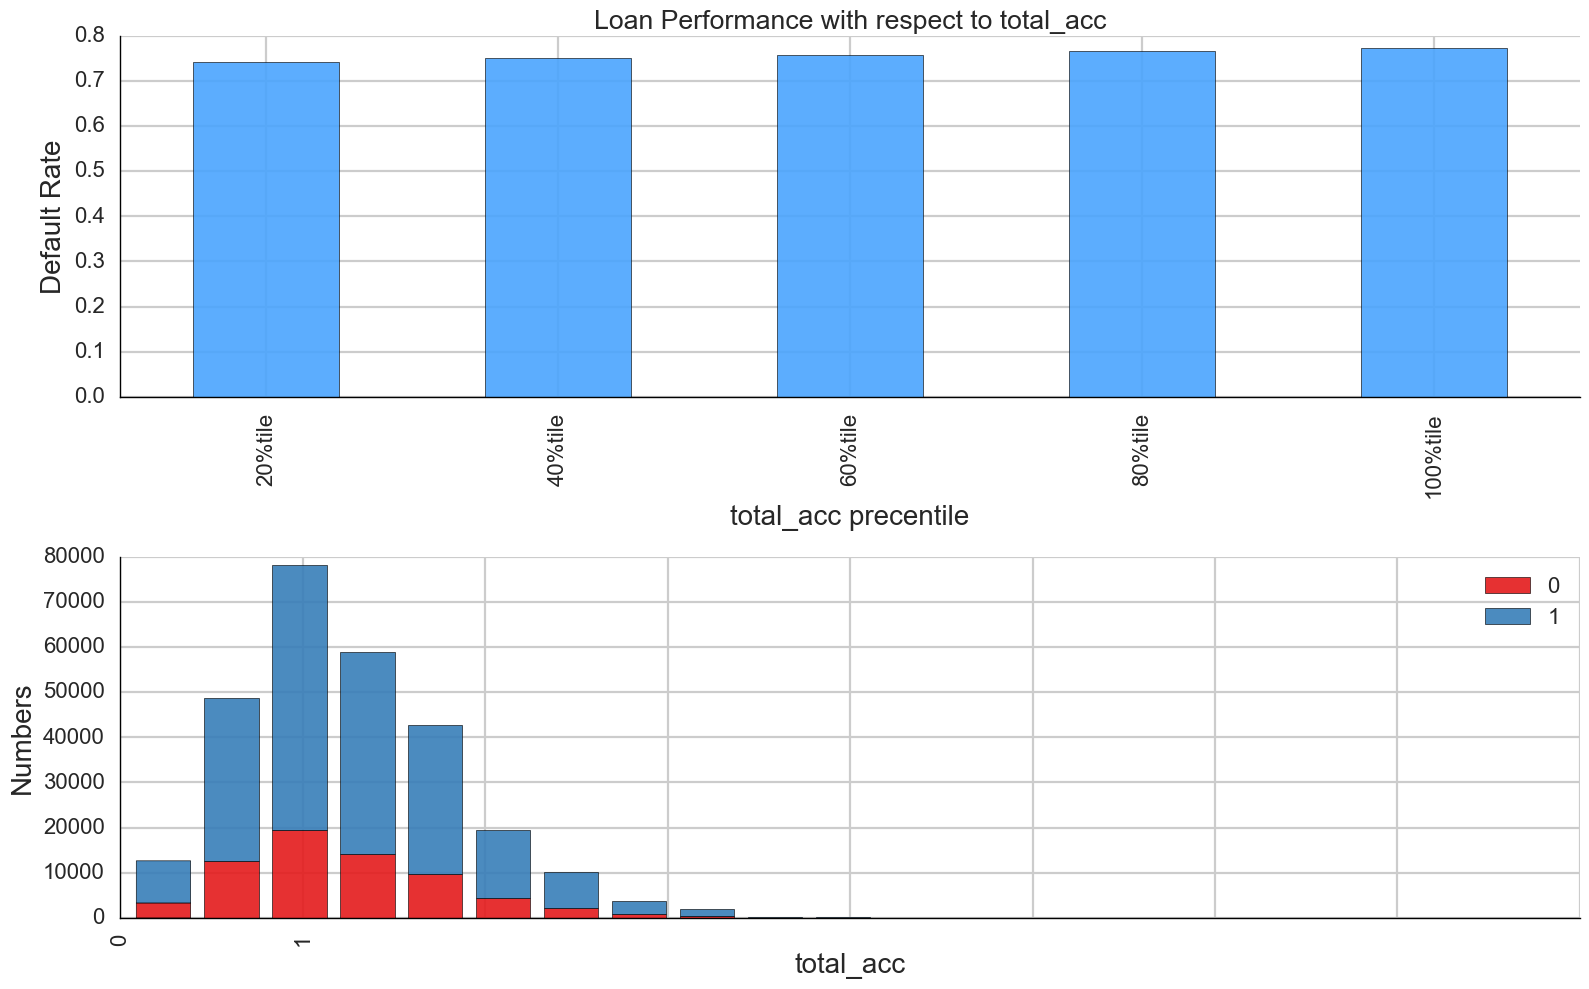

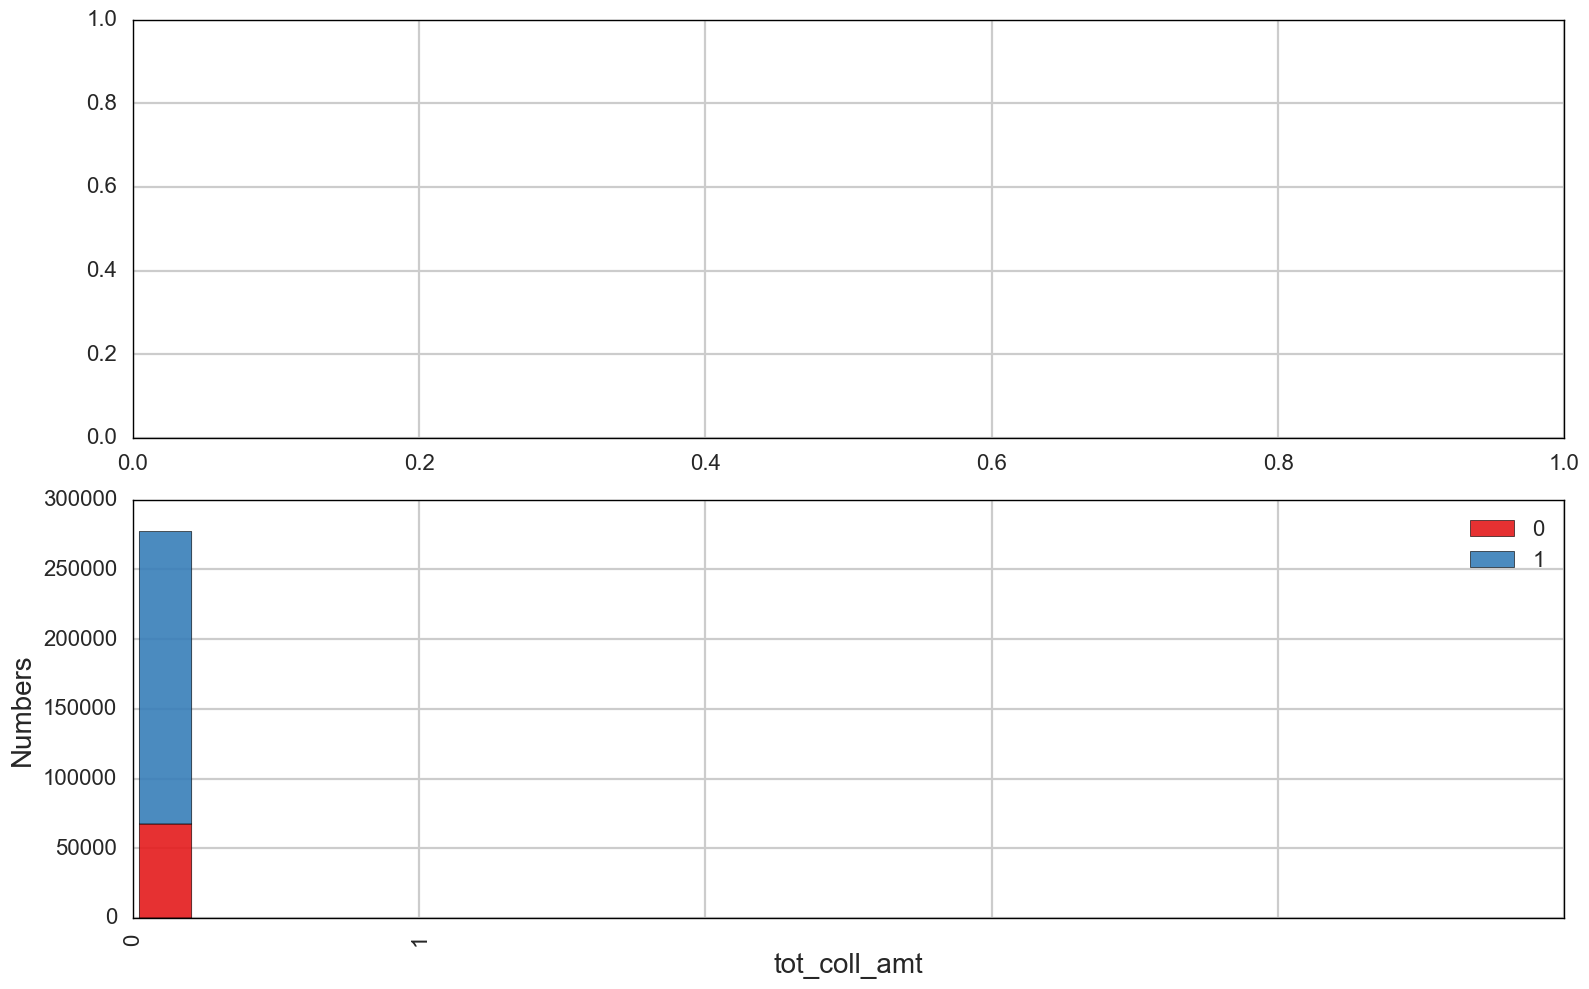

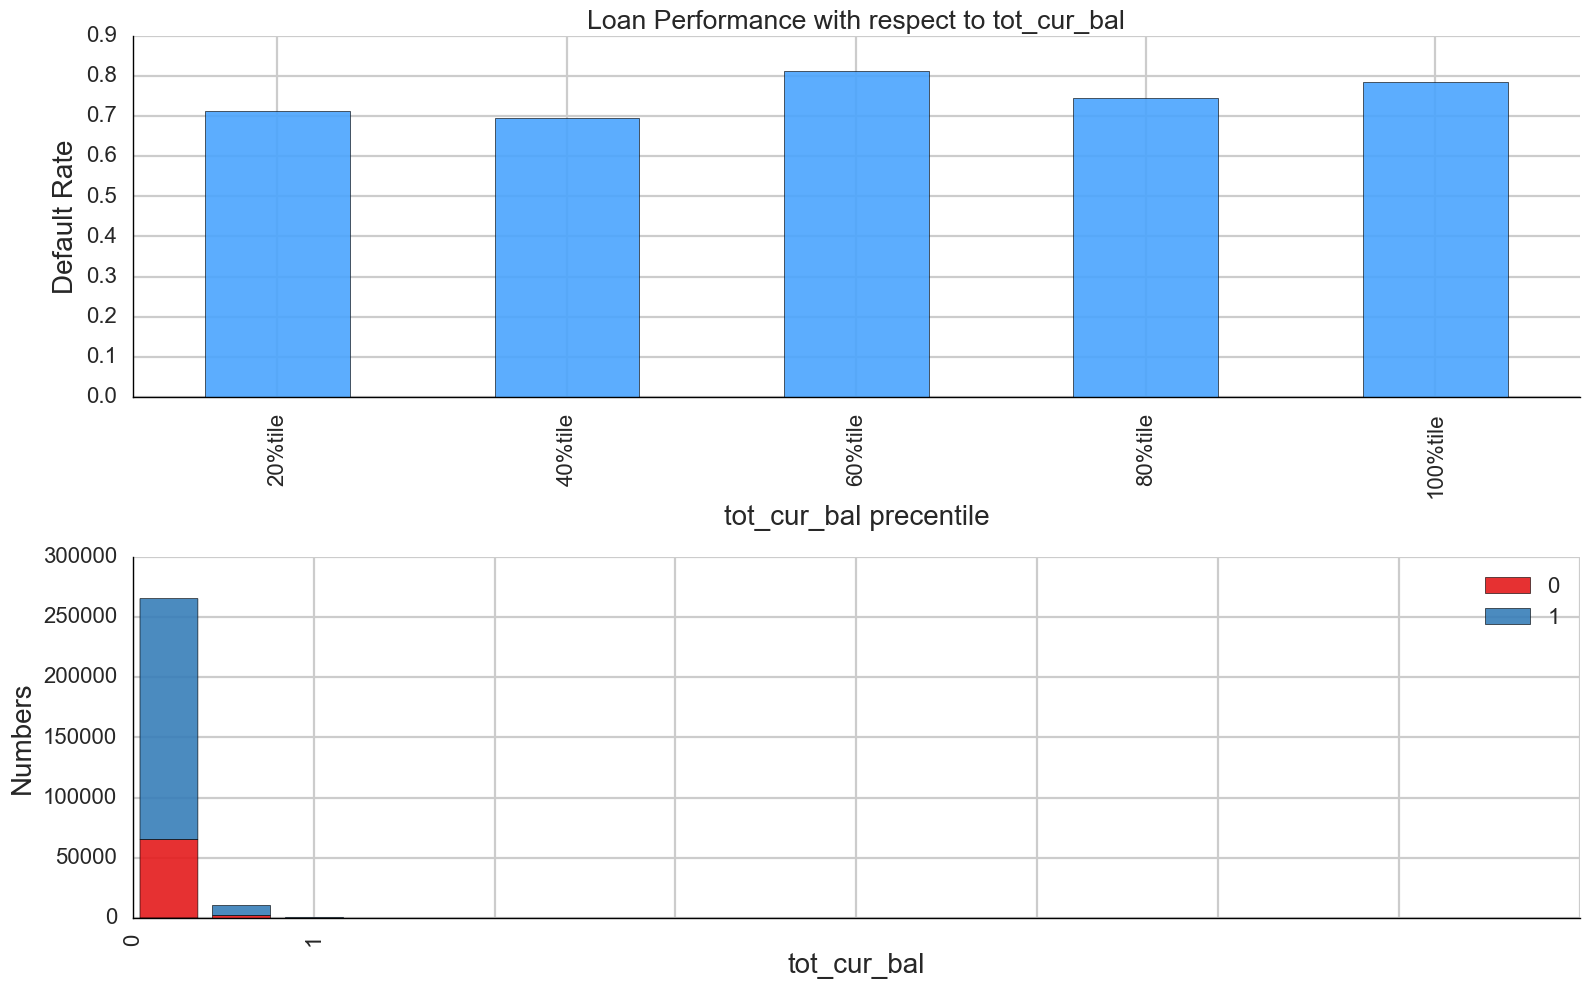

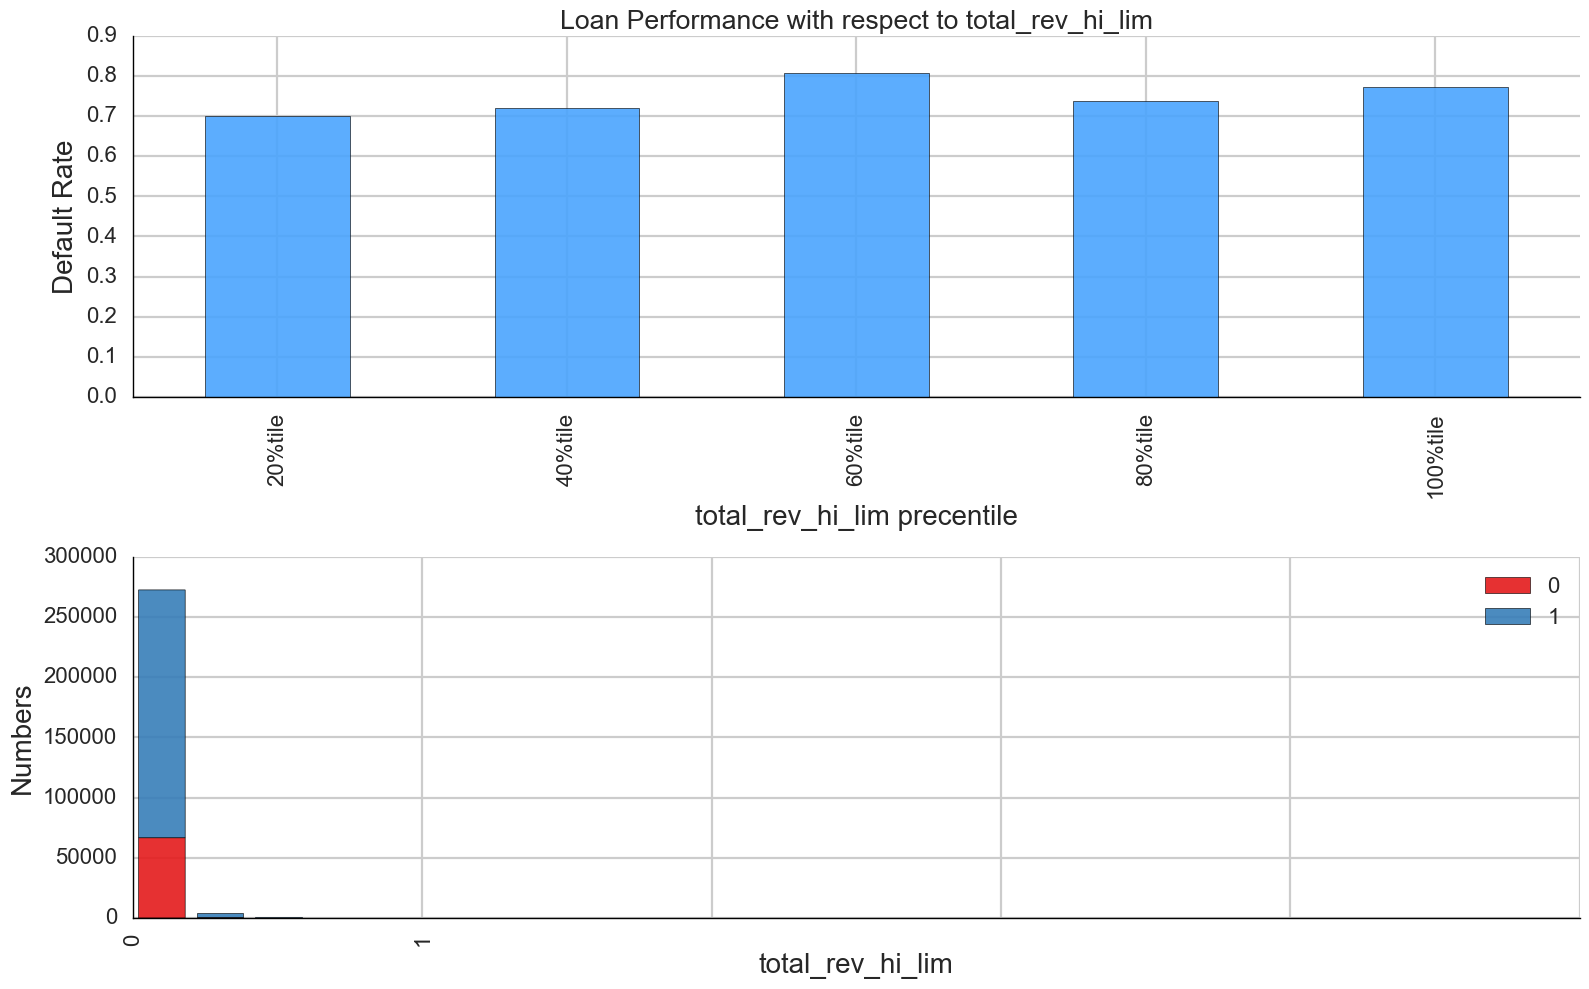

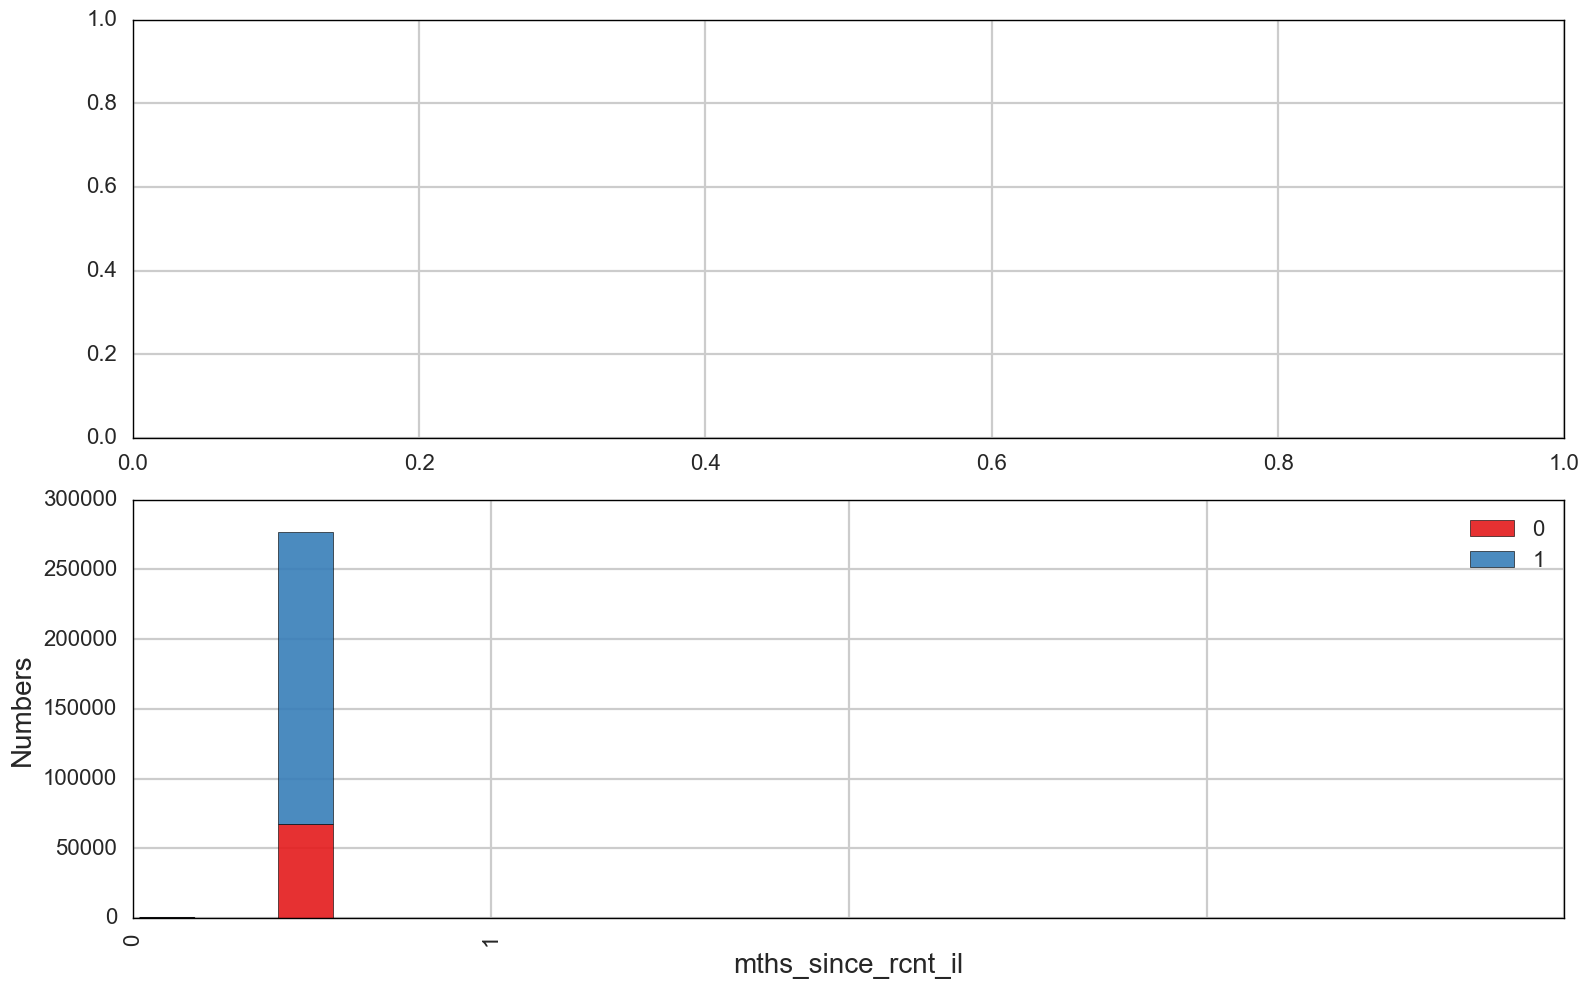

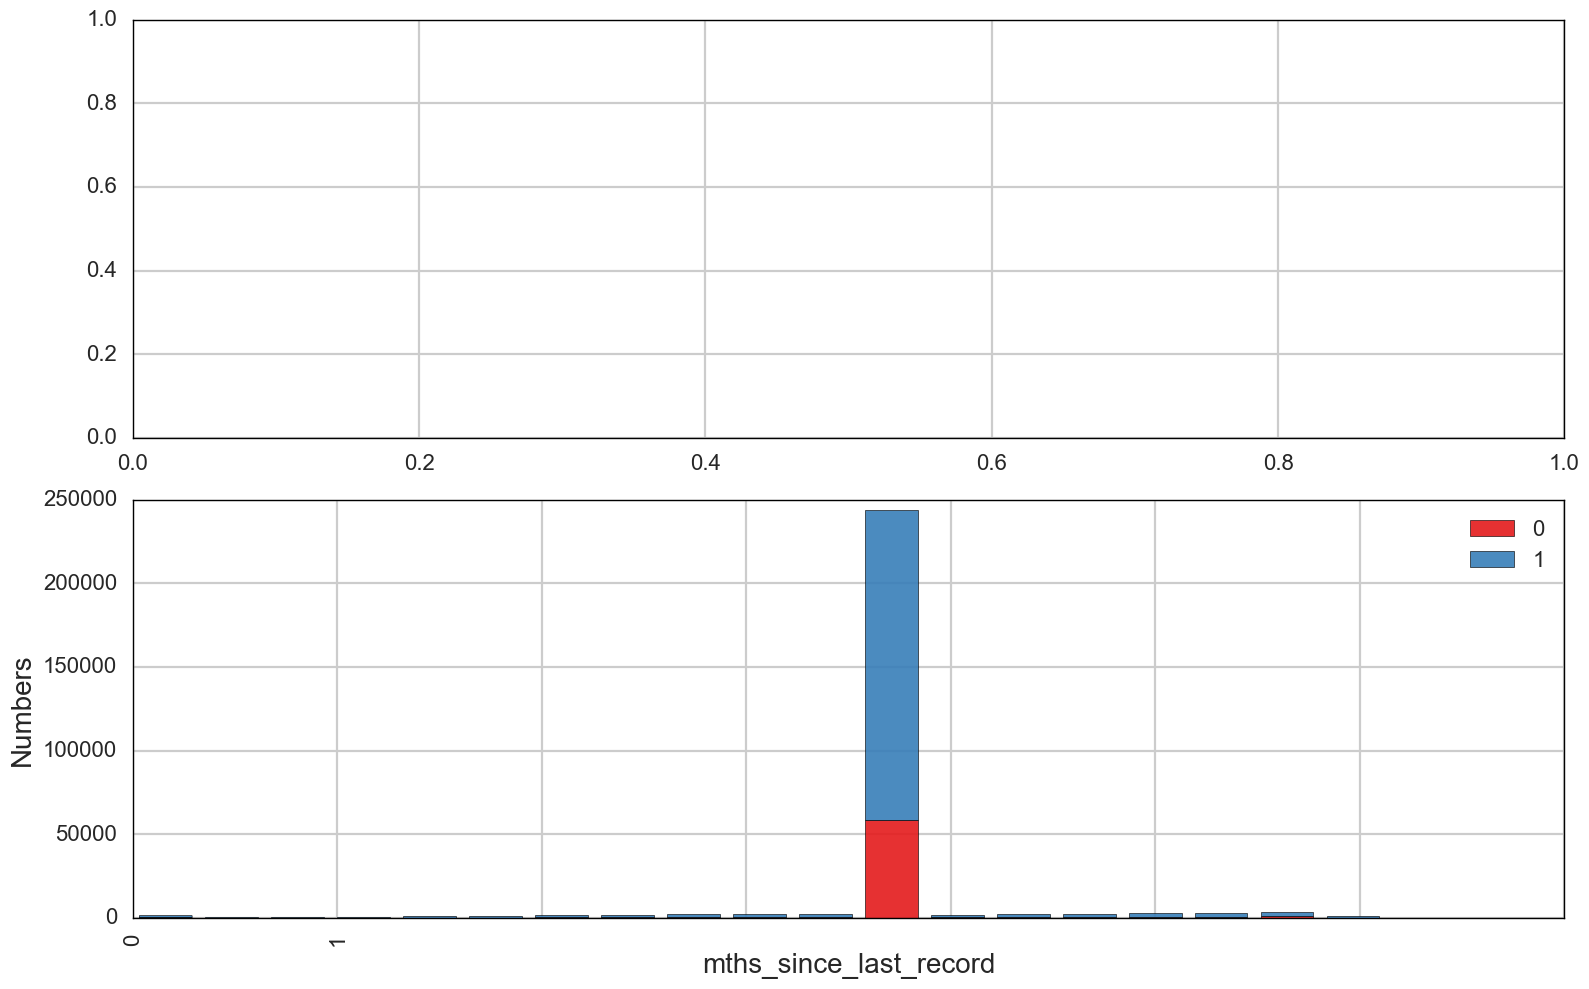

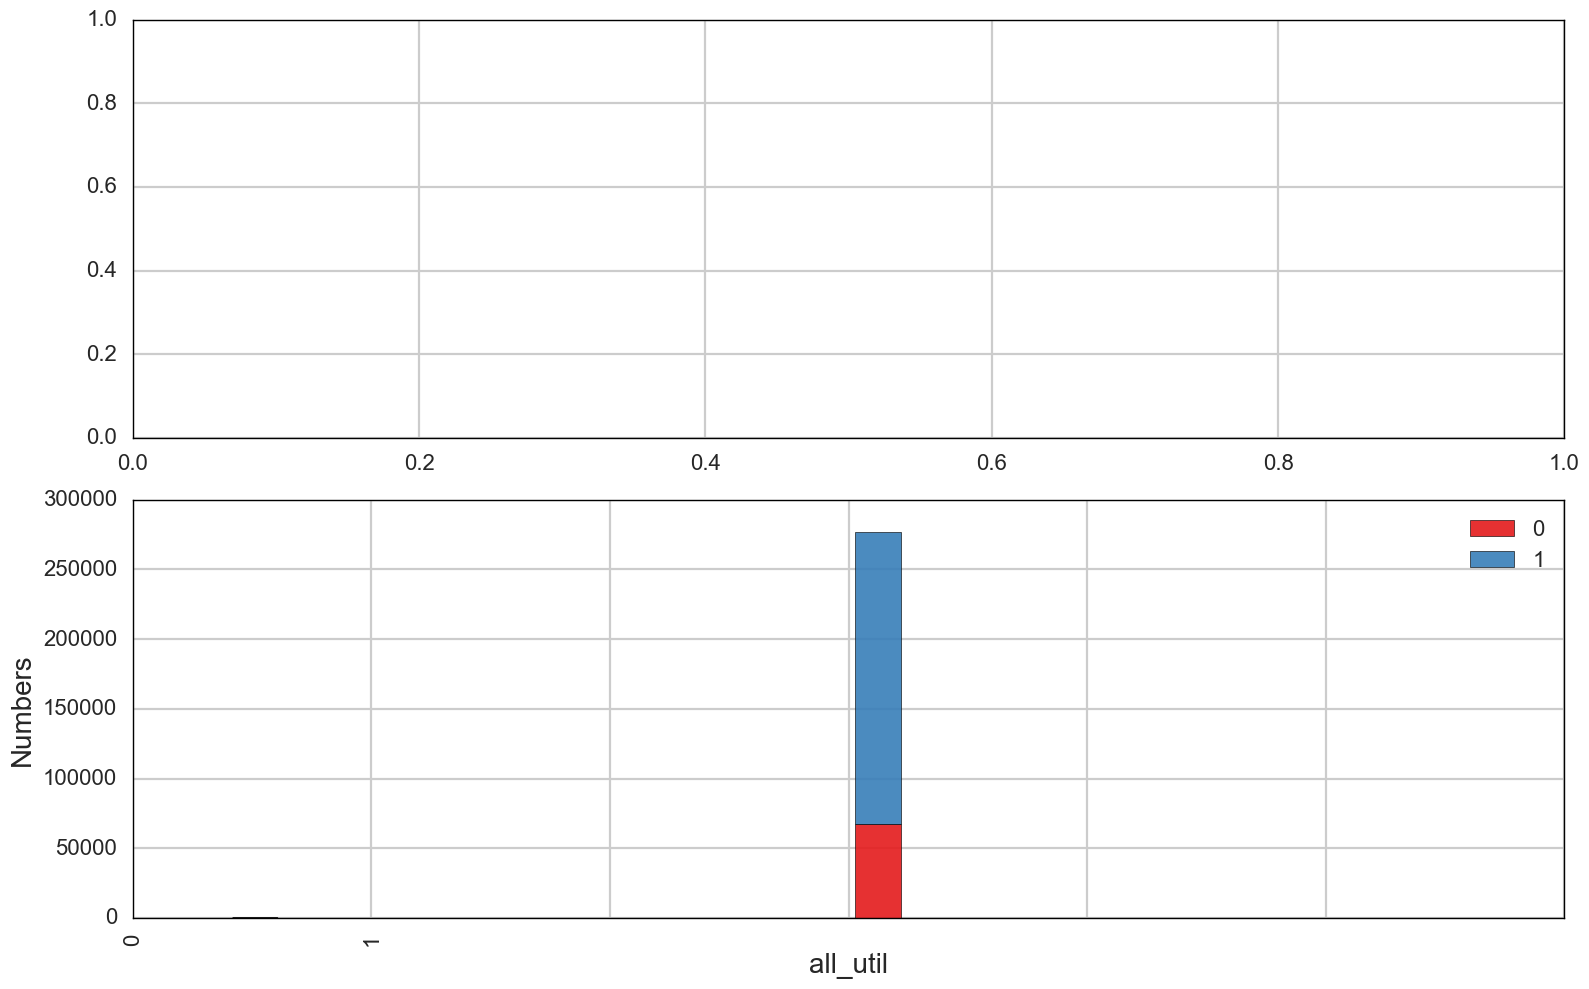

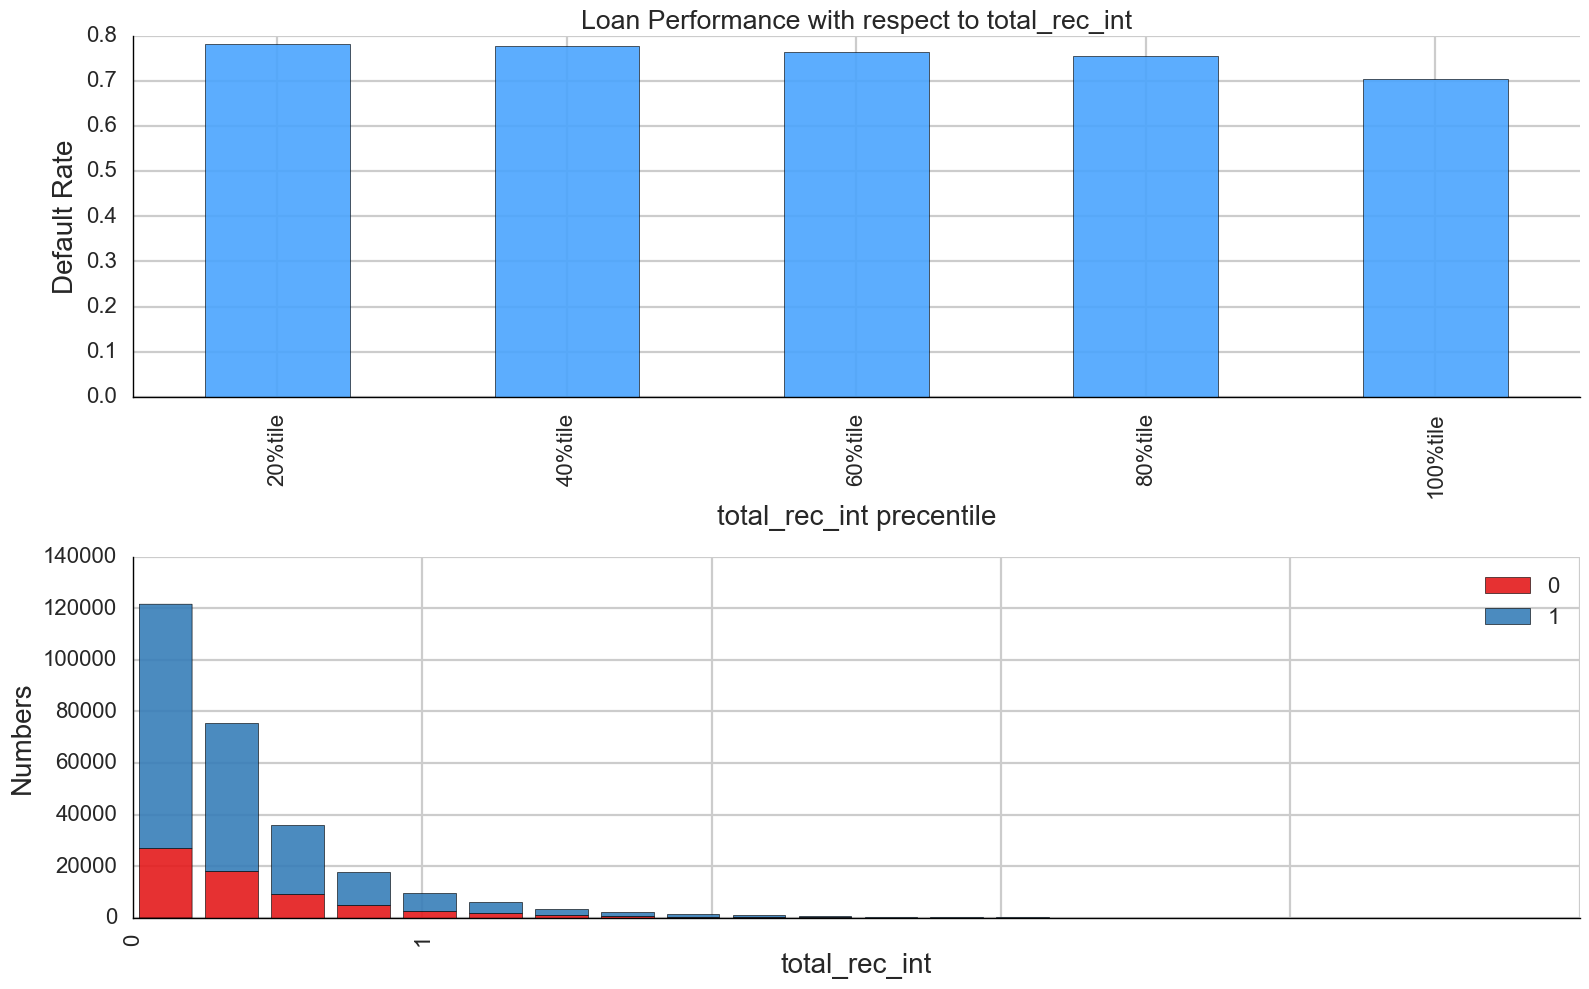

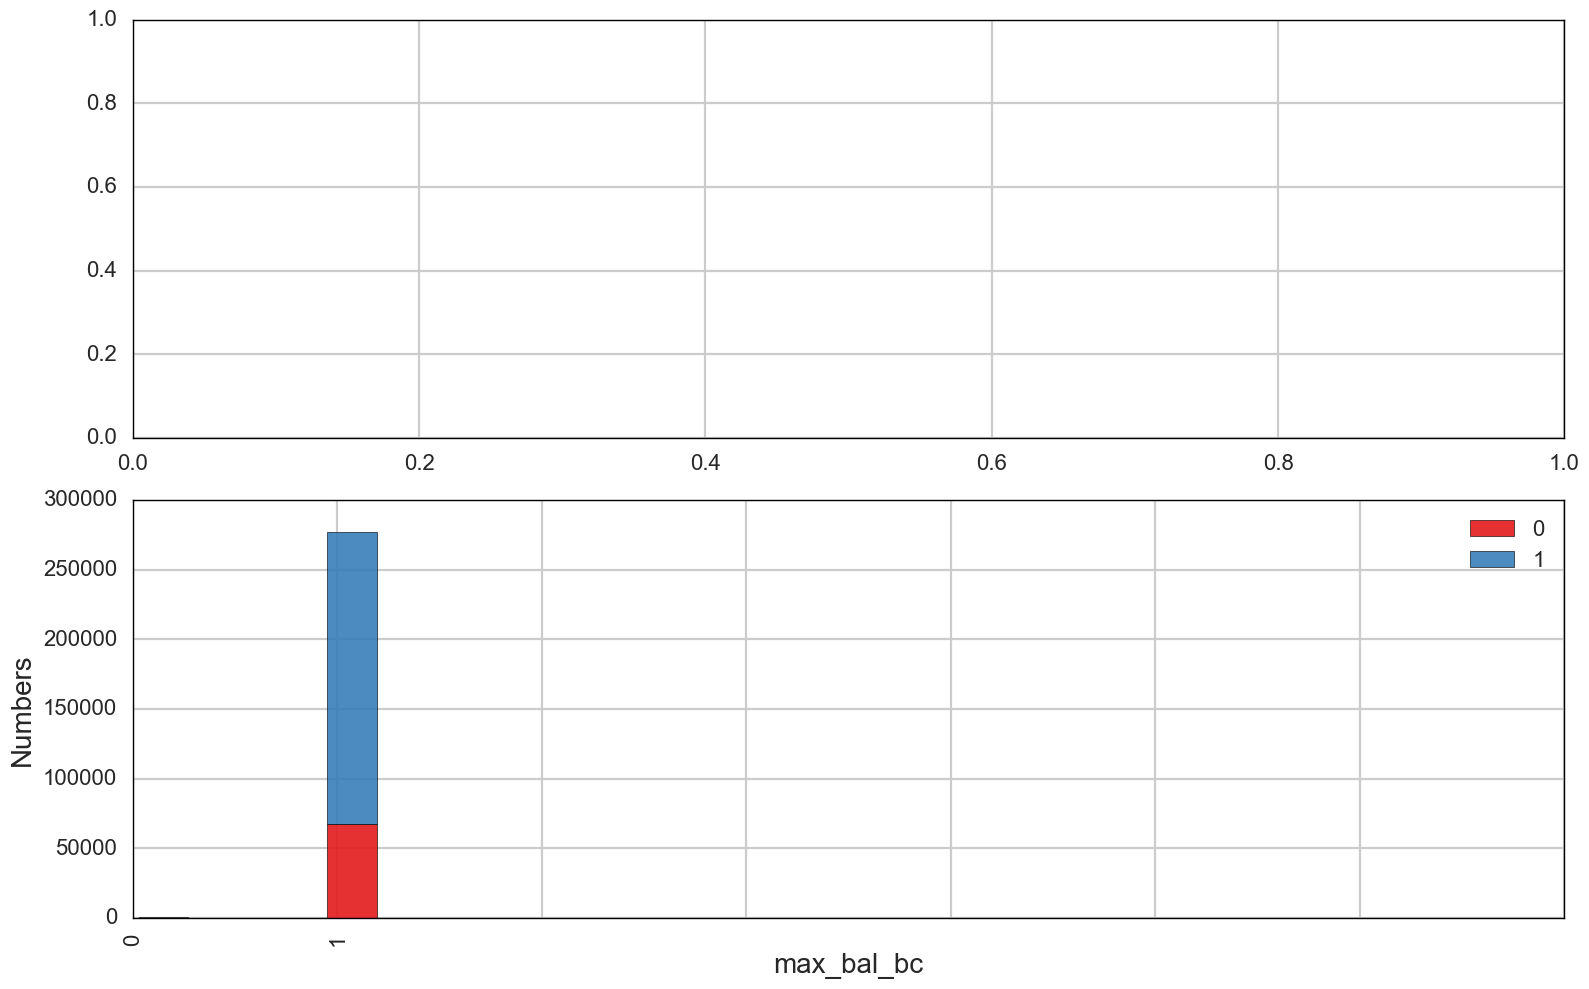

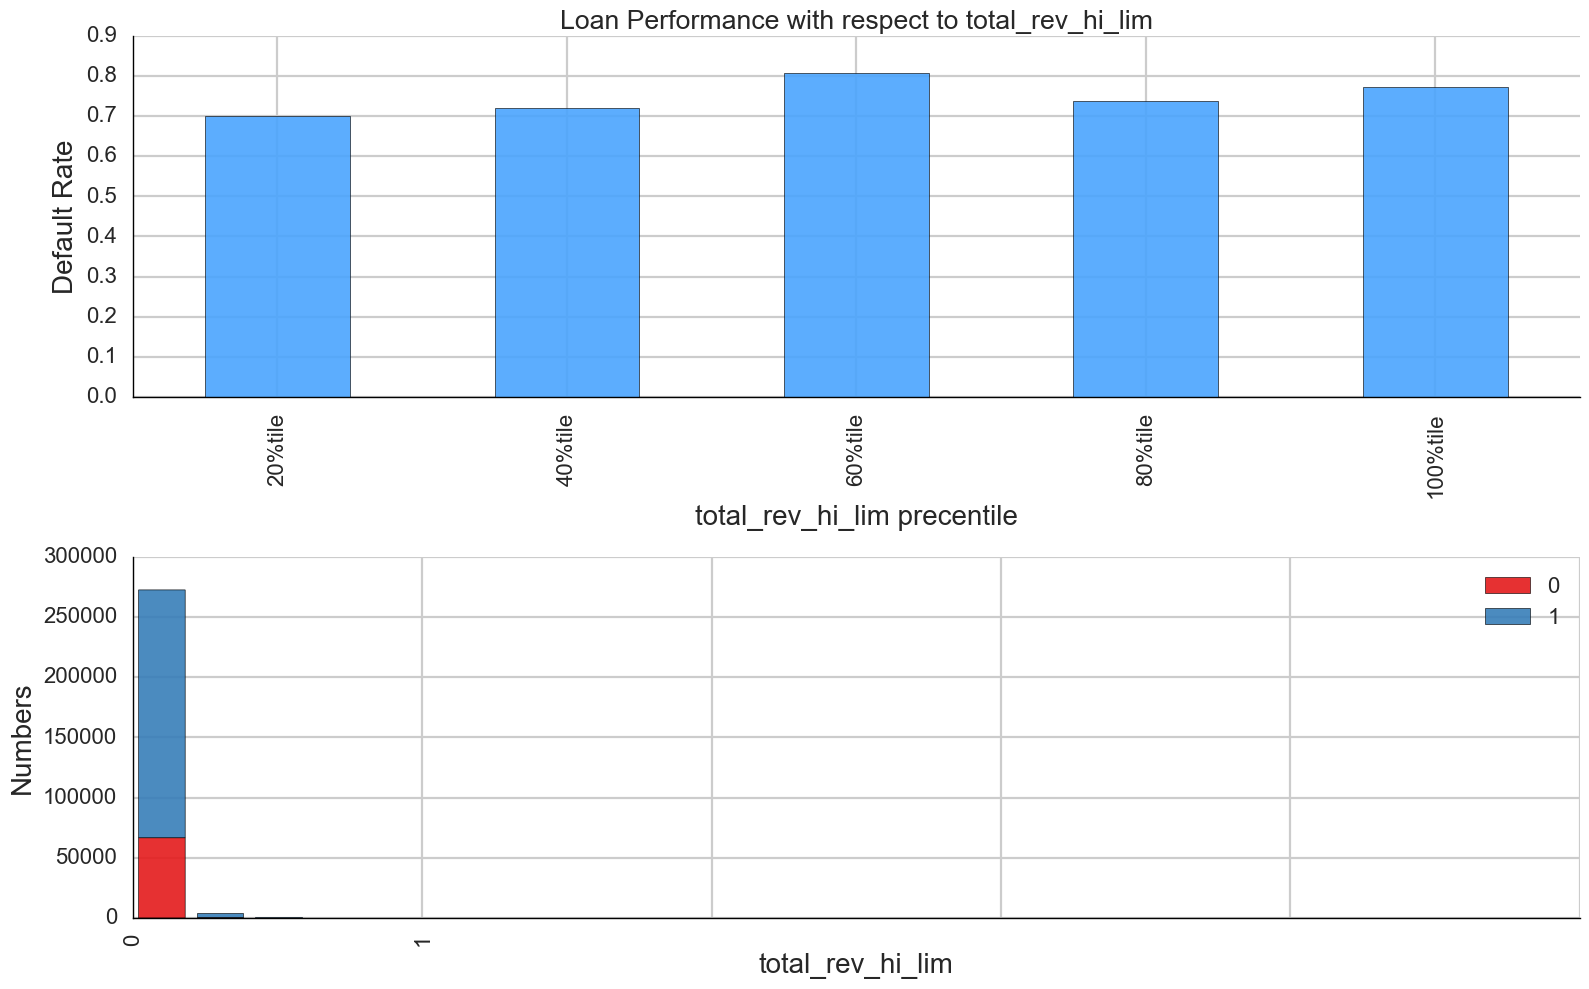

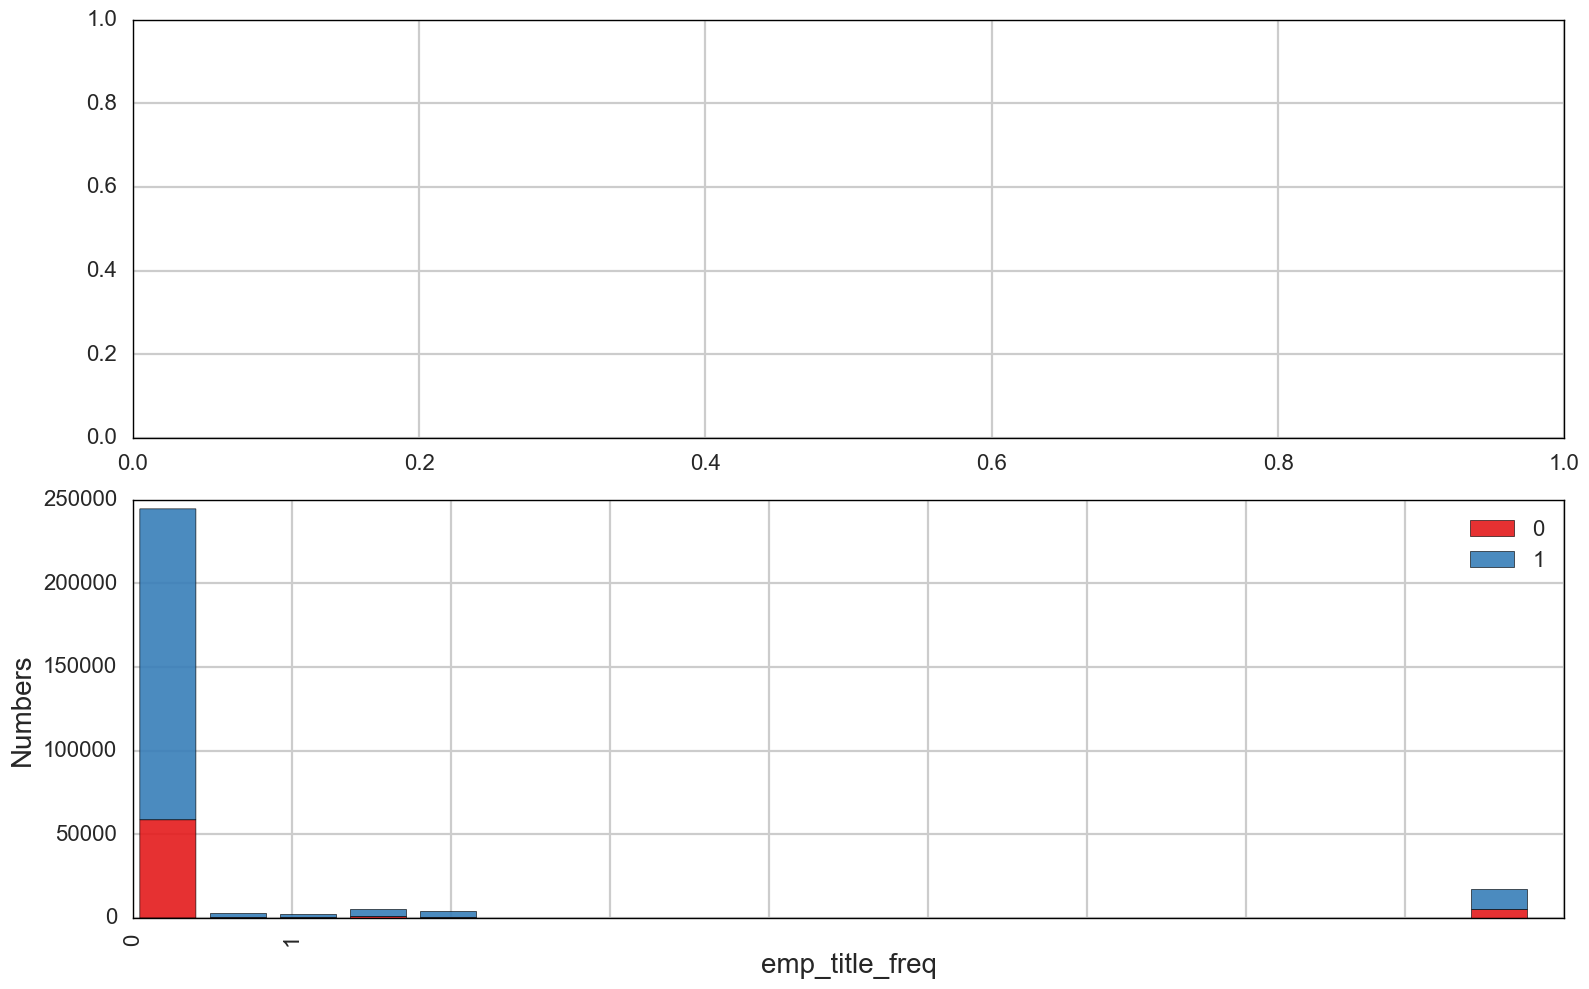

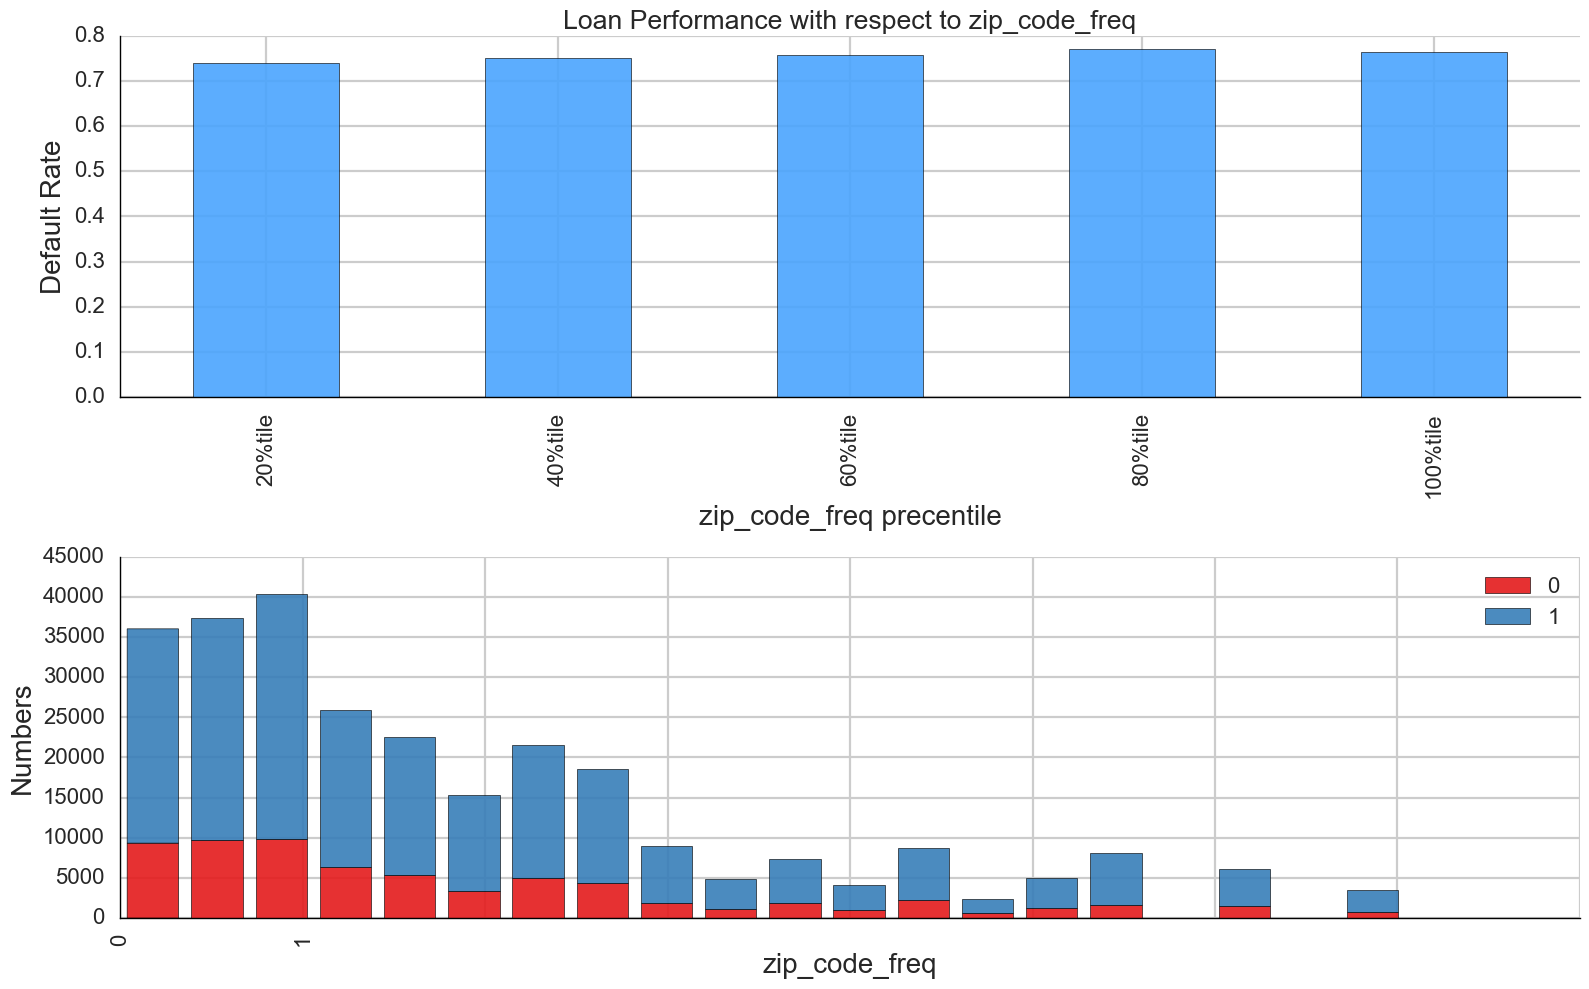

In [107]:
for feature in all_num_col:
    if df_all[feature].unique().shape[0]>=50:

        countinuous_variable_plot(feature)

------------
# Splitting into train and test

In [108]:
years = []
for i in x_df['issue_d']:
    d = datetime.datetime.strptime(i, "%b-%Y")
    years.append(d.year)
x_df['year_issued'] = years 

In [109]:
x_df['issue_d'].describe() #orginal coloum only have month

count       277140
unique         103
top       Oct-2014
freq         10148
Name: issue_d, dtype: object

In [110]:
test_data = x_df.query("issue_d >= 'Oct-2014'")

In [111]:
test_data = x_df.query("issue_d >= 'Oct-2014'")
test_data['issue_d'].describe()

count        32105
unique          11
top       Oct-2014
freq         10148
Name: issue_d, dtype: object

In [112]:

train_data = x_df.query("issue_d <'Oct-2014'")

In [113]:

train_data['issue_d'].describe()

count       245035
unique          92
top       Jul-2014
freq          9605
Name: issue_d, dtype: object

In [114]:
train_data['train_flg']=1
test_data['train_flg']=0
print (train_data['train_flg'].describe())
test_data['train_flg'].describe()

count    245035.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: train_flg, dtype: float64


/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


count    32105.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: train_flg, dtype: float64

In [115]:
test_data = x_df.query("issue_d >= 'Oct-2014'")
test_data['issue_d'].describe()
train_data = x_df.query("issue_d <'Oct-2014'")
train_data['issue_d'].describe()
train_data['train_flg']=1
test_data['train_flg']=0
print (train_data['train_flg'].describe())
test_data['train_flg'].describe()
df_all =  pd.concat((train_data,test_data),axis =0,ignore_index= True)

/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nisreenshiban/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    245035.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: train_flg, dtype: float64


In [116]:
df_all.shape

(277140, 57)

In [117]:
df_all = pd.concat([df_all,y_df_binary], axis = 1)

------------
# Encoding

### For categorical feature use one-hot-encoding
### Then combined with numrical features

In [118]:
cat_cols = dummy_list

In [119]:
print (df_all[cat_cols].shape)
ohe=pd.get_dummies(df_all[cat_cols],sparse=False)
print (ohe.shape)

(277140, 6)
(277140, 77)


In [120]:
# df_all.term

In [121]:
full_data = pd.concat([ohe,df_all[all_num_col+['loan_status','train_flg']]],axis=1)

In [122]:
full_data.term = full_data.term.map({' 36 months': 0, ' 60 months': 1})
full_data.term[0]

0

In [123]:
full_data.columns

Index(['emp_length', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'addr_state_AK', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ',
       'addr_state_CA', 'addr_state_CO',
       ...
       'mths_since_last_record', 'all_util', 'total_cu_tl', 'total_rec_int',
       'max_bal_bc', 'total_rev_hi_lim', 'emp_title_freq', 'zip_code_freq',
       'loan_status', 'train_flg'],
      dtype='object', length=115)

In [124]:
full_data = full_data.rename(columns = {'verification_status_Not Verified':'Not_Verified',
                            'verification_status_Source Verified':'Source_Verified',
                           'verification_status_Verified':'Verified'})

In [125]:
full_data.columns

Index(['emp_length', 'Not_Verified', 'Source_Verified', 'Verified',
       'addr_state_AK', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ',
       'addr_state_CA', 'addr_state_CO',
       ...
       'mths_since_last_record', 'all_util', 'total_cu_tl', 'total_rec_int',
       'max_bal_bc', 'total_rev_hi_lim', 'emp_title_freq', 'zip_code_freq',
       'loan_status', 'train_flg'],
      dtype='object', length=115)

In [126]:
y = full_data['loan_status']

# Models

In [128]:
X_train, X_val, y_train, y_val =  train_test_split(full_data[full_data['train_flg']==1].drop(['train_flg','loan_status'],axis=1), full_data[full_data['train_flg']==1]['loan_status'] , test_size=0.20 ,random_state =1122)

In [161]:
X_test = full_data[full_data['train_flg']==0].drop(['train_flg','loan_status'],axis=1)
y_test = full_data[full_data['train_flg']==0]['loan_status']
X_train_all = full_data[full_data['train_flg']==1].drop(['train_flg','loan_status'],axis=1)
y_train_all = full_data[full_data['train_flg']==1]['loan_status']

train_size = X_train.shape[0]
part_percentage = 0.02
X_train = X_train.iloc[:int(train_size * part_percentage), :]
y_train = y_train.iloc[:int(train_size * part_percentage)]

In [166]:
def test_score(estimator):
    preds = estimator.predict(X_test)
    return accuracy_score(y_test, preds)
from sklearn.metrics import accuracy_score


## KNN

finished in 0.585962 seconds
Score: 0.731113956466
Params: {'n_neighbors': 9}
Hold-out score: 0.63840523283


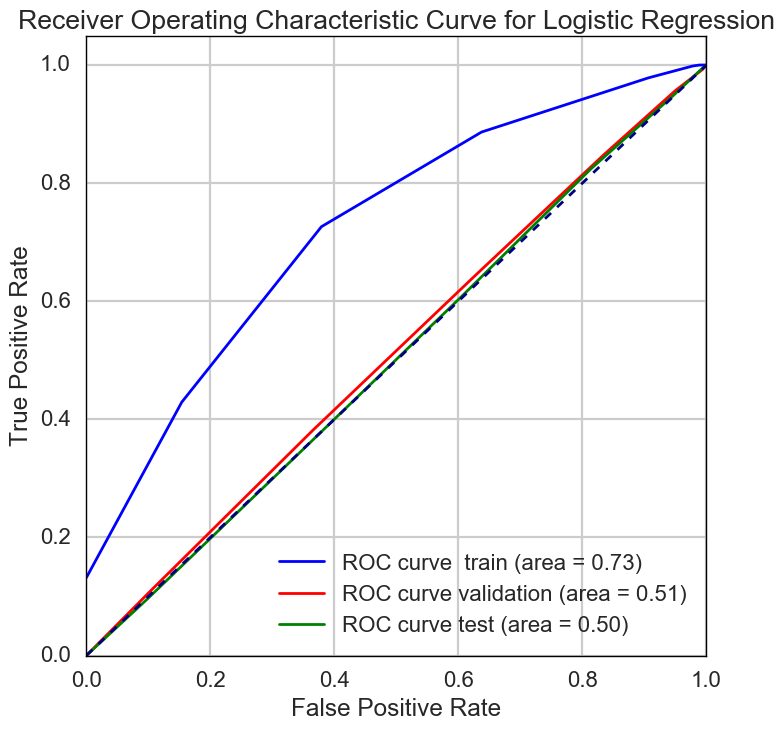

In [167]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors' : np.arange(1, 10)
}

grid = GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, cv=5)
start = time.time()
grid.fit(X_train, y_train)
print ("finished in %f seconds" %(time.time() - start))
print ('Score:', grid.best_score_)
print ('Params:', grid.best_params_)
print ('Hold-out score:', test_score(grid.best_estimator_))
clf = grid.best_estimator_


y_pred_train = clf.predict_proba(X_train.fillna(0))
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:,1])
y_pred_val = clf.predict_proba(X_val.fillna(0))
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val[:,1])
y_pred = clf.predict_proba(X_test.fillna(0))
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred[:,1])

plt.figure(figsize=(8, 8))
lw=2
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve  train (area = %0.2f)' % roc_auc_score(y_train, y_pred_train[:,1]))

plt.plot(fpr_val, tpr_val, color='red',
         lw=lw, label='ROC curve validation (area = %0.2f)' % roc_auc_score(y_val, y_pred_val[:,1]))

plt.plot(fpr_test, tpr_test, color='green',
         lw=lw, label='ROC curve test (area = %0.2f)' % roc_auc_score(y_test, y_pred[:,1]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Random Forest 

finished in 6.789265 seconds
Score: 0.768245838668
Params: {'max_depth': 5, 'criterion': 'entropy', 'n_estimators': 20, 'max_features': 'sqrt'}
Hold-out score: 0.654570939106


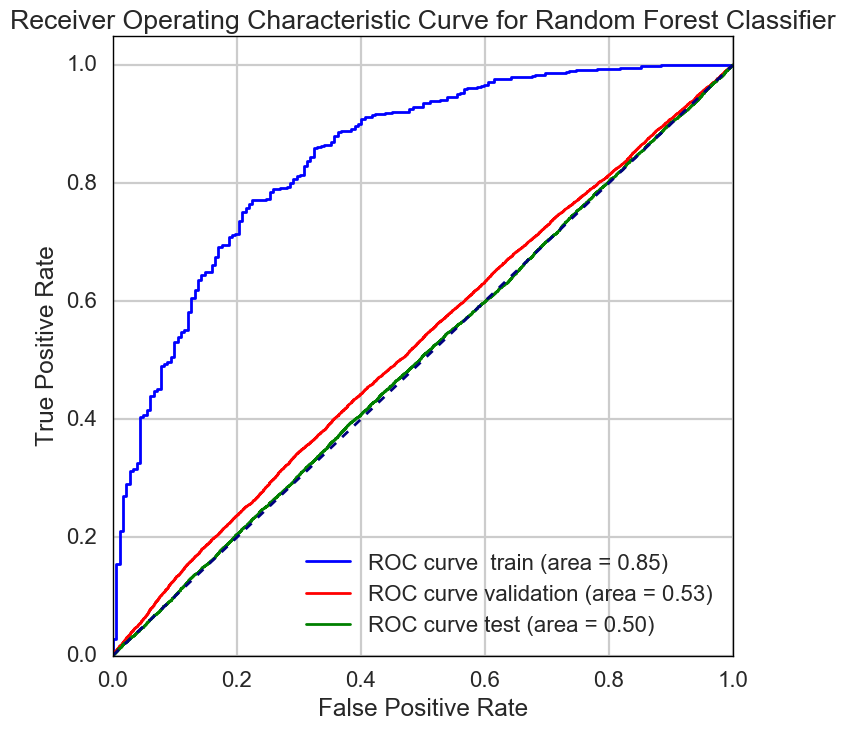

In [179]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'n_estimators' : [20],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : np.arange(5, 25, 2)
}

grid = GridSearchCV(RandomForestClassifier(random_state=123), params, n_jobs=-1, cv=5)
start = time.time()
grid.fit(X_train, y_train)
print ("finished in %f seconds" %(time.time() - start))
print( 'Score:', grid.best_score_)
print ('Params:', grid.best_params_)
print( 'Hold-out score:', test_score(grid.best_estimator_))
clf = grid.best_estimator_

y_pred_train = clf.predict_proba(X_train.fillna(0))
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:,1])
y_pred_val = clf.predict_proba(X_val.fillna(0))
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val[:,1])
y_pred = clf.predict_proba(X_test.fillna(0))
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred[:,1])

plt.figure(figsize=(8, 8))
lw=2
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve  train (area = %0.2f)' % roc_auc_score(y_train, y_pred_train[:,1]))

plt.plot(fpr_val, tpr_val, color='red',
         lw=lw, label='ROC curve validation (area = %0.2f)' % roc_auc_score(y_val, y_pred_val[:,1]))

plt.plot(fpr_test, tpr_test, color='green',
         lw=lw, label='ROC curve test (area = %0.2f)' % roc_auc_score(y_test, y_pred[:,1]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

## Decision Tree 

finished in 1.846974 seconds
Score: 0.715749039693
Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}
Hold-out score: 0.633733063386


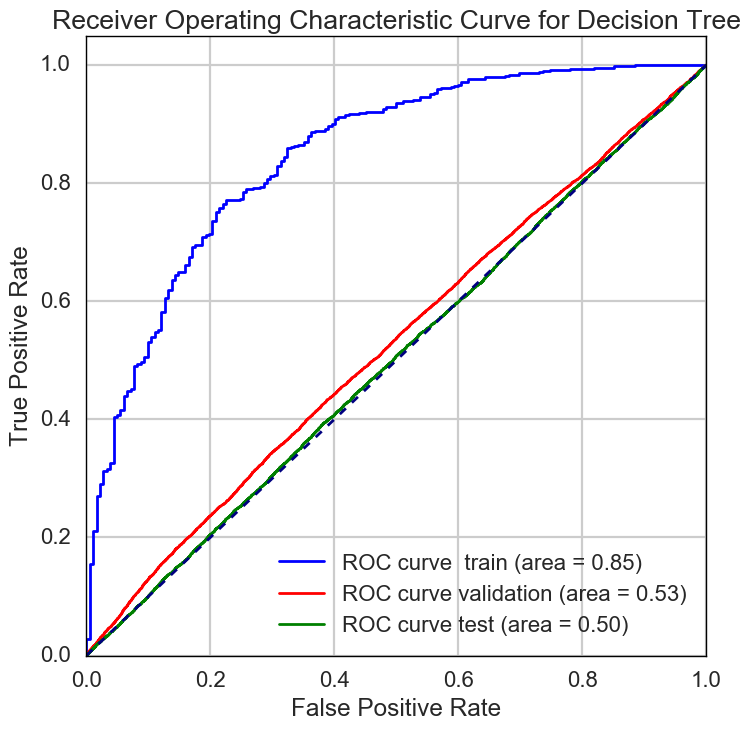

In [178]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['sqrt', 'log2', None],
    'max_depth' : np.arange(10, 20)
}

grid = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=-1, cv=5)
start = time.time()
grid.fit(X_train, y_train)
print ("finished in %f seconds" %(time.time() - start))
print ('Score:', grid.best_score_)
print ('Params:', grid.best_params_)
print ('Hold-out score:', test_score(grid.best_estimator_))
dtree = grid.best_estimator_

y_pred_train = clf.predict_proba(X_train.fillna(0))
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:,1])
y_pred_val = clf.predict_proba(X_val.fillna(0))
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val[:,1])
y_pred = clf.predict_proba(X_test.fillna(0))
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred[:,1])

plt.figure(figsize=(8, 8))
lw=2
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve  train (area = %0.2f)' % roc_auc_score(y_train, y_pred_train[:,1]))

plt.plot(fpr_val, tpr_val, color='red',
         lw=lw, label='ROC curve validation (area = %0.2f)' % roc_auc_score(y_val, y_pred_val[:,1]))

plt.plot(fpr_test, tpr_test, color='green',
         lw=lw, label='ROC curve test (area = %0.2f)' % roc_auc_score(y_test, y_pred[:,1]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

finished in 1.764430 seconds
Score: 0.764404609475
Params: {'C': 1.0000000000000001e-05}
Hold-out score: 0.654134869958


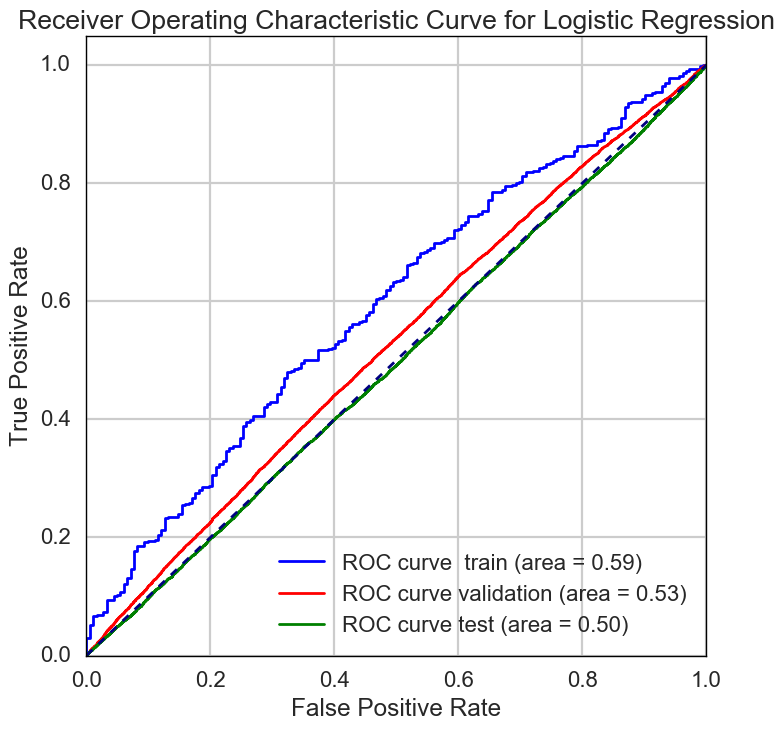

In [185]:
from sklearn.linear_model import LogisticRegression

params = {
    'C' : np.logspace(-5, 3, 10)
}

grid = GridSearchCV(LogisticRegression(random_state=123), params, cv=5)
start = time.time()
grid.fit(X_train, y_train)
print ("finished in %f seconds" %(time.time() - start))
print ('Score:', grid.best_score_)
print ('Params:', grid.best_params_)
print ('Hold-out score:', test_score(grid.best_estimator_))
clf = grid.best_estimator_



y_pred_train = clf.predict_proba(X_train.fillna(0))
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:,1])
y_pred_val = clf.predict_proba(X_val.fillna(0))
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val[:,1])
y_pred = clf.predict_proba(X_test.fillna(0))
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred[:,1])

plt.figure(figsize=(8, 8))
lw=2
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve  train (area = %0.2f)' % roc_auc_score(y_train, y_pred_train[:,1]))

plt.plot(fpr_val, tpr_val, color='red',
         lw=lw, label='ROC curve validation (area = %0.2f)' % roc_auc_score(y_val, y_pred_val[:,1]))

plt.plot(fpr_test, tpr_test, color='green',
         lw=lw, label='ROC curve test (area = %0.2f)' % roc_auc_score(y_test, y_pred[:,1]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Linear SVM 

finished in 5.048323 seconds
Score: 0.518565941101
Params: {'C': 1.0000000000000001e-05, 'loss': 'squared_hinge'}
Hold-out score: 0.651456159477


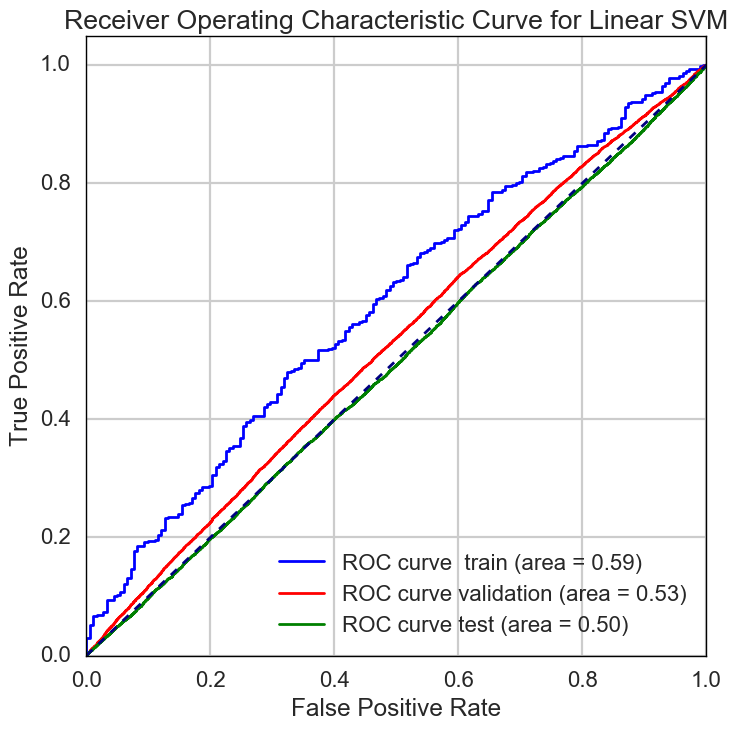

In [187]:
from sklearn.svm import LinearSVC

params = {
    'C' : np.logspace(-5, 3, 5),
    'loss' : ['hinge', 'squared_hinge']
}

grid = GridSearchCV(LinearSVC(random_state=123), params, cv=5)
start = time.time()
grid.fit(X_train, y_train)
print ("finished in %f seconds" %(time.time() - start))
print ('Score:', grid.best_score_)
print ('Params:', grid.best_params_)
print ('Hold-out score:', test_score(grid.best_estimator_))
linearsvc = grid.best_estimator_

y_pred_train = clf.predict_proba(X_train.fillna(0))
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:,1])
y_pred_val = clf.predict_proba(X_val.fillna(0))
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val[:,1])
y_pred = clf.predict_proba(X_test.fillna(0))
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred[:,1])

plt.figure(figsize=(8, 8))
lw=2
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve  train (area = %0.2f)' % roc_auc_score(y_train, y_pred_train[:,1]))

plt.plot(fpr_val, tpr_val, color='red',
         lw=lw, label='ROC curve validation (area = %0.2f)' % roc_auc_score(y_val, y_pred_val[:,1]))

plt.plot(fpr_test, tpr_test, color='green',
         lw=lw, label='ROC curve test (area = %0.2f)' % roc_auc_score(y_test, y_pred[:,1]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Linear SVM')
plt.legend(loc="lower right")
plt.show()

## Nonlinear SVM 

finished in 8.626128 seconds
Score: 0.766965428937
Params: {'gamma': 1.0000000000000001e-05, 'C': 1.0000000000000001e-05}
Hold-out score: 0.65453979131


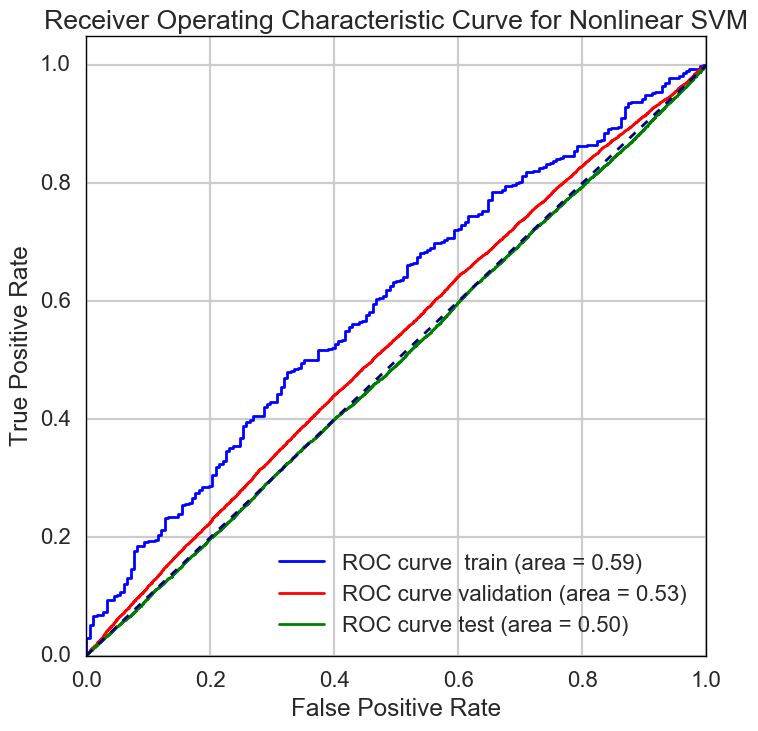

In [188]:
from sklearn.svm import SVC

params = {
    'C' : np.logspace(-5, 3, 5),
    'gamma' : np.logspace(-5, 3, 5)
}

grid = GridSearchCV(SVC(random_state=123), params, cv=5)

start = time.time()
grid.fit(X_train, y_train)
print ("finished in %f seconds" %(time.time() - start))
print ('Score:', grid.best_score_)
print ('Params:', grid.best_params_)
print ('Hold-out score:', test_score(grid.best_estimator_))
rbfsvc = grid.best_estimator_


y_pred_train = clf.predict_proba(X_train.fillna(0))
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:,1])
y_pred_val = clf.predict_proba(X_val.fillna(0))
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val[:,1])
y_pred = clf.predict_proba(X_test.fillna(0))
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred[:,1])

plt.figure(figsize=(8, 8))
lw=2
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve  train (area = %0.2f)' % roc_auc_score(y_train, y_pred_train[:,1]))

plt.plot(fpr_val, tpr_val, color='red',
         lw=lw, label='ROC curve validation (area = %0.2f)' % roc_auc_score(y_val, y_pred_val[:,1]))

plt.plot(fpr_test, tpr_test, color='green',
         lw=lw, label='ROC curve test (area = %0.2f)' % roc_auc_score(y_test, y_pred[:,1]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Nonlinear SVM')
plt.legend(loc="lower right")
plt.show()

## AdaBoost 

finished in 2.373899 seconds
Score: 0.751600512164
Params: {'n_estimators': 10}
Hold-out score: 0.652733219125


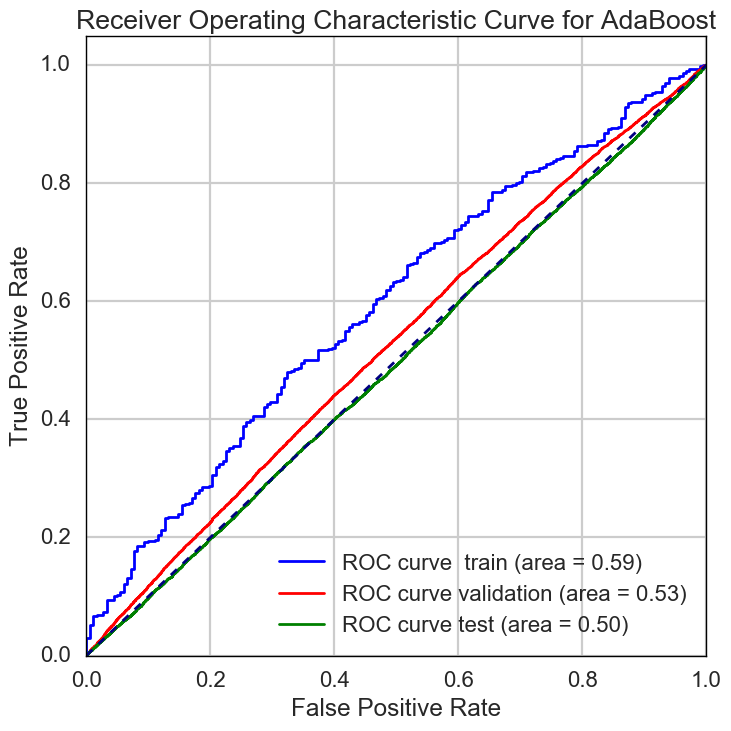

In [191]:
from sklearn.ensemble import AdaBoostClassifier

params = {
    'n_estimators' : np.arange(10, 60, 10)
}

grid = GridSearchCV(AdaBoostClassifier(random_state=123), params, cv=5)
start = time.time()
grid.fit(X_train, y_train)
print ("finished in %f seconds" %(time.time() - start))
print ('Score:', grid.best_score_)
print ('Params:', grid.best_params_)
print ('Hold-out score:', test_score(grid.best_estimator_))
adaboost = grid.best_estimator_


y_pred_train = clf.predict_proba(X_train.fillna(0))
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:,1])
y_pred_val = clf.predict_proba(X_val.fillna(0))
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val[:,1])
y_pred = clf.predict_proba(X_test.fillna(0))
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred[:,1])

plt.figure(figsize=(8, 8))
lw=2
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve  train (area = %0.2f)' % roc_auc_score(y_train, y_pred_train[:,1]))

plt.plot(fpr_val, tpr_val, color='red',
         lw=lw, label='ROC curve validation (area = %0.2f)' % roc_auc_score(y_val, y_pred_val[:,1]))

plt.plot(fpr_test, tpr_test, color='green',
         lw=lw, label='ROC curve test (area = %0.2f)' % roc_auc_score(y_test, y_pred[:,1]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for AdaBoost')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting

finished in 2.298881 seconds
Score: 0.764404609475
Params: {'n_estimators': 10}
Hold-out score: 0.654072574365


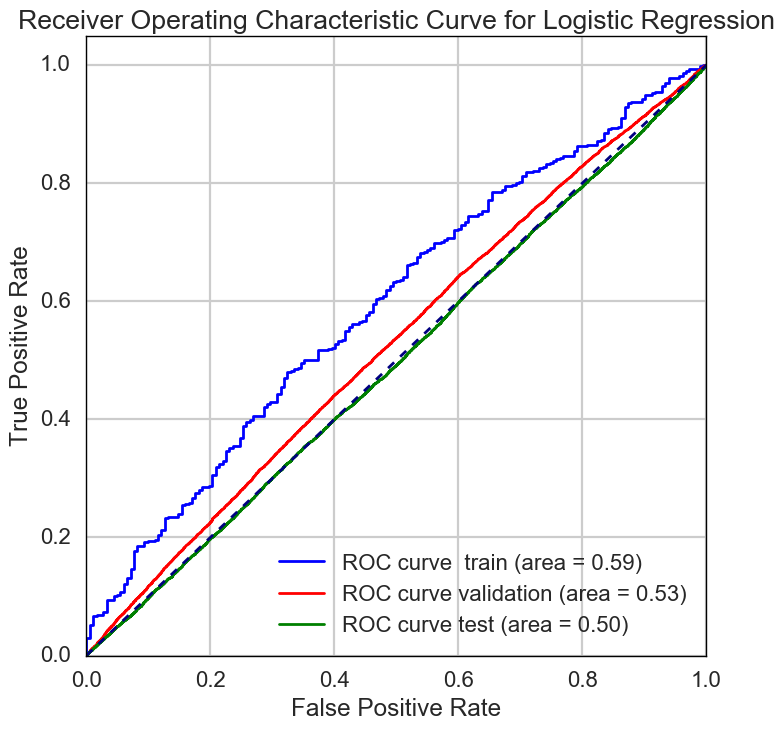

In [192]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators' : np.arange(10, 60, 10)
}

grid = GridSearchCV(GradientBoostingClassifier(random_state=123), params, cv=5)

start = time.time()
grid.fit(X_train, y_train)
print ("finished in %f seconds" %(time.time() - start))

print ('Score:', grid.best_score_)
print ('Params:', grid.best_params_)
print ('Hold-out score:', test_score(grid.best_estimator_))
gradboost = grid.best_estimator_


y_pred_train = clf.predict_proba(X_train.fillna(0))
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:,1])
y_pred_val = clf.predict_proba(X_val.fillna(0))
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val[:,1])
y_pred = clf.predict_proba(X_test.fillna(0))
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred[:,1])

plt.figure(figsize=(8, 8))
lw=2
plt.plot(fpr_train, tpr_train, color='blue',
         lw=lw, label='ROC curve  train (area = %0.2f)' % roc_auc_score(y_train, y_pred_train[:,1]))

plt.plot(fpr_val, tpr_val, color='red',
         lw=lw, label='ROC curve validation (area = %0.2f)' % roc_auc_score(y_val, y_pred_val[:,1]))

plt.plot(fpr_test, tpr_test, color='green',
         lw=lw, label='ROC curve test (area = %0.2f)' % roc_auc_score(y_test, y_pred[:,1]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()